# Change Kernel


## Python
Python: Mount to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/TENET_workshop.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: TENET_workshop/usr/local/lib/R/site-library/RcppEigen/include/unsupported/Eigen/src/IterativeSolvers/GMRES.h  
  inflating: TENET_workshop/usr/local/lib/R/site-library/RcppEigen/include/unsupported/Eigen/src/IterativeSolvers/ConstrainedConjGrad.h  
  inflating: TENET_workshop/usr/local/lib/R/site-library/RcppEigen/include/unsupported/Eigen/src/IterativeSolvers/Scaling.h  
   creating: TENET_workshop/usr/local/lib/R/site-library/RcppEigen/include/unsupported/Eigen/src/FFT/
  inflating: TENET_workshop/usr/local/lib/R/site-library/RcppEigen/include/unsupported/Eigen/src/FFT/ei_fftw_impl.h  
  inflating: TENET_workshop/usr/local/lib/R/site-library/RcppEigen/include/unsupported/Eigen/src/FFT/ei_kissfft_impl.h  
   creating: TENET_workshop/usr/local/lib/R/site-library/RcppEigen/include/unsupported/Eigen/src/EulerAngles/
  inflating: TENET_workshop/usr/local/lib/R/site-library/RcppEigen/include/unsupported/Eigen/src/EulerAngles/EulerSystem.h  


In [3]:
!cp -r TENET_workshop/usr/local/lib/R/site-library/* /usr/local/lib/R/site-library

In [4]:
!apt-get update
!apt-get install g++ openjdk-8-jdk python3-dev
!apt-get install -y libgsl-dev
!apt install r-cran-igraph
!pip3 install JPype1-py3
!pip install csvkit
!pip install statsmodels
!sed -i 's/import collections/import collections.abc as collections/g' /usr/local/lib/python3.10/dist-packages/jpype/_jarray.py
!git clone https://github.com/hg0426/TENETPLUS.git
!chmod -R 777 /content/TENETPLUS

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,172 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,618 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jamm

## R
Change kernel to R

In [1]:
sessionInfo()

R version 4.4.2 (2024-10-31)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 22.04.3 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] digest_0.6.37     IRdisplay_1.1     utf8_1.2.4        base64enc_0.1-3  
 [5] fastmap_1.2.0     glue_1.7.0        htmltools_0.5.8.1 repr_1.1.6       
 [9] li

In [2]:
.libPaths()

[1] "/usr/local/lib/R/site-library" "/usr/lib/R/site-library"      
[3] "/usr/lib/R/library"

# Table of contents
1. Integrating scRNA-seq and scATAC-seq data
- 1.1 Explore Dataset
- 1.2 Make Seurat Object
- 1.3 Quality Control
- 1.4 Basic Analysis
- 1.5 Identifying anchors
- 1.6 Annotate scATAC-seq cells via label transfer
- 1.7 Co-embedding

2. DEG & DAR Analysis
- 2.1 DEG
- 2.2 DAR

3. Pseudo-Time

4. TENET plus input files

5. TENET plus output files

6. Downstream Analysis using TENET plus output files

# Load Packages


In [3]:
install.packages("xfun")
library(Seurat)
library(Signac)
library(EnsDb.Hsapiens.v86)
library(ggplot2)
library(cowplot)
library(tidyverse)
library(monocle3)
library(SeuratWrappers)
library(monocle)
library(JASPAR2020)
library(TFBSTools)
library(patchwork)
library(BSgenome.Hsapiens.UCSC.hg38)
library(biovizBase)
library(reticulate)
library(IRdisplay)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.3.2 but the current version is
4.4.2; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

‘SeuratObject’ was built with package ‘Matrix’ 1.6.4 but the current
version is 1.7.1; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    %||%, intersect



Attaching package: ‘Seurat’


The following object is masked from ‘package:base’:

    %||%


Loading required package: ensembldb

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects

In [4]:
packageVersion("Seurat")
packageVersion("SeuratObject")
packageVersion("Signac")
packageVersion("EnsDb.Hsapiens.v86")
packageVersion("ggplot2")
packageVersion("cowplot")

[1] '5.0.1'

[1] '5.0.1'

[1] '1.12.0'

[1] '2.99.0'

[1] '3.5.1'

[1] '1.1.3'

# 1. Integrating scRNA-seq and scATAC-seq data


<img src = "https://drive.google.com/uc?id=1CzC-uSmoCwT7yeytRu8cHZKptP-KSRvd" height=200 width=800>

https://satijalab.org/seurat/

- <u>**Seurat**</u> is an R package designed for QC, analysis, and exploration of single-cell RNA-seq data.<br>
- <u>**Seurat**</u> aims to enable users to identify and interpret sources of heterogeneity from single-cell transcriptomic measurements, and to integrate diverse types of single-cell data.

<img src = "https://drive.google.com/uc?id=1SMA4_rw55hdW1X49EL1ceC7LQRJZJEA9" height=200 width=500>

https://stuartlab.org/signac/

- <u>**Signac**</u> is a comprehensive R package for the analysis of single-cell chromatin data. <br>
- <u>**Signac**</u> is designed for the analysis of single-cell chromatin data, including scATAC-seq, single-cell targeted tagmentation methods such as scCUT&Tag and scNTT-seq, and multimodal datasets that jointly measure chromatin state alongside other modalities.

<img src = "https://drive.google.com/uc?id=1EFqCbgSIltT2DmdssSFL90-Ld6H3mT3B" height=200 width=800>


https://satijalab.org/seurat/articles/seurat5_atacseq_integration_vignette

- How to use an annotated scRNA-seq dataset to label cells from an scATAC-seq experiment
- How to co-visualize (co-embed) cells from scRNA-seq and scATAC-seq

## 1.1 Explore Dataset

<img src = "https://drive.google.com/uc?id=1c6T-R9quNooATO6NIa2lFrxLNyAKM5w-" height=300 width=900>

- 실습에 사용할 데이터는 10x genomics에서 제공하는 25세 건강한 여성의 PBMC 데이터이다.
- 해당 데이터는 하나의 cell에서 scRNA-seq과 scATAC-seq이 된 Multiome Dataset이다.

<img src = "https://drive.google.com/uc?id=1h_sVGE053oti_Q2P0CPbaF958chmtAEt" height=500 width=500>

https://support.10xgenomics.com/single-cell-multiome-atac-gex/datasets/1.0.0/pbmc_granulocyte_sorted_10k

- Single Cell Multiome ATAC + Gene Expression sequencing data를 처리하는 Cell Ranger pipeline인 Cell Ranger ARC을 통해 FASTQ 파일을 input으로 하여 아래와 같은 Output 파일들을 생성한다.


- Cell Ranger ARC와 이에 대한 output 파일들의 자세한 정보는 아래 링크를 통해 확인 가능하다. <br>
https://support.10xgenomics.com/single-cell-multiome-atac-gex/software/pipelines/latest/what-is-cell-ranger-arc

In [5]:
start_time = Sys.time()

In [6]:
data_dir <- "/content/TENET_workshop/PBMC_dataset/" # Set input Directory
output_dir <- "/content/drive/MyDrive/Output_CD8/" # Set output Directory
# output_dir <- "/content/Output_CD8/" # Set output Directory (If not enough space in Google Drive)
system(paste0("mkdir ",output_dir))
list.files(data_dir)
list.files(paste0(data_dir,"filtered_feature_bc_matrix"))

[1] "filtered_feature_bc_matrix"                           
[2] "pbmc_granulocyte_sorted_10k_atac_fragments.tsv.gz"    
[3] "pbmc_granulocyte_sorted_10k_atac_fragments.tsv.gz.tbi"
[4] "seurat_annotations.txt"                               
[5] "TSSEnrichment.txt"

[1] "barcodes.tsv.gz" "features.tsv.gz" "matrix.mtx.gz"

- 위의 Cell Ranger Output 파일들 중에서 일부 파일들을 사용해 이후 분석을 진행한다.
- input 데이터를 살펴보면 'filtered_feature_bc_matrix' 폴더와 함께 'pbmc_granulocyte_sorted_10k_atac_fragments.tsv.gz', 'pbmc_granulocyte_sorted_10k_atac_fragments.tsv.gz.tbi', 'seurat_annotations.txt', 'TSSEnrichment.txt' 파일이 있다.
- 'filtered_feature_bc_matrix' 폴더 아래에 'barcodes.tsv.gz','features.tsv.gz','matrix.mtx.gz'가 존재한다.
- Filtered feature-barcode matrix: Cell Ranger에서 제공하는 기준을 통과하지 못한 cell 및 feature을 제거한 데이터셋 <br>
https://www.10xgenomics.com/support/software/cell-ranger/latest/analysis/outputs/cr-outputs-mex-matrices

In [7]:
cat(system(paste0("zcat ",data_dir,"filtered_feature_bc_matrix/barcodes.tsv.gz | head"),intern = TRUE),sep="\n")

AAACAGCCAAGGAATC-1
AAACAGCCAATCCCTT-1
AAACAGCCAATGCGCT-1
AAACAGCCACACTAAT-1
AAACAGCCACCAACCG-1
AAACAGCCAGGATAAC-1
AAACAGCCAGTAGGTG-1
AAACAGCCAGTTTACG-1
AAACAGCCATCCAGGT-1
AAACATGCAAGGTCCT-1


In [8]:
cat(system(paste0("zcat ",data_dir,"filtered_feature_bc_matrix/features.tsv.gz | head"),intern = TRUE),sep="\n")

ENSG00000243485	MIR1302-2HG	Gene Expression	chr1	29553	30267
ENSG00000237613	FAM138A	Gene Expression	chr1	36080	36081
ENSG00000186092	OR4F5	Gene Expression	chr1	65418	69055
ENSG00000238009	AL627309.1	Gene Expression	chr1	120931	133723
ENSG00000239945	AL627309.3	Gene Expression	chr1	91104	91105
ENSG00000239906	AL627309.2	Gene Expression	chr1	140338	140339
ENSG00000241860	AL627309.5	Gene Expression	chr1	149706	173862
ENSG00000241599	AL627309.4	Gene Expression	chr1	160445	160446
ENSG00000286448	AP006222.2	Gene Expression	chr1	266854	266855
ENSG00000236601	AL732372.1	Gene Expression	chr1	360056	360057


In [9]:
cat(system(paste0("zcat ",data_dir,"filtered_feature_bc_matrix/features.tsv.gz | head -n 40000 | tail"),intern = TRUE),sep="\n")

chr1:48469915-48473084	chr1:48469915-48473084	Peaks	chr1	48469915	48473084
chr1:48498099-48498853	chr1:48498099-48498853	Peaks	chr1	48498099	48498853
chr1:48750031-48750620	chr1:48750031-48750620	Peaks	chr1	48750031	48750620
chr1:48767890-48768426	chr1:48767890-48768426	Peaks	chr1	48767890	48768426
chr1:48775648-48777807	chr1:48775648-48777807	Peaks	chr1	48775648	48777807
chr1:48789836-48790482	chr1:48789836-48790482	Peaks	chr1	48789836	48790482
chr1:48793747-48794411	chr1:48793747-48794411	Peaks	chr1	48793747	48794411
chr1:50097299-50097637	chr1:50097299-50097637	Peaks	chr1	50097299	50097637
chr1:50109604-50110733	chr1:50109604-50110733	Peaks	chr1	50109604	50110733
chr1:50265740-50266002	chr1:50265740-50266002	Peaks	chr1	50265740	50266002


In [10]:
cat(system(paste0("zcat ",data_dir,"filtered_feature_bc_matrix/matrix.mtx.gz | head"),intern = TRUE),sep="\n")

%%MatrixMarket matrix coordinate integer general
%metadata_json: {"software_version": "cellranger-arc-1.0.0", "format_version": 2}
144978 11909 109104829
18 1 1
49 1 1
54 1 1
60 1 1
87 1 1
110 1 1
114 1 1


- matrix.mtx.gz 파일은 MEX(Market Exchange) 형식으로 Cell Ranger 결과의 gene-cell matrix을 나타내는 데 사용된다.
- 각 gene-cell pair의 UMI(Unique Molecular Identifier) 수에 대한 매트릭스가 매우 크고, 대부분의 값이 0이기 때문에 이는 sparse matrix format이다.
- 맨 위 세 줄은 header이고, 세 번째 줄에는 폴더에 있는 genes.tsv, barcode.tsv, matrix.mtx의 총 행 수이다.
- 4번째 줄 이후에서 첫 번째 열은 gene id index, 두 번째 열은 cell id index, 세 번째 열은 gene-pair pair의 총 UMI 수를 나타낸다.
- 예시로, mtx 파일의 행이 18 1 1이면 gene.tsv 파일의 18번째에 있는 유전자와 barcodes.tsv 파일의 줄 번호 1에 있는 세포의 UMI 개수가 1이다.
https://kb.10xgenomics.com/hc/en-us/articles/115000794686-How-is-the-MEX-format-used-for-the-gene-barcode-matrices


In [11]:
cat(system(paste0("zcat ",data_dir,"pbmc_granulocyte_sorted_10k_atac_fragments.tsv.gz| head"),intern = TRUE),sep="\n")

chr1	10066	10478	TCAAGAACAGTAATAG-1	1
chr1	10072	10191	AACCCGCAGGTAGCTT-1	1
chr1	10073	10340	CGCATATAGGTTACGT-1	2
chr1	10079	10192	GTAAGGTCACCCACAG-1	1
chr1	10079	10277	TATTCGTTCCGCCTCA-1	1
chr1	10079	10279	ATGAATGCATTGTCAG-1	7
chr1	10079	10309	CGGTTTGAGTTTGGTA-1	1
chr1	10083	10278	ACTTCGCTCAAACACC-1	1
chr1	10084	10309	TCATACTTCTTAGCCC-1	1
chr1	10084	10340	GCGAAGCCAGGCTAGA-1	2


- 특정 region과 cell에서 몇 개의 fragment가 관측되었는지를 나타낸다.
- pbmc_granulocyte_sorted_10k_atac_fragments.tsv.gz.tbi: fragments.tsv 파일의 인덱스 파일, binary 형식
https://support.10xgenomics.com/single-cell-atac/software/pipelines/latest/output/fragments

In [12]:
cat(system(paste0("cat ",data_dir,"seurat_annotations.txt | head"),intern = TRUE),sep="\n")

AAACAGCCAAGGAATC-1	CD4 Naive
AAACAGCCAATCCCTT-1	CD4 TCM
AAACAGCCAATGCGCT-1	CD4 Naive
AAACAGCCACACTAAT-1	filtered
AAACAGCCACCAACCG-1	CD8 Naive
AAACAGCCAGGATAAC-1	CD4 Naive
AAACAGCCAGTAGGTG-1	CD8 Naive
AAACAGCCAGTTTACG-1	CD4 TCM
AAACAGCCATCCAGGT-1	CD16 Mono
AAACATGCAAGGTCCT-1	CD8 Naive


- Tutorial에서 제공되는 cell type annotation이다.

In [13]:
cat(system(paste0("cat ",data_dir,"TSSEnrichment.txt | head"),intern = TRUE),sep="\n")

AAACAGCCAAGGAATC-1	5.13025762760088	0.9
AAACAGCCAATCCCTT-1	4.4889121031253	0.49
AAACAGCCAATGCGCT-1	4.32520499634594	0.35
AAACAGCCACACTAAT-1	4.52325452325452	0.52
AAACAGCCACCAACCG-1	3.82512224617488	0.07
AAACAGCCAGGATAAC-1	4.38546225348256	0.4
AAACAGCCAGTAGGTG-1	4.75495727294288	0.72
AAACAGCCAGTTTACG-1	4.56500021717413	0.56
AAACAGCCATCCAGGT-1	4.11141653377678	0.2
AAACATGCAAGGTCCT-1	4.64989555898647	0.64


- ATAC-seq 데이터의 Quality Control 과정에서 사용되는 TSS Enrichment 결과이다.

## 1.2 Make Seurat Object

In [14]:
# Enables easy loading of sparse data matrices provided by 10X genomics.
data <- Read10X(data.dir = paste0(data_dir,"filtered_feature_bc_matrix/"))
names(data)

10X data contains more than one type and is being returned as a list containing matrices of each type.



[1] "Gene Expression" "Peaks"

In [15]:
data$`Gene Expression`[1:3,1:3]

3 x 3 sparse Matrix of class "dgCMatrix"
            AAACAGCCAAGGAATC-1 AAACAGCCAATCCCTT-1 AAACAGCCAATGCGCT-1
MIR1302-2HG                  .                  .                  .
FAM138A                      .                  .                  .
OR4F5                        .                  .                  .

In [16]:
data$Peaks[1:3,1:3]

3 x 3 sparse Matrix of class "dgCMatrix"
                   AAACAGCCAAGGAATC-1 AAACAGCCAATCCCTT-1 AAACAGCCAATGCGCT-1
chr1:10109-10357                    .                  .                  .
chr1:180730-181630                  .                  .                  .
chr1:191491-191736                  .                  .                  .

In [17]:
# Load cell type annotation file
seurat_annotations <- read.table(paste0(data_dir,"seurat_annotations.txt"),sep="\t",row.names=1)
names(seurat_annotations) <- "seurat_annotations"

In [18]:
# Make Seurat Object - RNA
pbmc.rna = CreateSeuratObject(counts = data$`Gene Expression`,assay='RNA',meta.data = seurat_annotations)
pbmc.rna$orig.ident <- "RNA"
pbmc.rna

An object of class Seurat 
36601 features across 11909 samples within 1 assay 
Active assay: RNA (36601 features, 0 variable features)
 1 layer present: counts

In [19]:
pbmc.rna@assays$RNA["counts"][1:3,1:3]

3 x 3 sparse Matrix of class "dgCMatrix"
            AAACAGCCAAGGAATC-1 AAACAGCCAATCCCTT-1 AAACAGCCAATGCGCT-1
MIR1302-2HG                  .                  .                  .
FAM138A                      .                  .                  .
OR4F5                        .                  .                  .

In [20]:
# Make Seurat Object - ATAC
chrom_assay <- CreateChromatinAssay(counts = data$`Peaks`,
                                    sep = c(":", "-"),
                                    fragments = paste0(data_dir,"./pbmc_granulocyte_sorted_10k_atac_fragments.tsv.gz"))
pbmc.atac = CreateSeuratObject(counts = chrom_assay, assay = 'ATAC',meta.data = seurat_annotations)
rm(data,chrom_assay)
pbmc.atac$orig.ident <- "ATAC"
pbmc.atac

Computing hash



An object of class Seurat 
108377 features across 11909 samples within 1 assay 
Active assay: ATAC (108377 features, 0 variable features)
 2 layers present: counts, data

In [21]:
pbmc.atac@assays$ATAC["counts"][1:3,1:3]

3 x 3 sparse Matrix of class "dgCMatrix"
                   AAACAGCCAAGGAATC-1 AAACAGCCAATCCCTT-1 AAACAGCCAATGCGCT-1
chr1-10109-10357                    .                  .                  .
chr1-180730-181630                  .                  .                  .
chr1-191491-191736                  .                  .                  .

In [22]:
# Subset cell type
cd8 <- c("CD8 Naive","CD8 TEM_1","MAIT","CD8 TEM_1","CD8 TEM_2","gdT","NK","filtered")
pbmc.rna <- subset(pbmc.rna, seurat_annotations %in% cd8)
pbmc.atac <- subset(pbmc.atac, seurat_annotations %in% cd8)

In [23]:
pbmc.rna

An object of class Seurat 
36601 features across 4341 samples within 1 assay 
Active assay: RNA (36601 features, 0 variable features)
 1 layer present: counts

In [24]:
pbmc.atac

An object of class Seurat 
108377 features across 4341 samples within 1 assay 
Active assay: ATAC (108377 features, 0 variable features)
 2 layers present: counts, data

In [25]:
rbind(sort(table(pbmc.rna$seurat_annotations),decreasing=TRUE))
#rbind(sort(table(pbmc.atac$seurat_annotations),decreasing=TRUE)) # The result is the same as the code above

filtered CD8 Naive NK  CD8 TEM_2 CD8 TEM_1 gdT MAIT
[1,] 1497     1410      468 358       325       146 137

## 1.3 Quality Control

In [26]:
# Calculate and assign the percentage of mitochondrial genes in scRNA-seq data
pbmc.rna[["percent.mt"]] <- PercentageFeatureSet(pbmc.rna, pattern = "^MT-")

In [27]:
# Set gene annotations for scATAC-seq data with EnsDb, UCSC style, and hg38 genome
annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Hsapiens.v86)
seqlevelsStyle(annotations) <- "UCSC"
genome(annotations) <- "hg38"
Annotation(pbmc.atac) <- annotations

Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warn

In [28]:
# Calculate nucleosome signal and TSS enrichment scores for scATAC-seq data
pbmc.atac <- NucleosomeSignal(object = pbmc.atac)
# pbmc.atac <- TSSEnrichment(object = pbmc.atac) # The code's run time is too long
# Loads precomputed TSSEnrichment results
TSSEnrichment <- read.table(paste0(data_dir,"TSSEnrichment.txt"),header = F,row.names=1)
TSSEnrichment <- TSSEnrichment[colnames(pbmc.atac),]
pbmc.atac$TSS.Enrichment <- TSSEnrichment$V2
pbmc.atac$TSS.percentile <- TSSEnrichment$V3

In [29]:
head(pbmc.rna@meta.data,3)

orig.ident nCount_RNA nFeature_RNA seurat_annotations
AAACAGCCACACTAAT-1 RNA        1733        846         filtered          
AAACAGCCACCAACCG-1 RNA        5415       2282         CD8 Naive         
AAACAGCCAGTAGGTG-1 RNA        7614       3061         CD8 Naive         
                   percent.mt
AAACAGCCACACTAAT-1 18.003462 
AAACAGCCACCAACCG-1  6.500462 
AAACAGCCAGTAGGTG-1  6.895193

In [30]:
head(pbmc.atac@meta.data,3)

orig.ident nCount_ATAC nFeature_ATAC seurat_annotations
AAACAGCCACACTAAT-1 ATAC        2007         906         filtered          
AAACAGCCACCAACCG-1 ATAC        7658        3323         CD8 Naive         
AAACAGCCAGTAGGTG-1 ATAC       39454       11633         CD8 Naive         
                   nucleosome_signal nucleosome_percentile TSS.Enrichment
AAACAGCCACACTAAT-1 0.9354839         0.57                  4.523255      
AAACAGCCACCAACCG-1 0.8287938         0.31                  3.825122      
AAACAGCCAGTAGGTG-1 0.8458618         0.35                  4.754957      
                   TSS.percentile
AAACAGCCACACTAAT-1 0.52          
AAACAGCCACCAACCG-1 0.07          
AAACAGCCAGTAGGTG-1 0.72

Warning message:
"Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead."


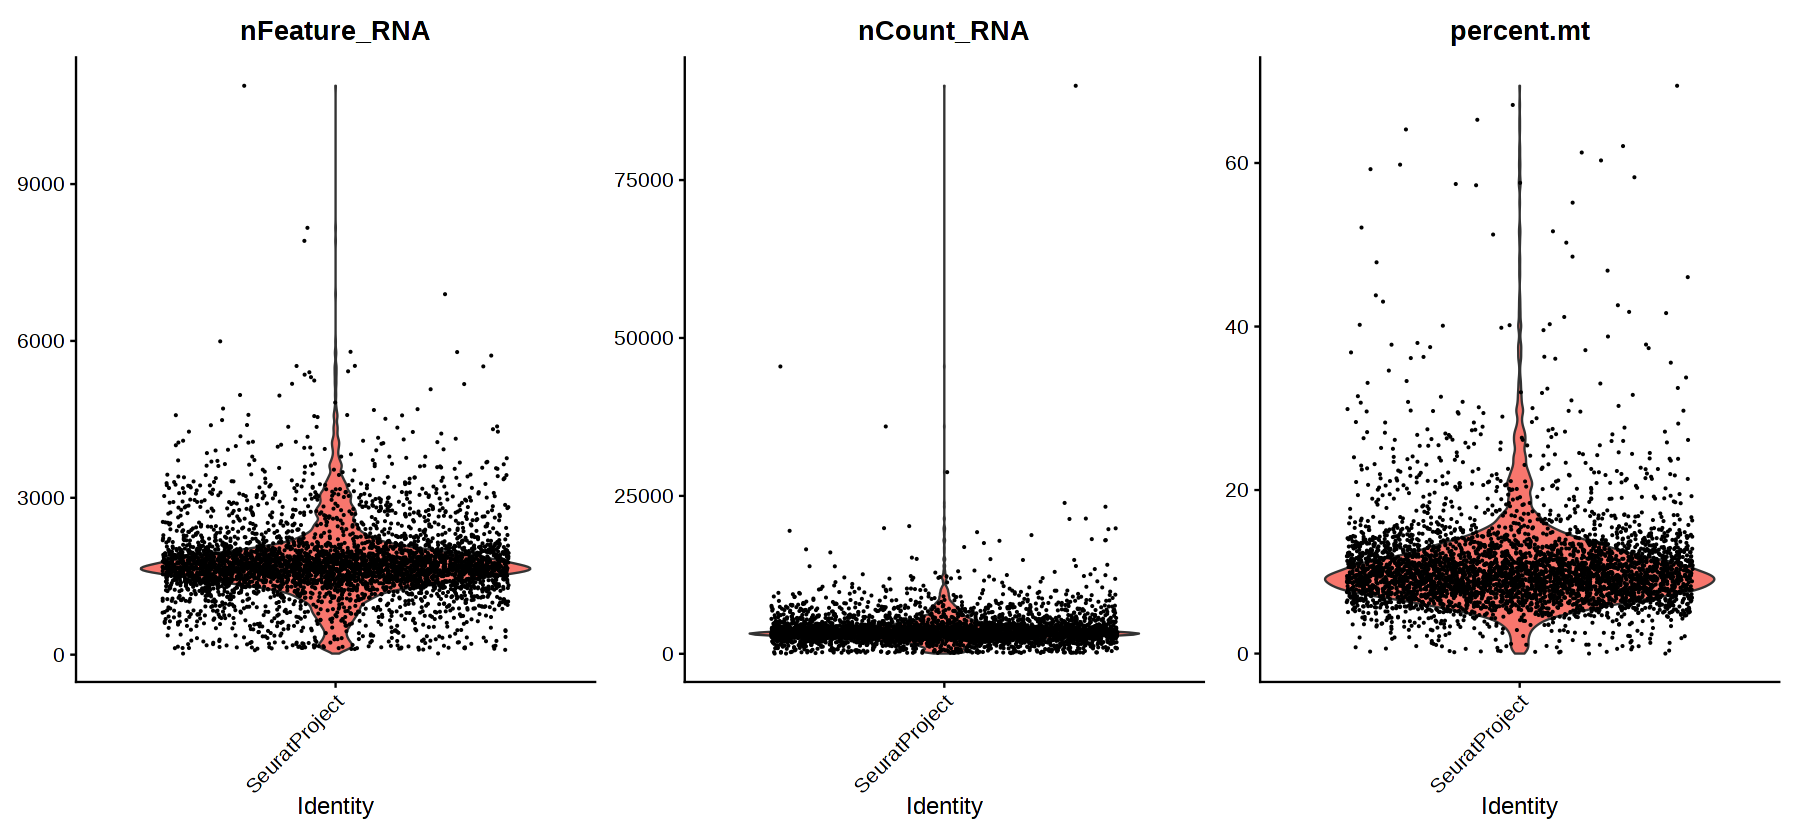

In [31]:
# Adjust plot size
options(repr.plot.width=15, repr.plot.height=7)
# Violin plots for QC metrics (number of features, total counts, mitochondrial gene percentage) in scRNA-seq data
VlnPlot(
  object = pbmc.rna,
  features = c("nFeature_RNA","nCount_RNA","percent.mt"),
  ncol = 3,
  pt.size = 0.1
)

**number of unique genes detected in each cell (nFeature_RNA)**
- 각 세포에서 발견된 unique 유전자의 수
- 낮은 quality의 세포나 빈 droplet은 대개 매우 적은 유전자를 가지고 있고, doublet이나 multiplet은 비정상적으로 높은 유전자 수를 보일 수 있다.

**total number of molecules detected within a cell (nCount_RNA)**
- 각 세포 내에서 발견된 분자의 총 수로, nFeature_RNA와 강한 상관관계를 보인다.

**percentage of reads that map to the mitochondrial genome (percent.mt)**
- mitochondrial genome에 매핑된 read의 비율
- 낮은 품질이거나 죽어가는 세포는 종종 mitochondrial contamination을 보이므로 이 비율이 높게 나타난다.


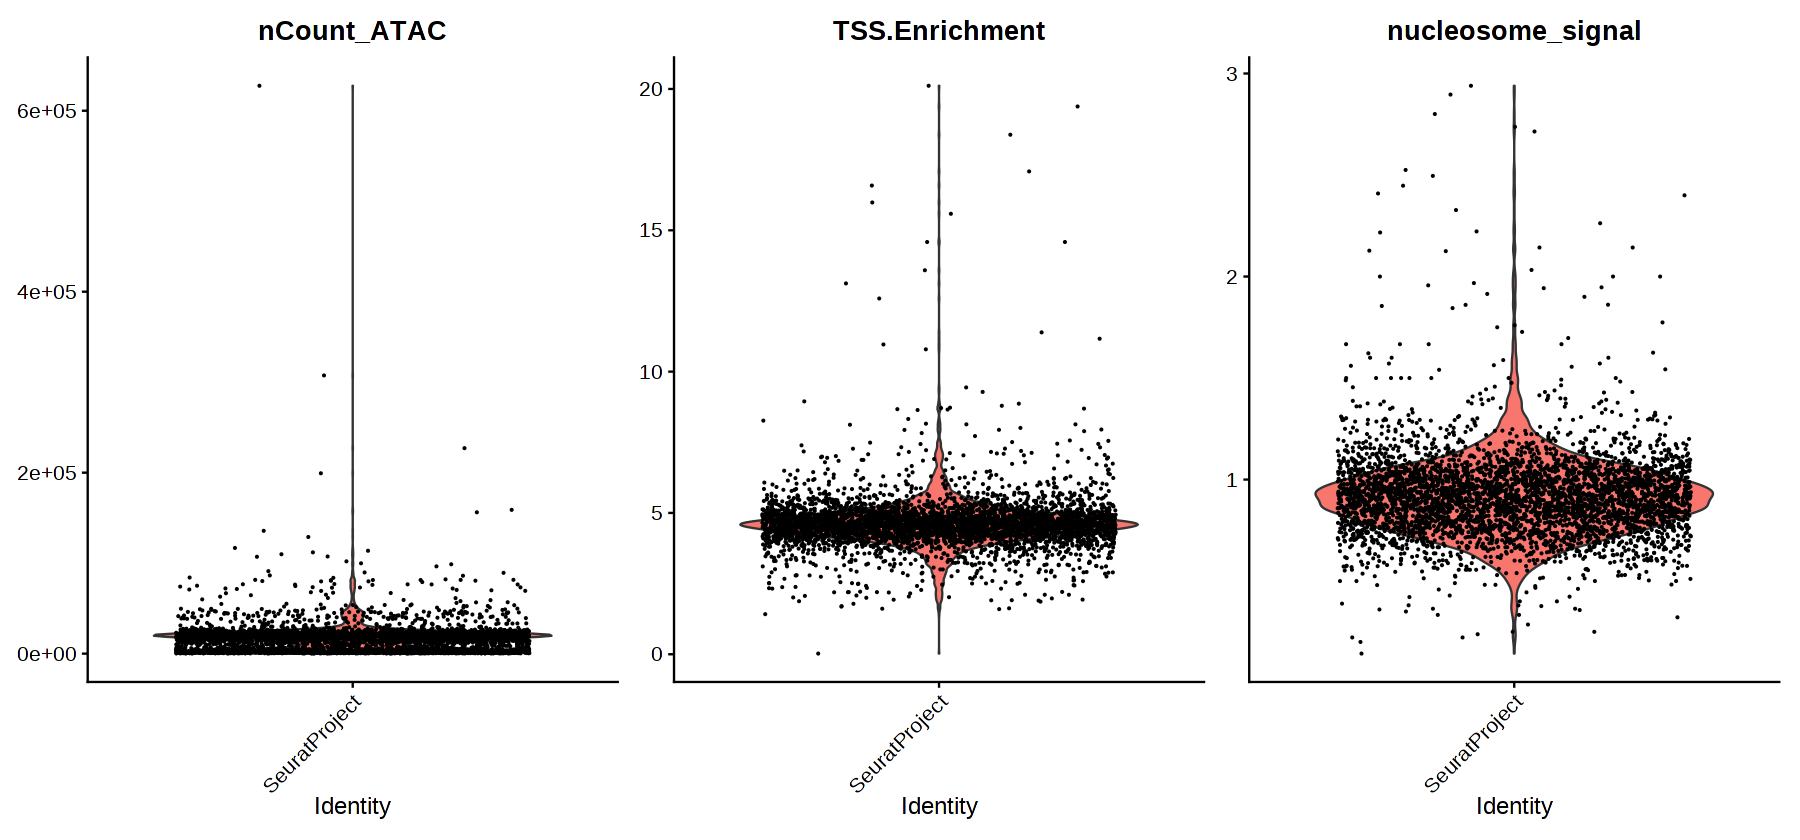

In [32]:
# Violin plots for QC metrics (total counts, TSS enrichment, nucleosome signal) in scATAC-seq data
VlnPlot(
  object = pbmc.atac,
  features = c("nCount_ATAC", "TSS.Enrichment", "nucleosome_signal"),
  ncol = 3,
  pt.size = 0.1
)

**Total number of fragments in peaks (nCount_ATAC)**
- 세포별로 peak 내에 있는 총 DNA fragment 수로, 세포의 시퀀싱 depth와 complexity을 나타낸다.
- 매우 적은 read는 낮은 sequencing depth를, 매우 많은 read는 doublet나 artefact를 의미할 수 있다.

**Transcriptional start site enrichment score (TSS.Enrichment)**
- TSS 중심의 조각 대비 TSS 주변 지역의 조각 비율을 기반으로 한 점수로, ATAC-seq 실험의 quality를 나타낸다.

**Nucleosome banding pattern (nucleosome_signal)**
- DNA fragment size는 단일 nucleosome에 감긴 DNA의 길이에 해당하는 nucleosome banding pattern을 보여야 한다.
- 이는 세포마다 계산되며, nucleosome-free fragment에 대한 mononucleosomal fragment의 대략적인 비율을 정량화한다.


In [33]:
# Filter scRNA-seq data based on RNA counts and mitochondrial gene expression to remove outlier cells
pbmc.rna <- subset(
  x = pbmc.rna,
  subset = nCount_RNA < 25000 &
    nCount_RNA > 1000 &
    percent.mt < 20
)

In [34]:
# Filter scATAC-seq data based on ATAC counts, nucleosome signal, and TSS enrichment to remove outlier cells
pbmc.atac <- subset(
  x = pbmc.atac,
  subset = nCount_ATAC < 70000 &
    nCount_ATAC > 5000 &
    nucleosome_signal < 2 &
    TSS.Enrichment > 1
)

In [35]:
# Retain only the filtered cells present in both scRNA-seq and scATAC-seq data
pbmc.rna$cell_id <- colnames(pbmc.rna)
pbmc.rna$cell_id <- colnames(pbmc.rna)
pbmc.atac$cell_id <- colnames(pbmc.atac)
pbmc.rna <- subset(pbmc.rna, cell_id %in% intersect(colnames(pbmc.rna),colnames(pbmc.atac)))
pbmc.atac <- subset(pbmc.atac, cell_id %in% intersect(colnames(pbmc.rna),colnames(pbmc.atac)))

In [36]:
pbmc.rna

An object of class Seurat 
36601 features across 2842 samples within 1 assay 
Active assay: RNA (36601 features, 0 variable features)
 1 layer present: counts

In [37]:
pbmc.atac

An object of class Seurat 
108377 features across 2842 samples within 1 assay 
Active assay: ATAC (108377 features, 0 variable features)
 2 layers present: counts, data

In [38]:
rbind(sort(table(pbmc.rna$seurat_annotations),decreasing=TRUE))
# rbind(sort(table(pbmc.atac$seurat_annotations),decreasing=TRUE)) # The result is the same as the code above

CD8 Naive NK  CD8 TEM_2 CD8 TEM_1 gdT MAIT
[1,] 1410      467 358       324       146 137

## 1.4 Basic Analysis

In [39]:
# Normalize, identify variable features, scale data, perform PCA, and run UMAP on scRNA-seq data
# for dimensionality reduction and visualization
pbmc.rna <- NormalizeData(pbmc.rna)
pbmc.rna <- FindVariableFeatures(pbmc.rna)
pbmc.rna <- ScaleData(pbmc.rna)
pbmc.rna <- RunPCA(pbmc.rna)
pbmc.rna <- RunUMAP(pbmc.rna, dims = 1:30)

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  NKG7, GNLY, PRF1, ZEB2, GZMA, KLRD1, CST7, CCL5, MYO1F, PYHIN1 
	   RAP1GAP2, TGFBR3, MCTP2, EFHD2, PLEK, GZMB, FGFBP2, SPON2, JAZF1, KLRF1 
	   ADGRG1, CCL4, GZMH, LYN, SYNE1, FCGR3A, PLCB1, VAV3, CTBP2, PPP2R2B 
Negative:  LEF1, BACH2, PDE3B, CAMK4, SERINC5, CCR7, NELL2, IL7R, MAML2, FOXP1 
	   PRKCA, THEMIS, EEF1A1, LTB, TRABD2A, NR3C2, RPL13, RCAN3, RASGRF2, SNED1 
	   FKBP5, NRCAM, RPS12, RPL34, RPS3A, PSMA1, MAL, MLLT3, PTPRK, FAM117B 
PC_ 2 
Positive:  WDFY3, LRMDA, SLC8A1, TLR2, LRRK2, RBM47, IRAK3, CREB5, TNFAIP2, PLXDC2 
	   FGD4, RTN1, PID1, KYNU, CSF3R, ARHGAP24, TNS3, KLF4, MARCH1, DMXL2 
	   CLEC7A, TREM1, TFEC, ALOX5, MCTP1, CSF2RA, MYOF, GLT1D1, MEF2C, SLC11A1 
Negative:  GZMA, NKG7, GZMH, CCL5, PRF1, GNLY, KLRD1, TGFBR3, PYHIN1, GZMB 
	   CCL4, CST7, FGFBP2, ADGRG1, SPON2, FCGR3A, PFN1, SYNE1, MCTP2, KLRG1 
	   CX3CR1, TOX, SYNE2, ACTB, A2M, MYBL1

In [40]:
pbmc.rna

An object of class Seurat 
36601 features across 2842 samples within 1 assay 
Active assay: RNA (36601 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

In [41]:
# Process scATAC-seq data using TF-IDF transformation, find top features, and perform SVD for dimensionality reduction
pbmc.atac <- RunTFIDF(pbmc.atac) # Normalization
pbmc.atac <- FindTopFeatures(pbmc.atac, min.cutoff = "q0") # Feature selection
pbmc.atac <- RunSVD(pbmc.atac) # Dimension reduction

Performing TF-IDF normalization

Warning message in RunTFIDF.default(object = GetAssayData(object = object, slot = "counts"), :
"Some features contain 0 total counts"
Running SVD

Scaling cell embeddings



**RunTFIDF** <br>
- TF-IDF: Term Frequency-Inverse Document Frequency
- 단어 빈도를 분석하는 텍스트 마이닝 분야에서 유래한 방법이다.
- TF-IDF 방법을 scATAC-seq 데이터 normalization 적용하는 경우, 'Term Frequency'는 특정 chromatin region(peak)이 특정 세포에서 얼마나 자주 발생하는지를 나타내며, 'Inverse Document Frequency'는 해당 peak가 모든 세포에서 얼마나 희귀하게 발생하는지를 나타낸다.
- 따라서, 유전자 발현량이 중요한 scRNA-seq 데이터와 비교하여 chromatin의 열림과 닫힘이 중요한 scATAC-seq 데이터에서 해당 방법이 matrix normalization에 사용된다.

**FindTopFeatures** <br>
- scATAC-seq 데이터는 낮은 dynamic range를 가지며, 따라서 scRNA-seq 데이터와 같은 방식으로 variable feature selection이 어렵다.
- 평균과 분산을 고려하여 variable feature를 선택하는 scRNA-seq과 다르게 특정 세포 개수 이하에서 나타난 peak를 제거하거나, 상위 퍼센트의 peak한 선택한다.

**RunSVD** <br>
- SVD: Singular Value Decomposition
- SVD는 어떤 행렬을 세 개의 다른 행렬의 곱으로 분해하는 방법이다.
- 이 방법은 데이터의 차원을 축소하고, 데이터 내의 잠재적인 구조를 발견하는 데 사용될 수 있다.
- SVD는 PCA보다 더 일반적이고 유연한 방법인데, PCA는 사실상 SVD의 한 응용으로 볼 수 있으며, 데이터 행렬의 공분산(또는 상관관계) 행렬에 SVD를 적용하여 주성분을 찾는다.
- SVD는 희소성이 높은 데이터나 복잡한 구조를 가진 데이터에 더 적합할 수 있고, PCA는 주로 분산을 기준으로 데이터를 요약하고 싶을 때 사용된다.

**LSI** <br>
- TF-IDF 다음에 SVD를 적용하는 결합 단계는 latent semantic indexing(LSI)으로 불리며, 따라서 scATAC-seq 데이터를 lsi의 저차원으로 축소한다.

In [42]:
pbmc.atac

An object of class Seurat 
108377 features across 2842 samples within 1 assay 
Active assay: ATAC (108377 features, 108377 variable features)
 2 layers present: counts, data
 1 dimensional reduction calculated: lsi

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font width unknown for character 0x09 in encoding latin1"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"font width unknown for character 0x09 in encoding latin1"


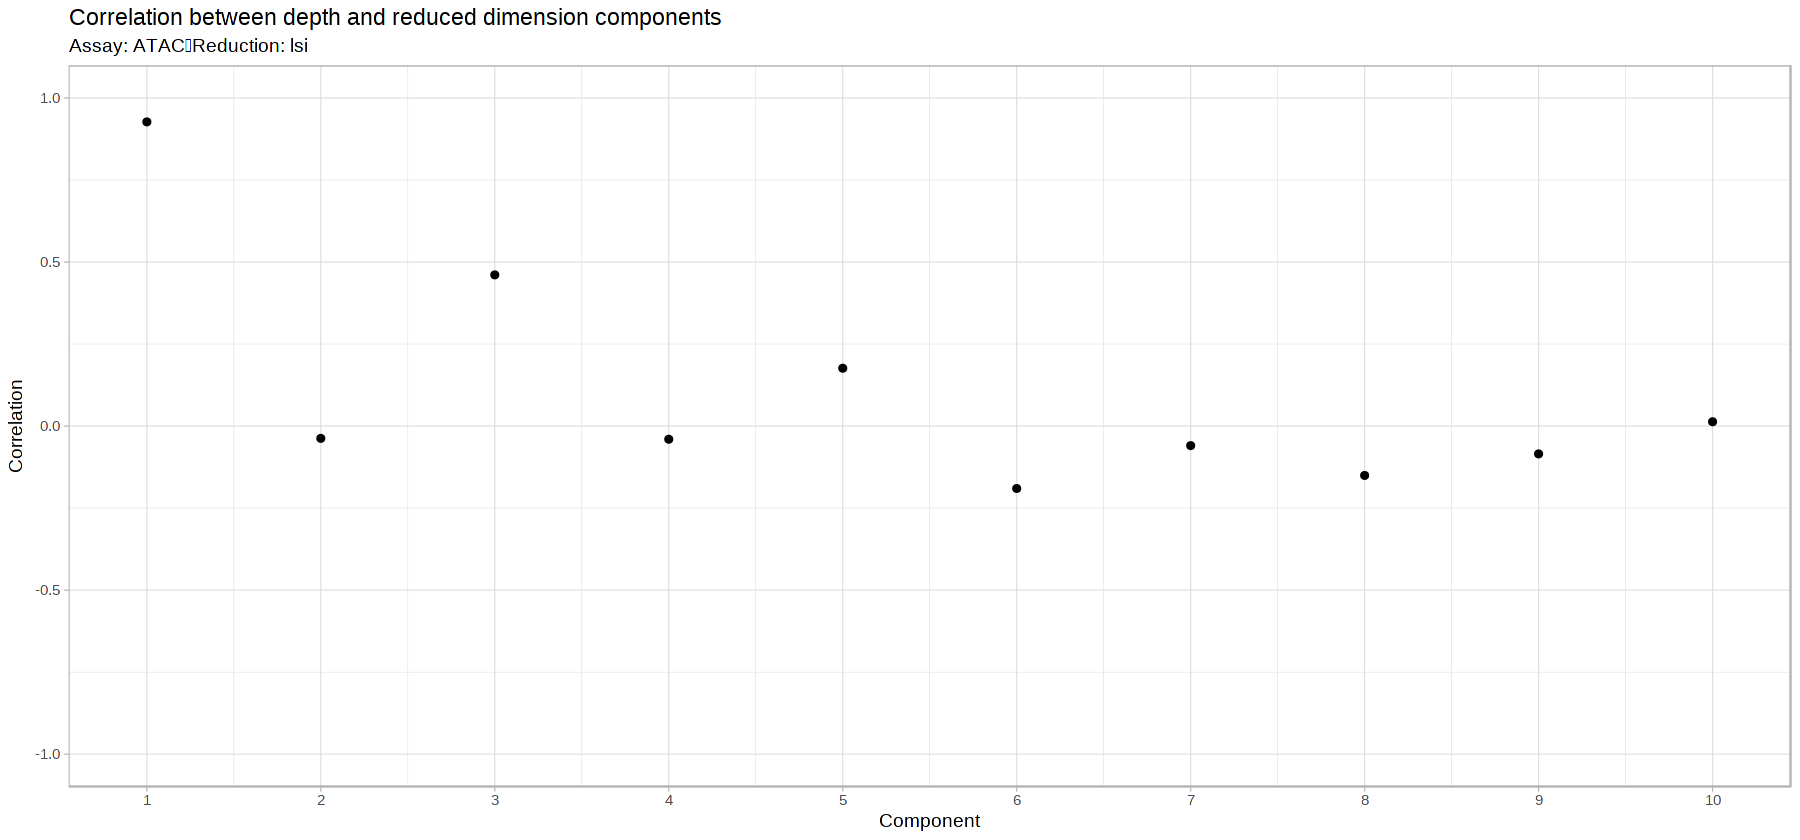

In [43]:
# Compute the correlation between total counts and each reduced dimension component.
DepthCor(pbmc.atac)

- scATAC-seq 데이터 분석에서 Latent Semantic Indexing (LSI)를 사용할 때, 첫 번째 LSI 성분은 종종 sequencing depth와 같은 technical variation을 주로 포착하므로 제거하여 이후 분석을 진행한다.

In [44]:
# Exclude the first dimension as this is typically correlated with sequencing depth
pbmc.atac <- RunUMAP(pbmc.atac, reduction = "lsi", dims = 2:30, reduction.name = "umap.atac", reduction.key = "atacUMAP_")

12:05:31 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by 'BiocGenerics'

12:05:31 Read 2842 rows and found 29 numeric columns

12:05:31 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by 'BiocGenerics'

12:05:31 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:05:32 Writing NN index file to temp file /tmp/Rtmp65naZt/fileca526047d0d

12:05:32 Searching Annoy index using 1 thread, search_k = 3000

12:05:33 Annoy recall = 100%

12:05:35 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

12:05:39 Initializing from normalized Laplacian + no

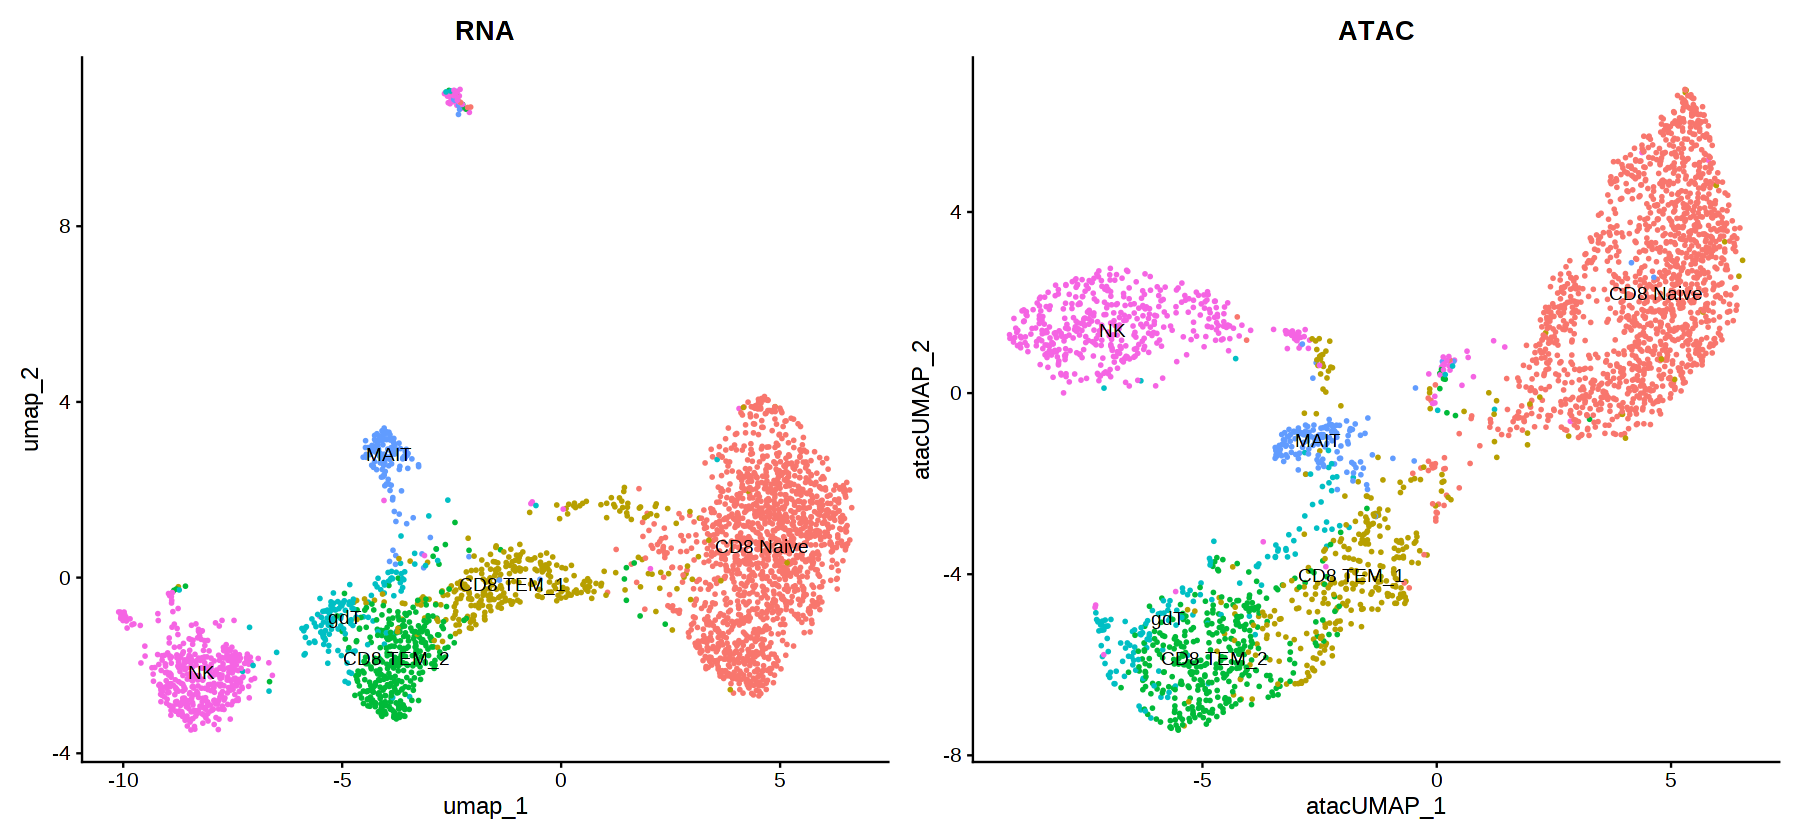

In [45]:
p1 <- DimPlot(pbmc.rna, group.by = "seurat_annotations", label = TRUE) + NoLegend() + ggtitle("RNA")
p2 <- DimPlot(pbmc.atac, group.by = "seurat_annotations", label = TRUE) + NoLegend() + ggtitle("ATAC")
p1 + p2

## 1.5 Identifying anchors

- scRNA-seq 데이터 scATAC-seq 데이터를 통합 분석하기 위해서는
 두 데이터셋 간의 'Anchor'를 식별해야 한다.

In [46]:
pbmc.atac

An object of class Seurat 
108377 features across 2842 samples within 1 assay 
Active assay: ATAC (108377 features, 108377 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: lsi, umap.atac

In [47]:
# Quantify gene activity
gene.activities <- GeneActivity(pbmc.atac, features = VariableFeatures(pbmc.rna))
# Add gene activities as a new assay
pbmc.atac[["ACTIVITY"]] <- CreateAssayObject(counts = gene.activities)
# Normalize and Scale gene activities
DefaultAssay(pbmc.atac) <- "ACTIVITY"
pbmc.atac <- NormalizeData(pbmc.atac)
pbmc.atac <- ScaleData(pbmc.atac, features = rownames(pbmc.atac))

Extracting gene coordinates

Extracting reads overlapping genomic regions

Centering and scaling data matrix



**Gene Activity**
- scRNA-seq 데이터와의 anchor를 찾기 위해 cell x peak 형태로 되어 있는 scATAC-seq를 cell x gene 형태로 바꿔줄 수 있는 Gene activity를 계산한다.
- 각 유전자의 2 kb-upstream region(promoter)과 gene body에 존재하는 fragment들을 더하는 과정을 통해 chromatin accessibility를 gene activity로 바꿔준다.

In [48]:
pbmc.atac

An object of class Seurat 
109612 features across 2842 samples within 2 assays 
Active assay: ACTIVITY (1235 features, 0 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: ATAC
 2 dimensional reductions calculated: lsi, umap.atac

In [49]:
pbmc.atac@assays$ACTIVITY["counts"][1:5,1:3]

5 x 3 sparse Matrix of class "dgCMatrix"
        AAACAGCCACCAACCG-1 AAACAGCCAGTAGGTG-1 AAACATGCAAGGTCCT-1
CSF2RA                   .                  3                  .
DHRSX                    .                  .                  .
XG                       .                  .                  .
SAT1                     .                  1                  1
CXorf21                  .                  .                  .

In [50]:
# Identify transfer anchors using variable features from scRNA-seq
transfer.anchors <- FindTransferAnchors(reference = pbmc.rna, query = pbmc.atac, features = VariableFeatures(object = pbmc.rna),
    reference.assay = "RNA", query.assay = "ACTIVITY", reduction = "cca") # Canonical Correlation Analysis

Warning message:
"765 features of the features specified were not present in both the reference query assays. 
Continuing with remaining 1235 features."
Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 9526 anchors



- scATAC-seq 데이터의 gene activity와 scRNA-seq 데이터의 gene expression을 사용하여 두 데이터 셋의 anchor를 찾아준다.

## 1.6 Annotate scATAC-seq cells via label transfer

- Anchor를 식별한 후, scRNA-seq 데이터의 annotation을 scATAC-seq 세포에 전달할 수 있다.
- 이 과정을 통해, 이미 잘 분류되고 해석된 scRNA-seq 데이터의 정보를 활용하여, scATAC-seq 데이터 내의 세포들을 annotation하는 것이 가능하다.

In [51]:
# Transfer cell type annotations from scRNA-seq to scATAC-seq data and add metadata to scATAC-seq
celltype.predictions <- TransferData(
    anchorset = transfer.anchors,
    refdata = pbmc.rna$seurat_annotations, # categorical information
    weight.reduction = pbmc.atac[["lsi"]], dims = 2:30)
pbmc.atac <- AddMetaData(pbmc.atac, metadata = celltype.predictions)

Finding integration vectors

Finding integration vector weights

Predicting cell labels



In [52]:
head(celltype.predictions,3)

predicted.id prediction.score.CD8.Naive prediction.score.NK
AAACAGCCACCAACCG-1 CD8 Naive    0.7547618                  0.00000000         
AAACAGCCAGTAGGTG-1 CD8 Naive    0.9254619                  0.04041194         
AAACATGCAAGGTCCT-1 CD8 Naive    0.9602393                  0.01357248         
                   prediction.score.CD8.TEM_1 prediction.score.MAIT
AAACAGCCACCAACCG-1 0.24216459                 0                    
AAACAGCCAGTAGGTG-1 0.02485294                 0                    
AAACATGCAAGGTCCT-1 0.01741587                 0                    
                   prediction.score.gdT prediction.score.CD8.TEM_2
AAACAGCCACCAACCG-1 0.003073662          0.000000000               
AAACAGCCAGTAGGTG-1 0.000000000          0.009273232               
AAACATGCAAGGTCCT-1 0.008772382          0.000000000               
                   prediction.score.max
AAACAGCCACCAACCG-1 0.7547618           
AAACAGCCAGTAGGTG-1 0.9254619           
AAACATGCAAGGTCCT-1 0.9602393

- scRNA-seq 데이터의 "seurat_annotation"에 존재하는 categorical information을 anchor를 사용하여 scATAC-seq 데이터의 cell type을 예측한다.
- 각 cell type별로 prediction의 신뢰도를 나타내는 prediction.score가 나오고, prediction.score가 가장 높은 cell type이 해당 cell의 predicted.id로 예측됨을 알 수 있다.

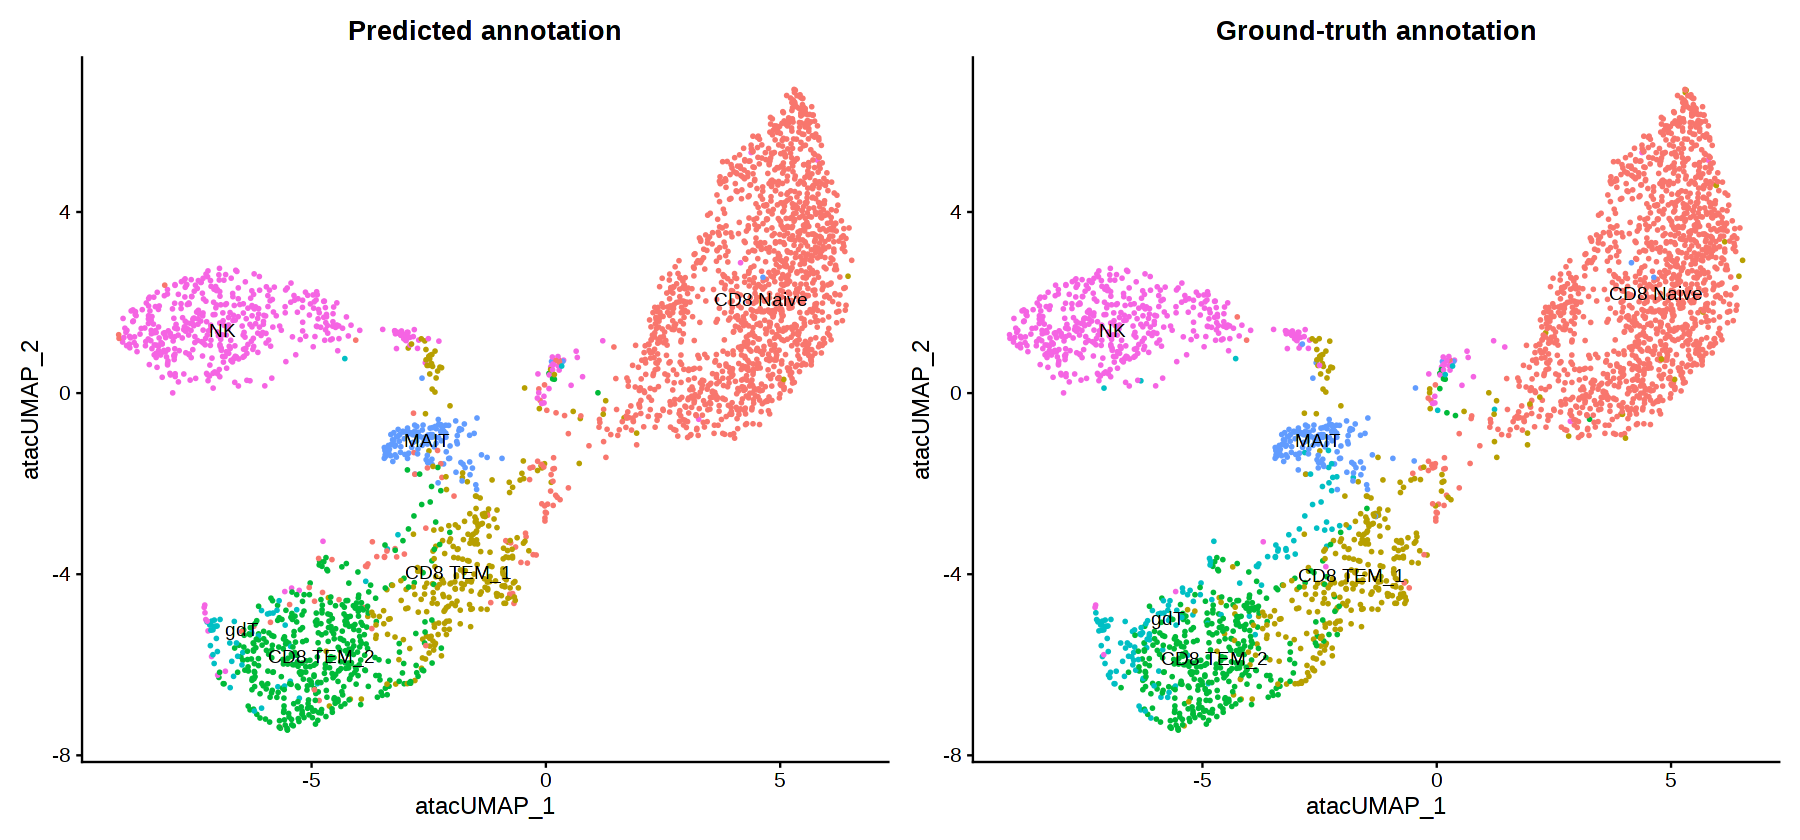

In [53]:
pbmc.atac$annotation_correct <- pbmc.atac$predicted.id == pbmc.atac$seurat_annotations
p1 <- DimPlot(pbmc.atac, group.by = "predicted.id", label = TRUE) + NoLegend() + ggtitle("Predicted annotation")
p2 <- DimPlot(pbmc.atac, group.by = "seurat_annotations", label = TRUE) + NoLegend() + ggtitle("Ground-truth annotation")
p1 | p2

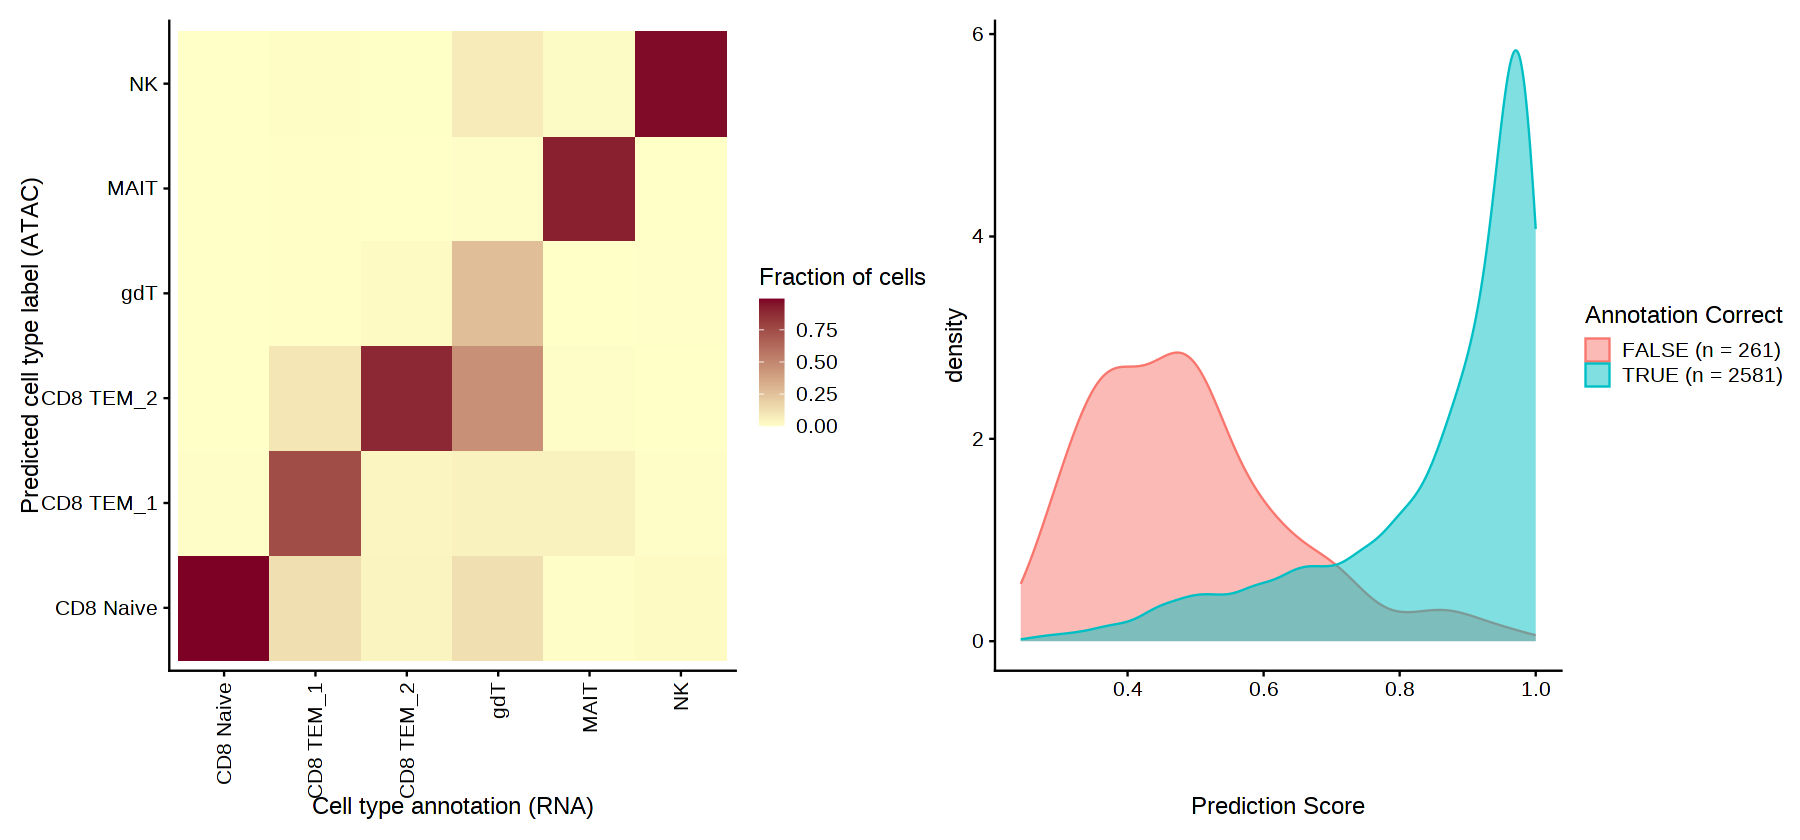

In [54]:
predictions <- table(pbmc.atac$seurat_annotations, pbmc.atac$predicted.id)
predictions <- predictions/rowSums(predictions)
predictions <- as.data.frame(predictions)
p1 <- ggplot(predictions, aes(Var1, Var2, fill = Freq)) + geom_tile() + scale_fill_gradient(name = "Fraction of cells",
    low = "#ffffc8", high = "#7d0025") + xlab("Cell type annotation (RNA)") + ylab("Predicted cell type label (ATAC)") +
    theme_cowplot() + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

correct <- length(which(pbmc.atac$seurat_annotations == pbmc.atac$predicted.id))
incorrect <- length(which(pbmc.atac$seurat_annotations != pbmc.atac$predicted.id))
data <- FetchData(pbmc.atac, vars = c("prediction.score.max", "annotation_correct"))
p2 <- ggplot(data, aes(prediction.score.max, fill = annotation_correct, colour = annotation_correct)) +
    geom_density(alpha = 0.5) + theme_cowplot() + scale_fill_discrete(name = "Annotation Correct",
    labels = c(paste0("FALSE (n = ", incorrect, ")"), paste0("TRUE (n = ", correct, ")"))) + scale_color_discrete(name = "Annotation Correct",
    labels = c(paste0("FALSE (n = ", incorrect, ")"), paste0("TRUE (n = ", correct, ")"))) + xlab("Prediction Score")
p1 + p2

## 1.7 Co-embedding

- scRNA-seq와 scATAC-seq 데이터 셋 간에 label을 전달하는 것 외에도, 두 데이터 셋의 cell을 동일한 차원의 plot 위에 시각화할 수 있다.
- Co-embedding을 위해
 먼저 이전에 계산된 anchor를 기반으로 scATAC-seq 세포에 RNA expression을 'imputation'하고, 그 후 데이터 셋를 병합한다.

In [55]:
# Extract variable features from scRNA-seq data and retrieve scRNA-seq expression matrix for integration
genes.use <- VariableFeatures(pbmc.rna)
refdata <- GetAssayData(pbmc.rna, assay = "RNA", slot = "data")[genes.use, ]

Warning message:
"The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead."


In [56]:
# Transfer gene expression data from scRNA-seq to scATAC-seq cells using precomputed anchors for imputation
imputation <- TransferData(
  anchorset = transfer.anchors,
  refdata = refdata, # continuous information
  weight.reduction = pbmc.atac[["lsi"]], dims = 2:30)
# imputation (output) will contain an imputed scRNA-seq matrix for each of the ATAC cells
pbmc.atac[["RNA"]] <- imputation

Finding integration vectors

Finding integration vector weights

Transfering 2000 features onto reference data



In [57]:
pbmc.atac

An object of class Seurat 
111612 features across 2842 samples within 3 assays 
Active assay: ACTIVITY (1235 features, 0 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: ATAC, RNA
 2 dimensional reductions calculated: lsi, umap.atac

In [58]:
# Remove unnecessary variables due to memory
rm(gene.activities,transfer.anchors,celltype.predictions,refdata,imputation)

In [59]:
# Merges scRNA-seq and scATAC-seq datasets
coembed <- merge(x = pbmc.rna, y = pbmc.atac)
# Joins layers from both datasets into a single layer
coembed <- JoinLayers(coembed)
# Removes unnecessary layers except for the merged layer
coembed@assays$RNA["counts"]<-NULL
coembed@assays$RNA["counts.1"]<-NULL
coembed@assays$RNA["scale.data.1"]<-NULL
coembed@assays$RNA["scale.data"]<-NULL

Warning message:
"Some cell names are duplicated across objects provided. Renaming to enforce unique cell names."


In [60]:
coembed

An object of class Seurat 
146213 features across 5684 samples within 3 assays 
Active assay: RNA (36601 features, 2000 variable features)
 1 layer present: data
 2 other assays present: ATAC, ACTIVITY

In [61]:
# Scaling, perform PCA, and run UMAP on integrated scRNA-seq and scATAC-seq data for dimensional reduction and visualization
coembed <- ScaleData(coembed, features = genes.use, do.scale = FALSE)
coembed <- RunPCA(coembed, features = genes.use, verbose = FALSE)
coembed <- RunUMAP(coembed, dims = 1:30)

Centering data matrix

12:09:57 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by 'BiocGenerics'

12:09:57 Read 5684 rows and found 30 numeric columns

12:09:57 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by 'BiocGenerics'

12:09:57 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:09:59 Writing NN index file to temp file /tmp/Rtmp65naZt/fileca57db399c8

12:09:59 Searching Annoy index using 1 thread, search_k = 3000

12:10:01 Annoy recall = 100%

12:10:04 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

12:10:07 Initializing from no

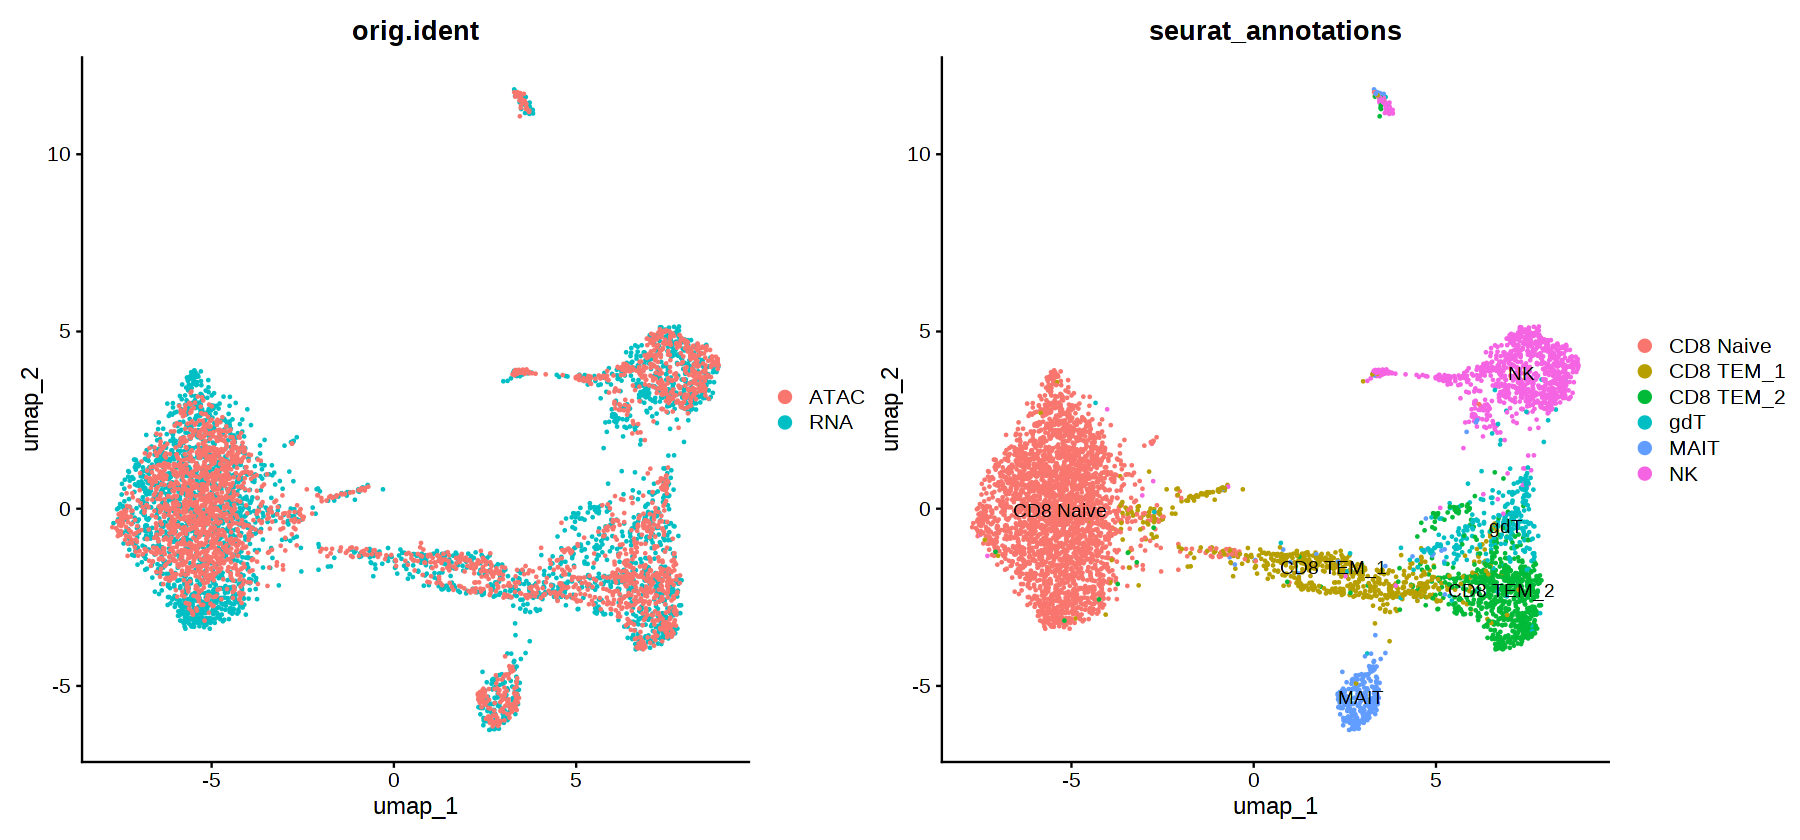

In [62]:
p1 <- DimPlot(coembed, group.by = "orig.ident",label=F)
p2 <- DimPlot(coembed, group.by = "seurat_annotations",label=T)
p1+p2

In [63]:
# Run this code if you want to save the Seurat object
# saveRDS(pbmc.rna,paste0(output_dir,"pbmc.rna.rds"))
# saveRDS(pbmc.atac,paste0(output_dir,"pbmc.atac.rds"))
# saveRDS(coembed,paste0(output_dir,"coembed.rds"))

In [64]:
end_time = Sys.time()
print(end_time-start_time)

Time difference of 14.21193 mins


# 2. DEG & DAR Analysis

In [65]:
start_time = Sys.time()

- scRNA-seq 데이터를 사용하여 각 cell type별로 다르게 발현하는 유전자(differentially expressed gene, DEG)를 알 수 있다.
- scATAC-seq 데이터를 사용하여 각 cell type별로 다르게 접근가능한 region(differentially accessible region, DAR)를 알 수 있다.

## 2.1 DEG

In [66]:
pbmc.rna

An object of class Seurat 
36601 features across 2842 samples within 1 assay 
Active assay: RNA (36601 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

In [67]:
# Find differentially accessible regions for every cluster compared to all remaining cells
pbmc.rna@active.ident <- factor(pbmc.rna$seurat_annotations)
deg <- FindAllMarkers(pbmc.rna, only.pos = F, min.pct = 0.2, logfc.threshold = 0.5)
write.table(deg,paste0(output_dir,"DEG.txt"),sep = '\t',quote=F)

Calculating cluster CD8 Naive

Calculating cluster CD8 TEM_1

Calculating cluster CD8 TEM_2

Calculating cluster gdT

Calculating cluster MAIT

Calculating cluster NK



In [68]:
deg_sub=deg[deg$p_val_adj<0.01,]

In [69]:
length(unique(deg_sub$gene))
head(deg_sub,3)

[1] 1514

p_val avg_log2FC pct.1 pct.2 p_val_adj cluster   gene
CCL5 0     -5.901597  0.085 0.892 0         CD8 Naive CCL5
NKG7 0     -5.657490  0.118 0.892 0         CD8 Naive NKG7
LEF1 0      3.135835  0.964 0.233 0         CD8 Naive LEF1

In [70]:
rbind(table(deg_sub$cluster))

CD8 Naive CD8 TEM_1 CD8 TEM_2 gdT MAIT NK 
[1,] 1114      157       493       256 207  975

Warning message in DoHeatmap(pbmc.rna, features = top20$gene):
"The following features were omitted as they were not found in the scale.data slot for the RNA assay: IL18R1, CCR6, RORC, FCRL6, IL10RA, BICDL1, PIK3IP1, ABLIM1, SELL, TCF7, NDFIP1, ACTN1, OXNAD1"


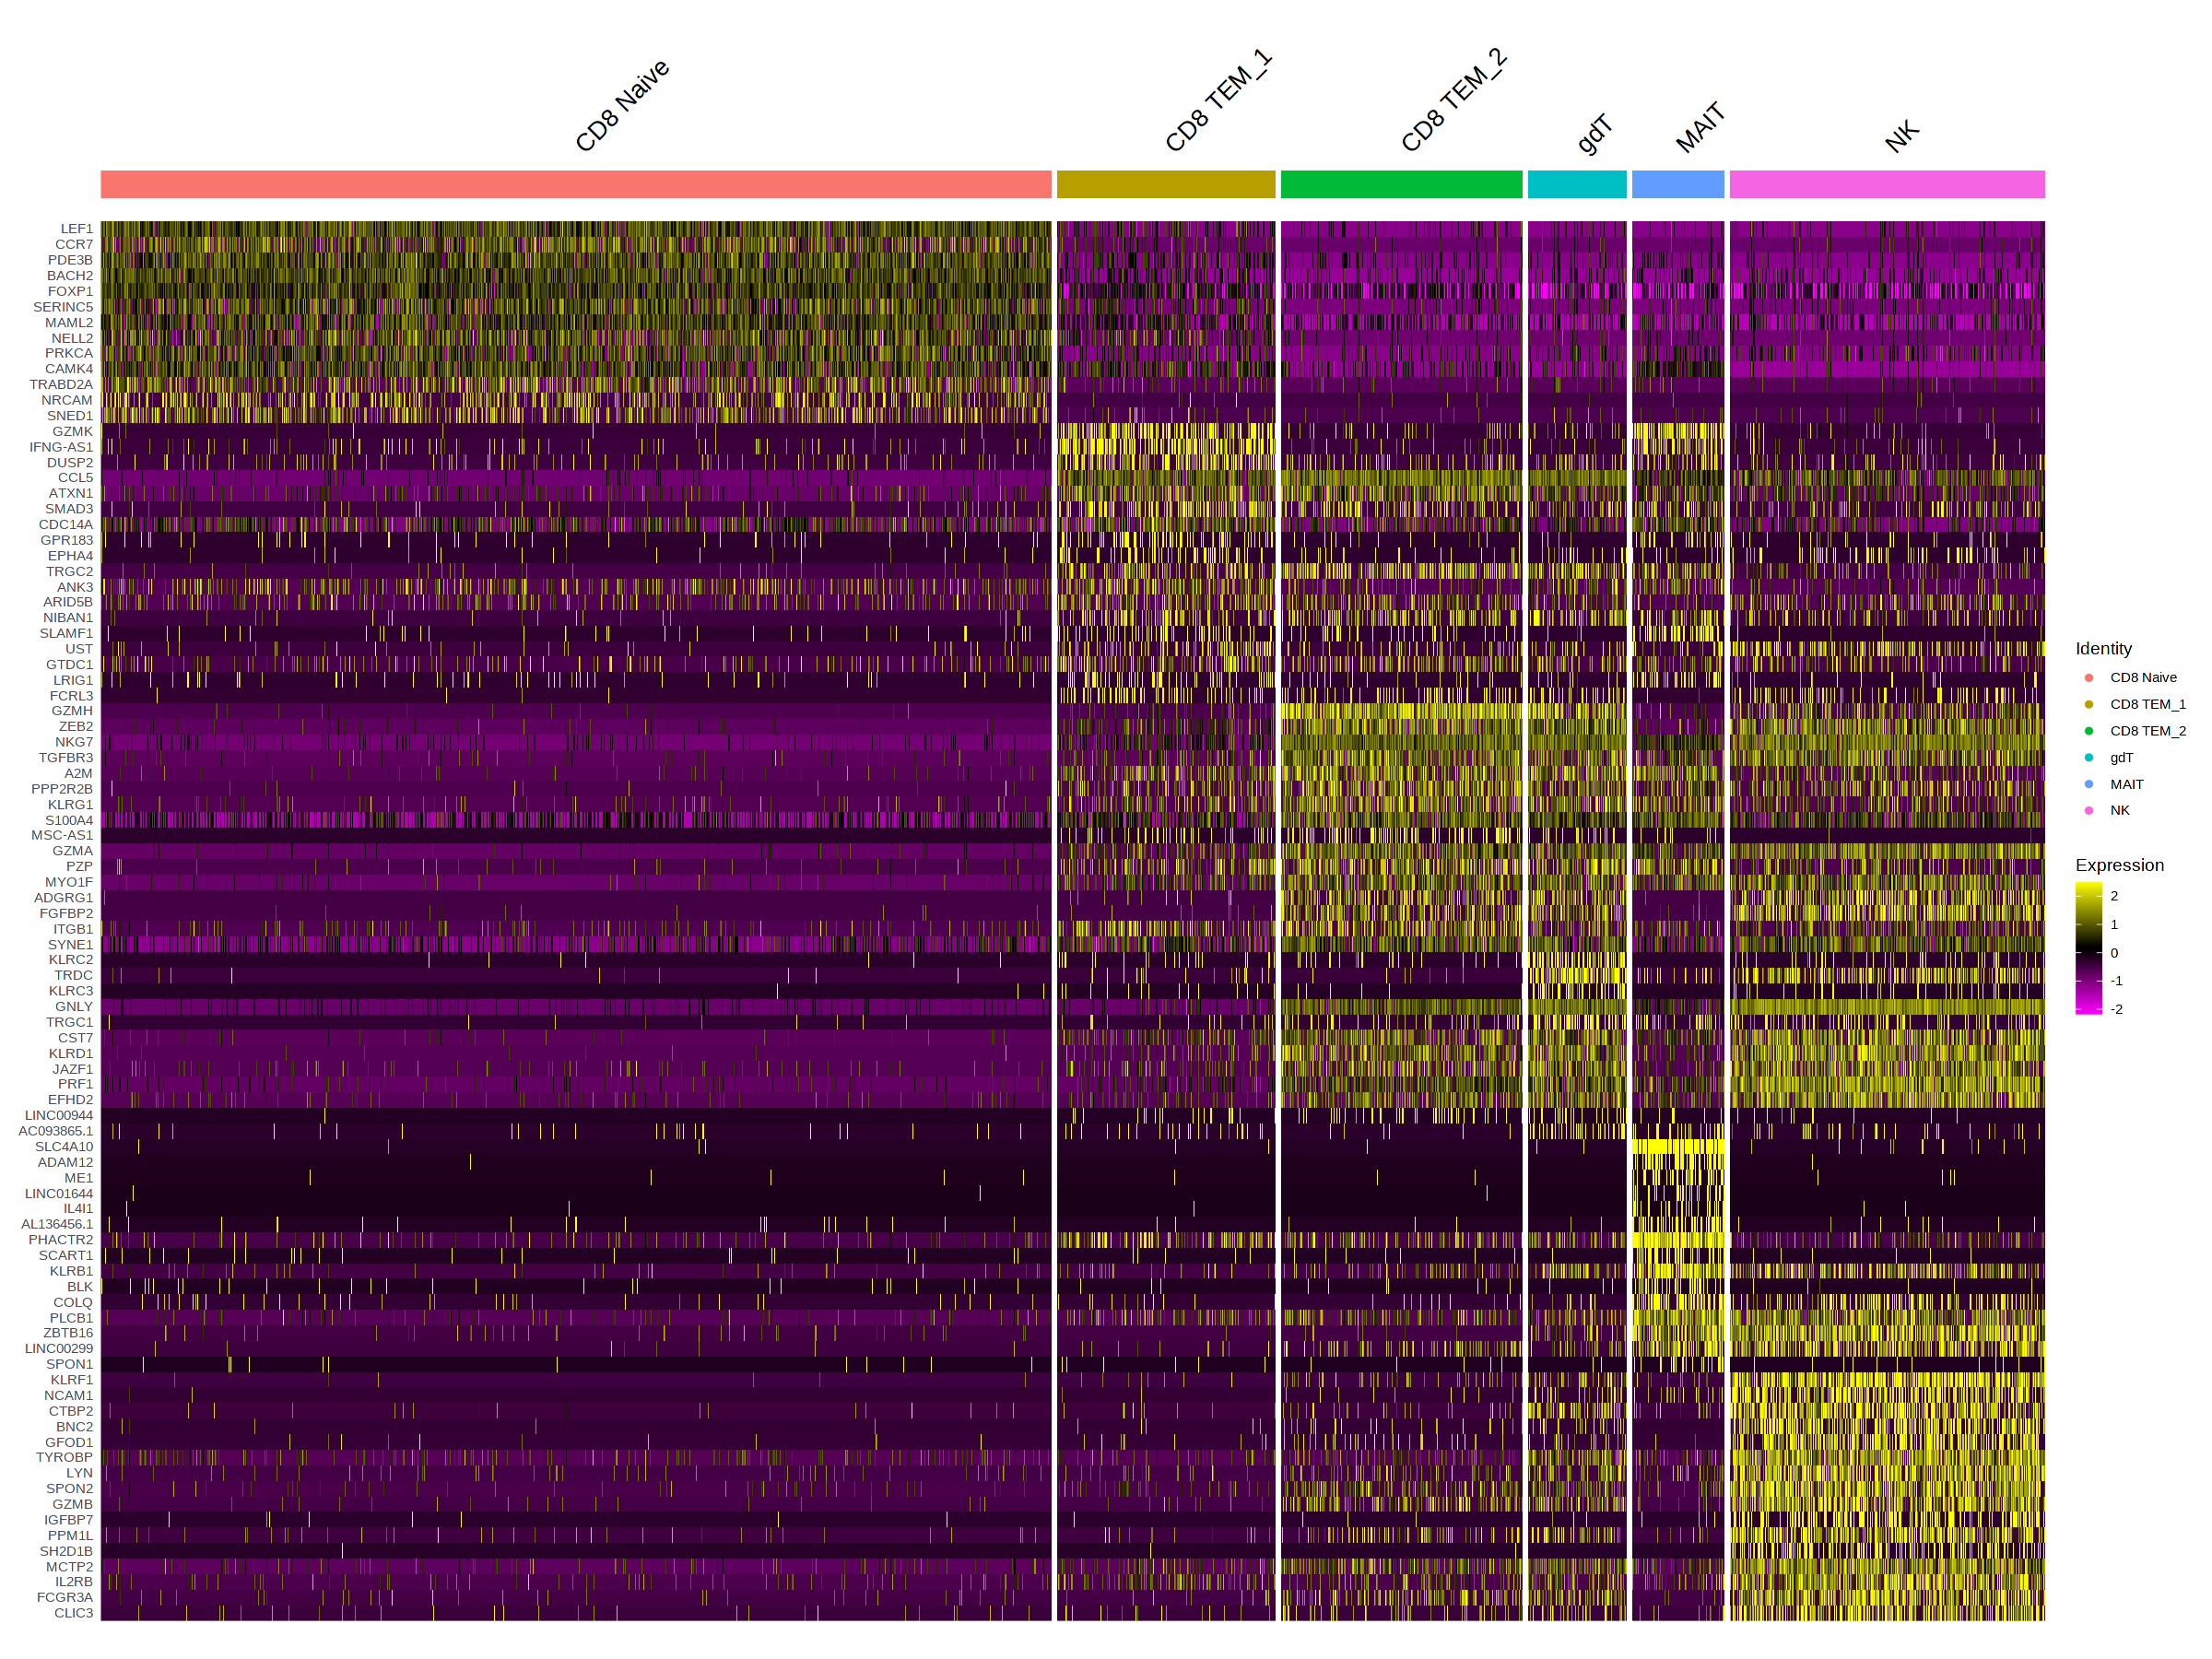

In [71]:
options(repr.plot.width=20, repr.plot.height=15)
deg_sub %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1) %>%
    slice_head(n = 20) %>%
    ungroup() -> top20
DoHeatmap(pbmc.rna, features = top20$gene) # + NoLegend()

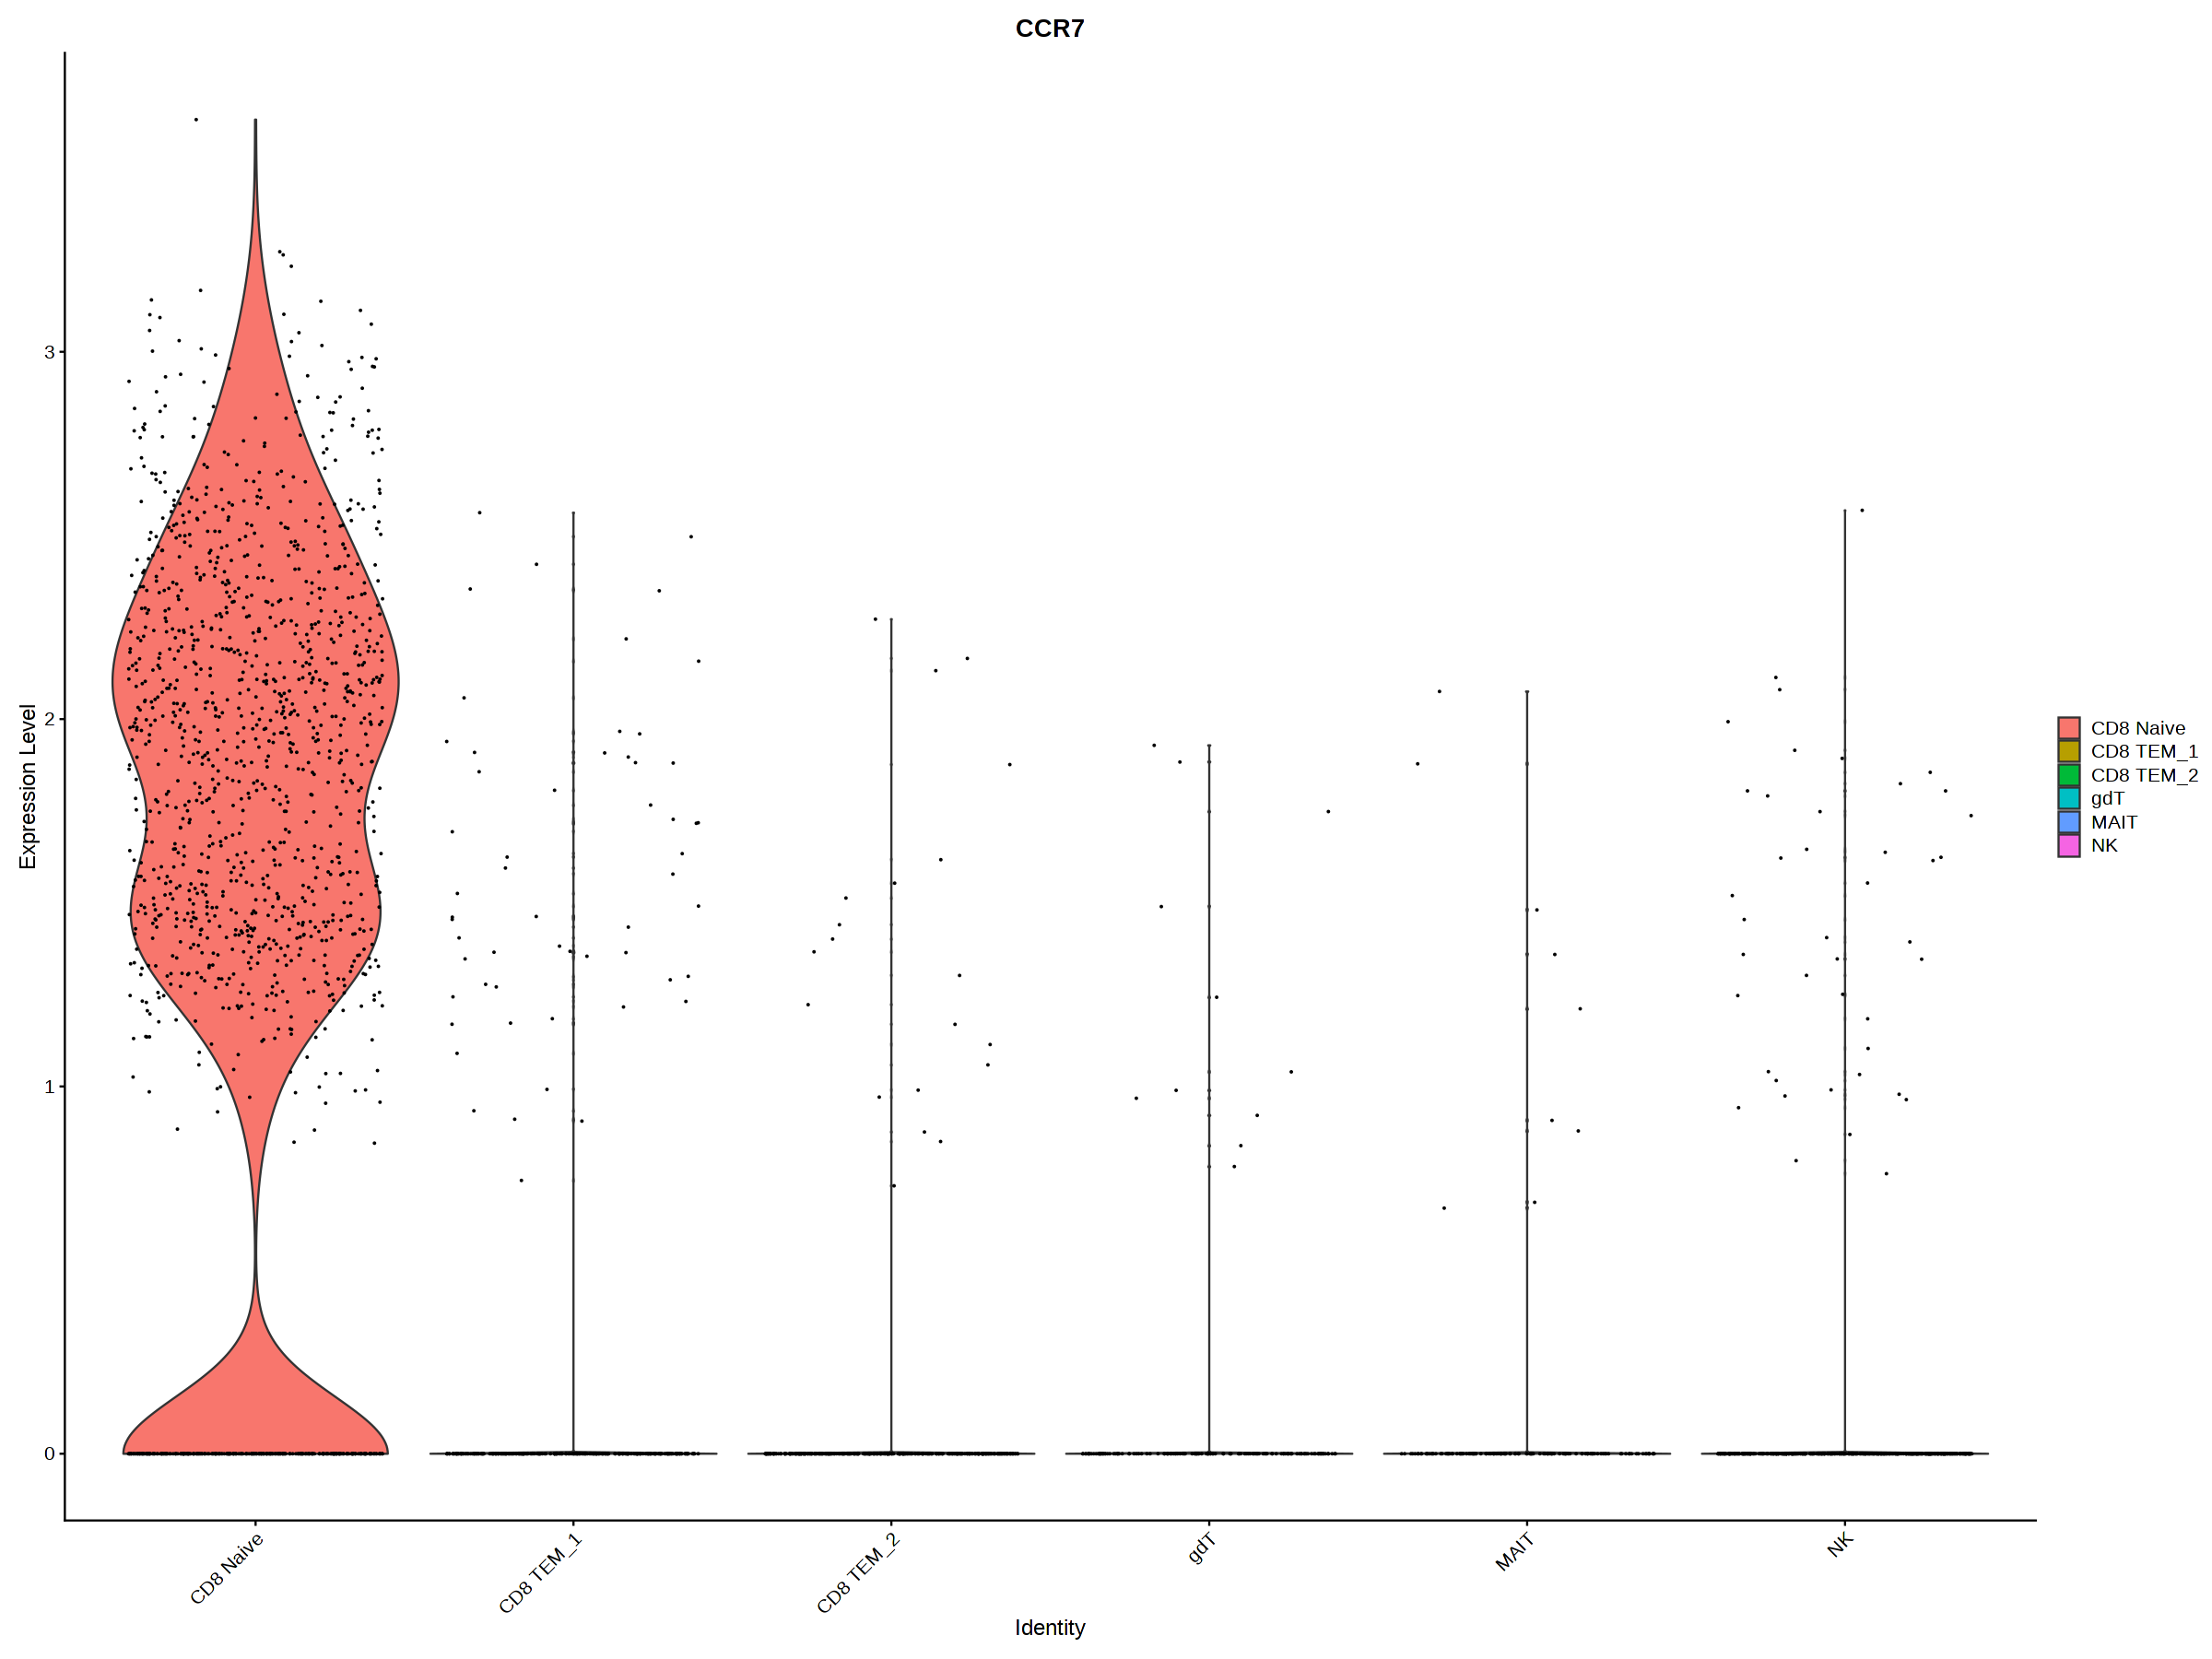

In [72]:
VlnPlot(object = pbmc.rna, features = 'CCR7', group.by="seurat_annotations")

## 2.2 DAR

In [73]:
pbmc.atac

An object of class Seurat 
111612 features across 2842 samples within 3 assays 
Active assay: ACTIVITY (1235 features, 0 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: ATAC, RNA
 2 dimensional reductions calculated: lsi, umap.atac

In [74]:
DefaultAssay(pbmc.atac) <- "ATAC"
pbmc.atac

An object of class Seurat 
111612 features across 2842 samples within 3 assays 
Active assay: ATAC (108377 features, 108377 variable features)
 2 layers present: counts, data
 2 other assays present: ACTIVITY, RNA
 2 dimensional reductions calculated: lsi, umap.atac

- macs2를 사용하여 새롭게 peak calling하여 생성한 peaks assay를 사용하여 DAR 분석 진행

In [75]:
# Find differentially expressed genes for every cluster compared to all remaining cells
pbmc.atac@active.ident <- factor(pbmc.atac$seurat_annotations)
table(Idents(pbmc.atac))
dar <- FindAllMarkers(pbmc.atac, only.pos = F, min.pct = 0.3, logfc.threshold = 0.5)
write.table(dar,paste0(output_dir,"DAR.txt"),sep = '\t',quote=F)


CD8 Naive CD8 TEM_1 CD8 TEM_2       gdT      MAIT        NK 
     1410       324       358       146       137       467 

Calculating cluster CD8 Naive

Calculating cluster CD8 TEM_1

Calculating cluster CD8 TEM_2

Calculating cluster gdT

Calculating cluster MAIT

Calculating cluster NK



In [76]:
dar_sub=dar[dar$p_val_adj<0.01,]
length(unique(dar_sub$gene))
head(dar_sub,3)

[1] 2636

p_val         avg_log2FC pct.1 pct.2 p_val_adj    
chr2-144507361-144525092 1.733054e-269 -2.938777  0.200 0.806 1.878232e-264
chr3-4975862-4990757     5.385001e-257 -2.123920  0.400 0.885 5.836103e-252
chr2-241762278-241764383 5.009858e-243 -5.704102  0.018 0.605 5.429533e-238
                         cluster   gene                    
chr2-144507361-144525092 CD8 Naive chr2-144507361-144525092
chr3-4975862-4990757     CD8 Naive chr3-4975862-4990757    
chr2-241762278-241764383 CD8 Naive chr2-241762278-241764383

In [77]:
rbind(table(dar_sub$cluster))

CD8 Naive CD8 TEM_1 CD8 TEM_2 gdT MAIT NK  
[1,] 1723      153       736       363 431  1359

Warning message:
"Assay RNA changing from Assay to Assay5"
Warning message:
"Different cells and/or features from existing assay RNA"


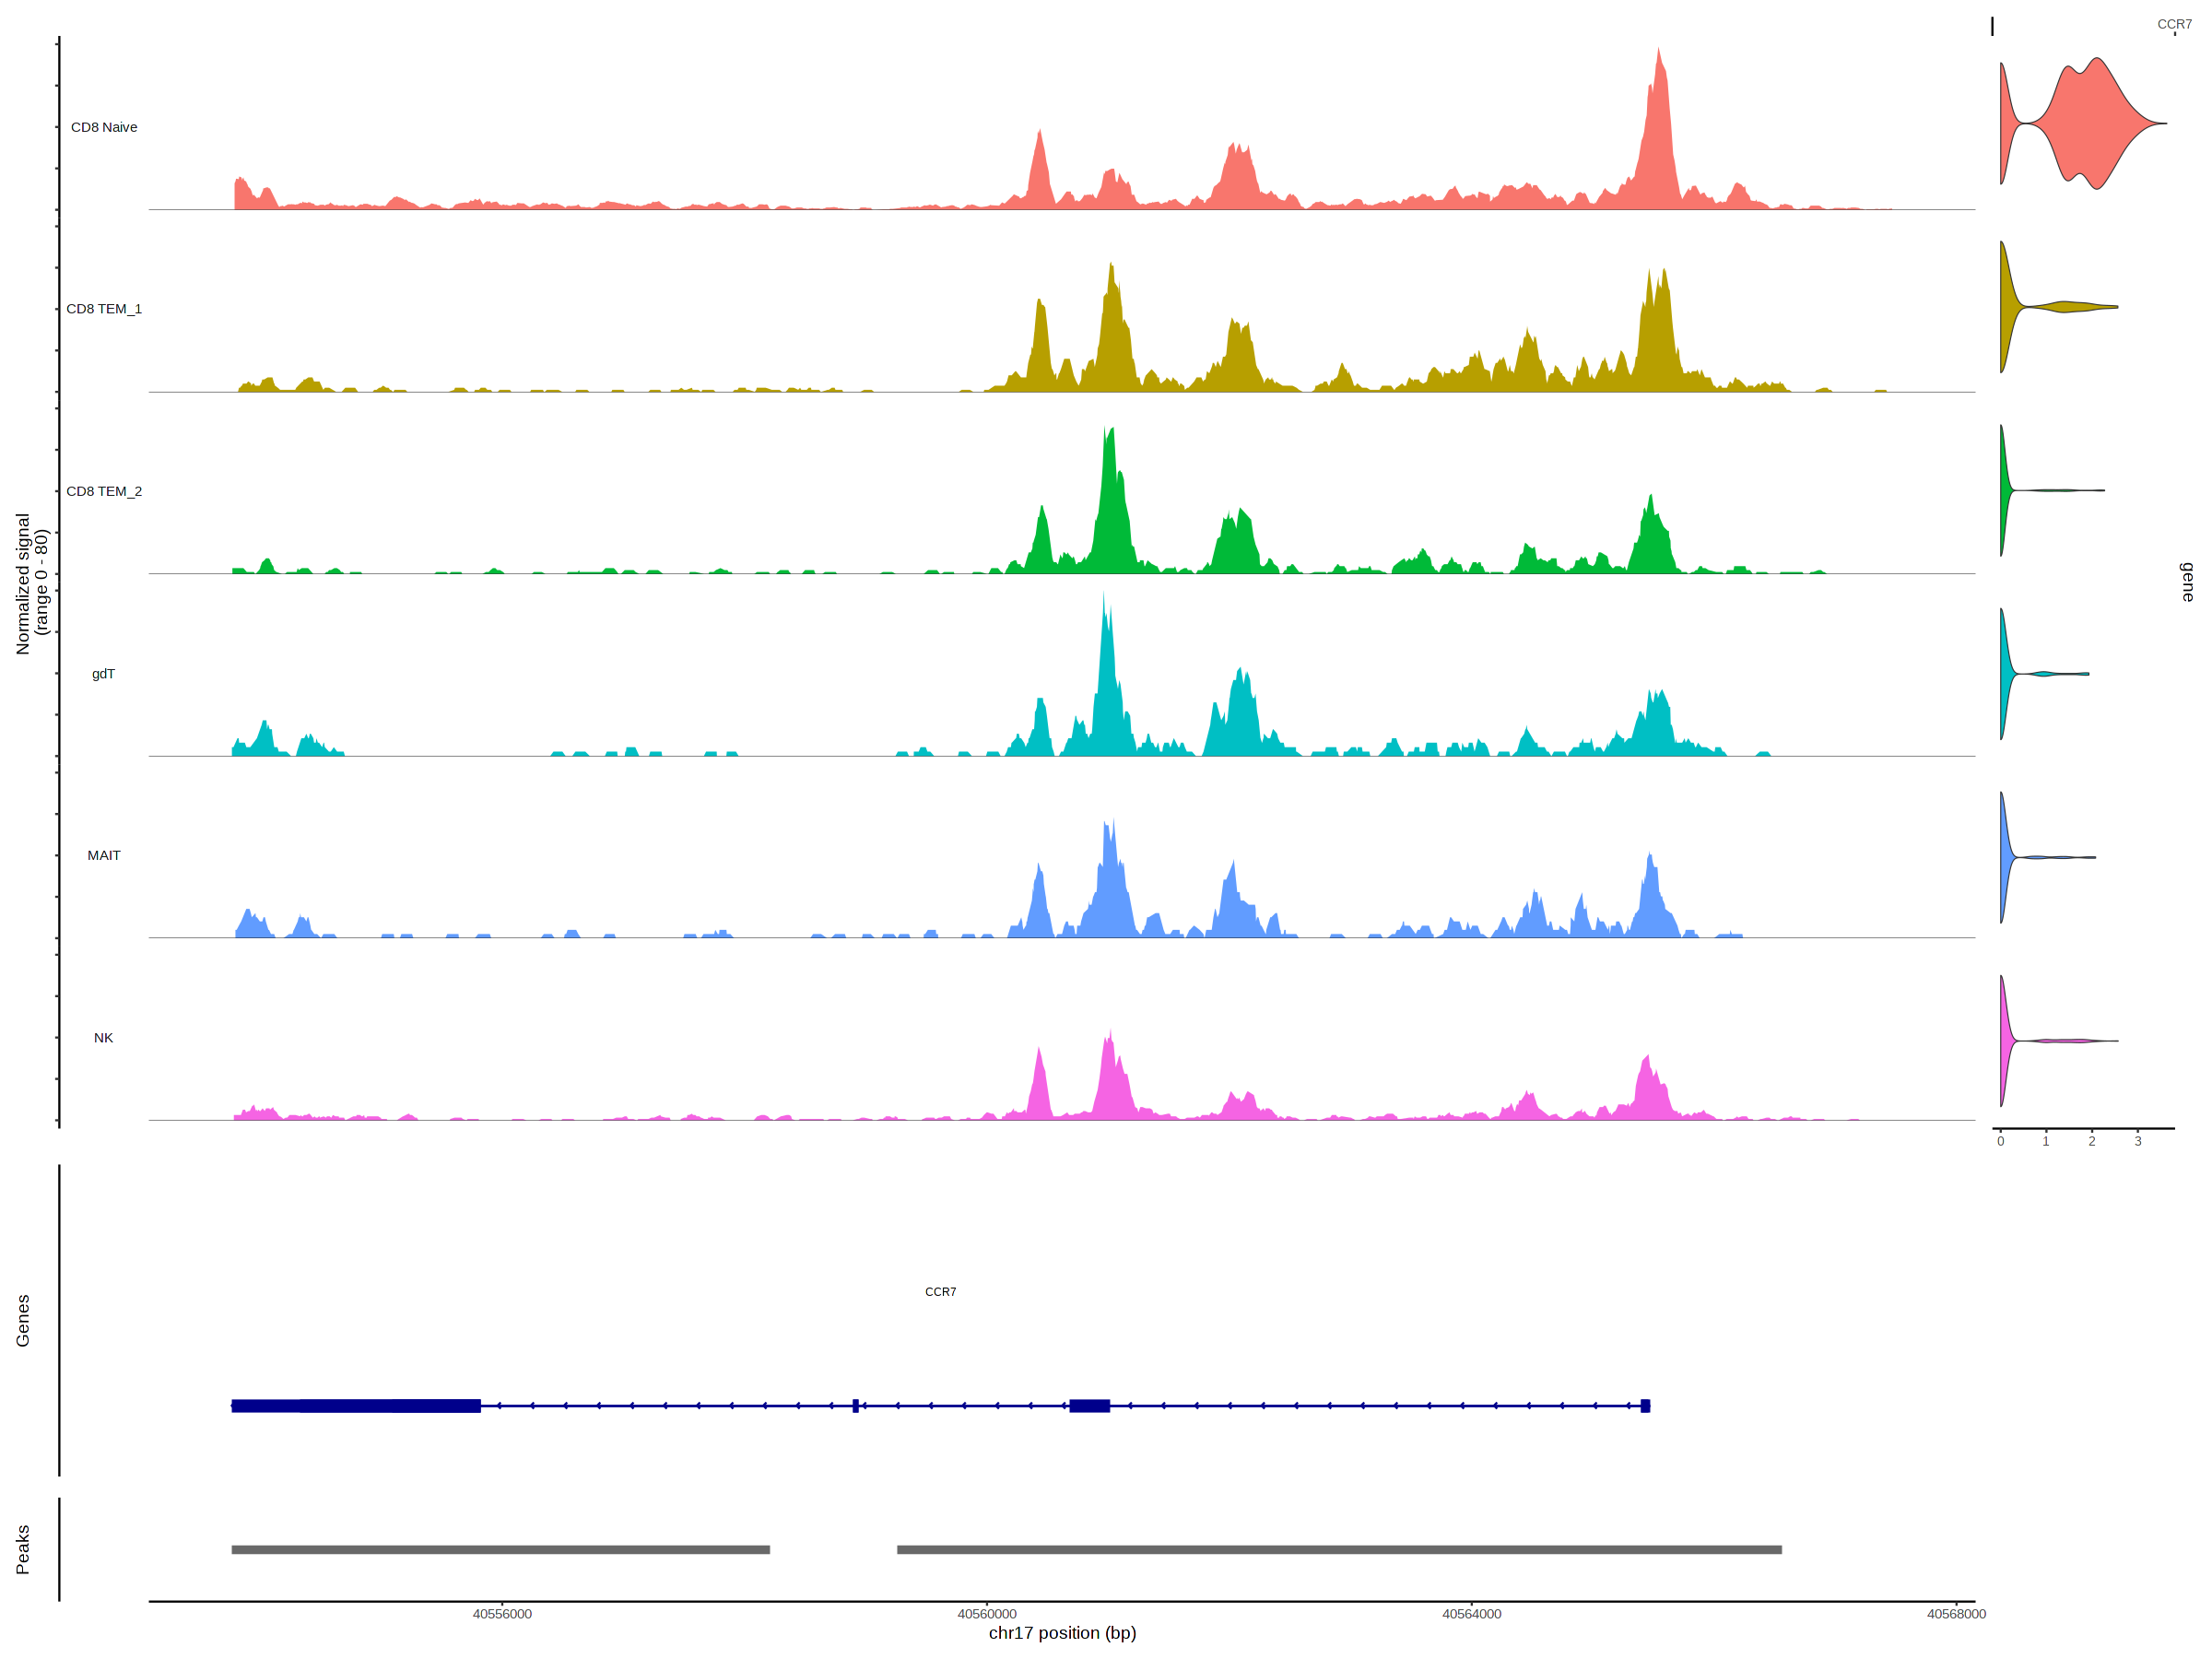

In [78]:
# Plot showing gene expression along with the accessibility of a specific gene region
pbmc <- pbmc.atac
pbmc[["RNA"]] <- pbmc.rna@assays$RNA
pbmc@active.ident <- factor(pbmc$seurat_annotations)
CoveragePlot(
  object = pbmc,
  region = "CCR7",
  features = "CCR7",
  expression.assay = "RNA",
  extend.downstream=2000
)

# 3. Pseudo-Time

In [88]:
start_time = Sys.time()

**Pseudo-time** <br>
- Pseudotime is an abstract metric used to <u>quantify the progression of individual cells</u> through a biological process, such as cell differentiation.
- It represents the <u>distance of a cell along a trajectory from a starting point,</u> measured in terms of transcriptional changes.
- Pseudotime allows for the analysis of <u>cellular dynamics and regulatory changes</u> in processes where cells do not progress synchronously, providing insights into the sequence of gene expression changes as cells transition from one state to another.



<img src = "https://drive.google.com/uc?id=1kl_2Smhpyps28LfrCzUrRRJ00d4nBneS" height=300 width=450>

https://cole-trapnell-lab.github.io/monocle3/
- Clustering, classifying, and counting cells. Single-cell RNA-Seq experiments allow you to discover new (and possibly rare) subtypes of cells. Monocle 3 helps you identify them.
- <u>Constructing single-cell trajectories.</u> In development, disease, and throughout life, cells transition from one state to another. Monocle 3 helps you discover these transitions.
- Differential expression analysis. Characterizing new cell types and states begins with comparisons to other, better understood cells. Monocle 3 includes a sophisticated, but easy-to-use system for differential expression.



In [89]:
coembed

An object of class Seurat 
146213 features across 5684 samples within 3 assays 
Active assay: RNA (36601 features, 2000 variable features)
 2 layers present: data, scale.data
 2 other assays present: ATAC, ACTIVITY
 2 dimensional reductions calculated: pca, umap

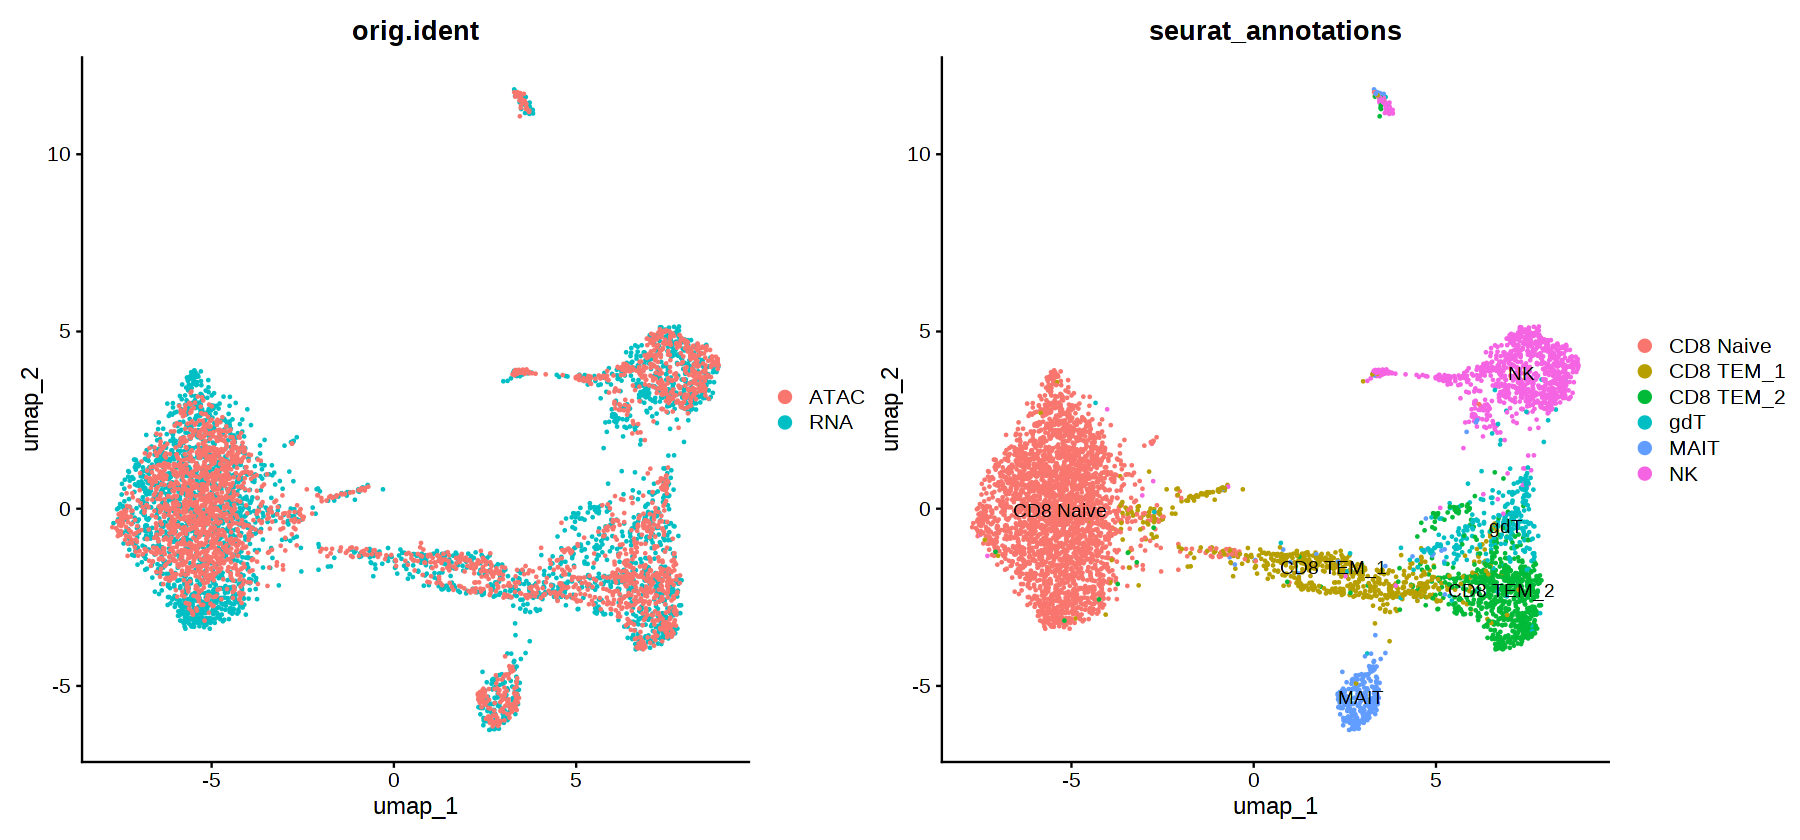

In [90]:
options(repr.plot.width=15, repr.plot.height=7)
p1 <- DimPlot(coembed, group.by = "orig.ident",label=F)
p2 <- DimPlot(coembed, group.by = "seurat_annotations",label=T)
p1+p2

In [91]:
# Convert the Seurat object to a CellDataSet object
cds_coembed <- as.cell_data_set(coembed)
cds_coembed

Warning message:
"Layer 'counts' is empty"


class: cell_data_set 
dim: 36601 5684 
metadata(0):
assays(2): logcounts counts
rownames(36601): MIR1302-2HG FAM138A ... AC007325.4 AC007325.2
rowData names(0):
colnames(5684): AAACAGCCACCAACCG-1_1 AAACAGCCAGTAGGTG-1_1 ...
  TTTGTTGGTTAGGATT-1_2 TTTGTTGGTTTGCAGA-1_2
colData names(25): orig.ident nCount_RNA ... ident Size_Factor
reducedDimNames(2): PCA UMAP
mainExpName: RNA
altExpNames(0):

No trajectory to plot. Has learn_graph() been called yet?



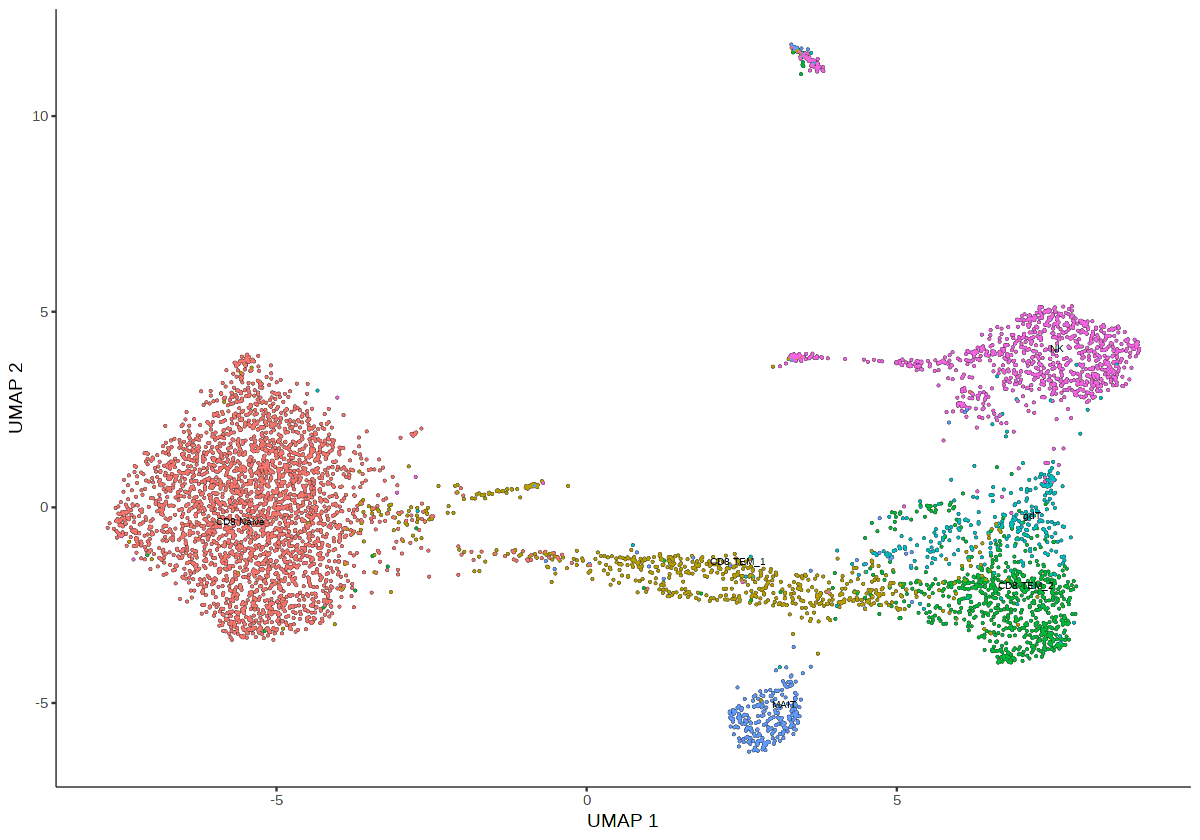

In [92]:
options(repr.plot.width=10, repr.plot.height=7)
plot_cells(cds_coembed, color_cells_by="seurat_annotations")

In [93]:
# Cluster cells, learn the trajectory graph, and order cells specifying a root cell
cds_coembed <- cluster_cells(cds_coembed)
cds_coembed <- learn_graph(cds_coembed)
cds_coembed <- order_cells(cds_coembed,root_cells="CGAAGCCTCATGTTTC-1_1") # CD8 Naive cell

  |======================================================================| 100%


Warning message:
"ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


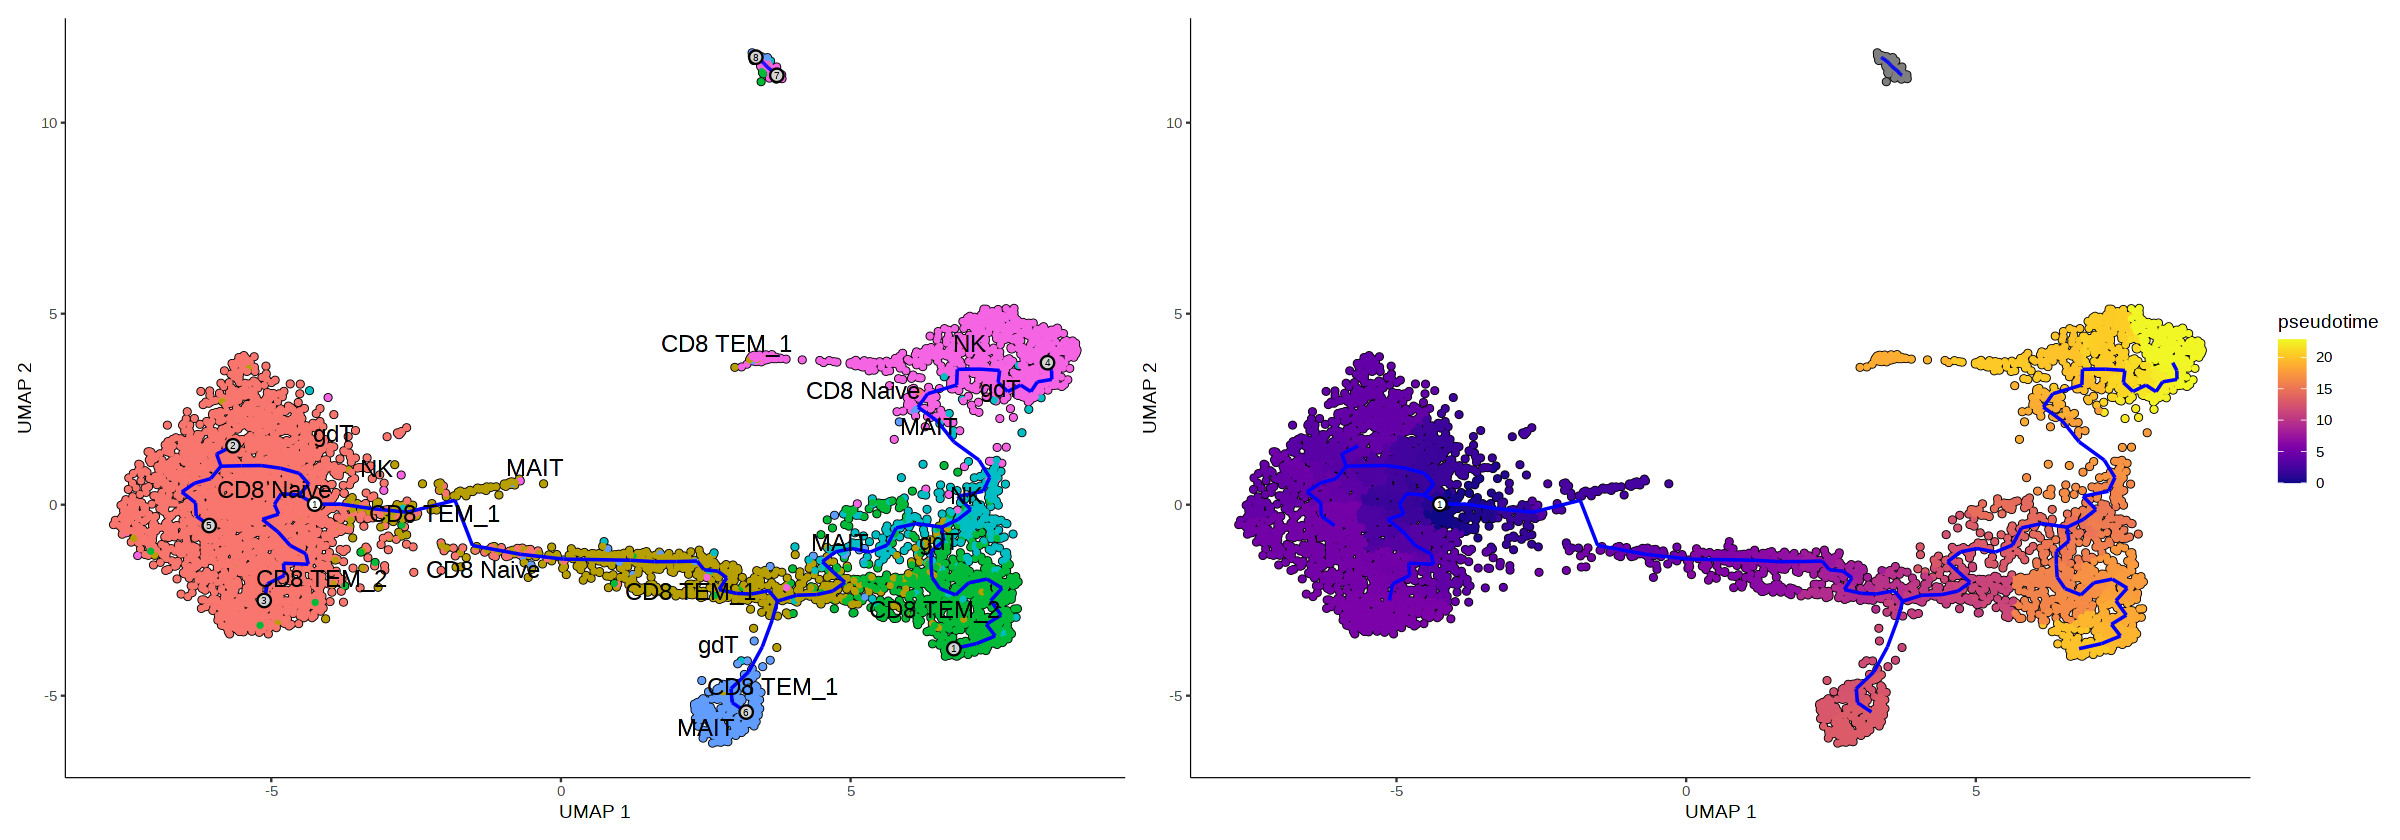

In [94]:
options(repr.plot.width=20, repr.plot.height=7)
p1 <- plot_cells(cds_coembed, color_cells_by = "seurat_annotations",group_label_size = 5,labels_per_group = "seurat_annotations",cell_size = 1,trajectory_graph_color = "BLUE",label_branch_points = FALSE,label_principal_points = FALSE)
p2 <- plot_cells(cds_coembed, color_cells_by = "pseudotime",cell_size = 1,trajectory_graph_color = "blue",label_cell_groups = FALSE, label_leaves = FALSE, label_branch_points = FALSE)
p1+p2

- 선택된 root로부터 도달할 수 없는 일부 cell들은 회색으로 표시되고, pseudo-time은 infinite 값을 가지게 된다.

In [95]:
# Create a data frame including pseudo-time
pseudo_coembed <- cds_coembed@principal_graph_aux$UMAP$pseudotime
annotation_coembed=data.frame(seurat_annotations=coembed$seurat_annotations,cell_id=colnames(coembed),orig.ident=coembed$orig.ident)
pseudoDF_coembed <- data.frame(cell_id = names(pseudo_coembed),pseudo = as.numeric(pseudo_coembed))
pseudoDF_coembed <- merge(pseudoDF_coembed,annotation_coembed,by="cell_id")
pseudoDF_coembed <- pseudoDF_coembed[order(pseudoDF_coembed$pseudo),]
pseudoDF_coembed <- pseudoDF_coembed[!is.infinite(pseudoDF_coembed$pseudo),] # Remove cells with an Infinite pseudo-time value
pseudoDF_coembed$Index <- 1:nrow(pseudoDF_coembed)
dim(pseudoDF_coembed);head(pseudoDF_coembed)
write.csv(pseudoDF_coembed,paste0(output_dir,"pseudoDF_coembed.csv"),quote=F,row.names=F)

[1] 5604    5

cell_id              pseudo      seurat_annotations orig.ident Index
1985 CGAATCTAGCACCACA-1_1 0.000000000 CD8 Naive          RNA        1    
5192 TGTCAGTAGGCGGGTA-1_2 0.002581329 CD8 Naive          ATAC       2    
495  ACGAGTAAGTGGCGGA-1_1 0.018144019 CD8 Naive          RNA        3    
3261 GCGATTAGTGCAACTA-1_1 0.020076180 CD8 Naive          RNA        4    
447  ACCCGTAAGGCGTAAA-1_1 0.024065596 CD8 Naive          RNA        5    
1403 CAAGTATGTTTGGCGG-1_1 0.024066074 CD8 Naive          RNA        6

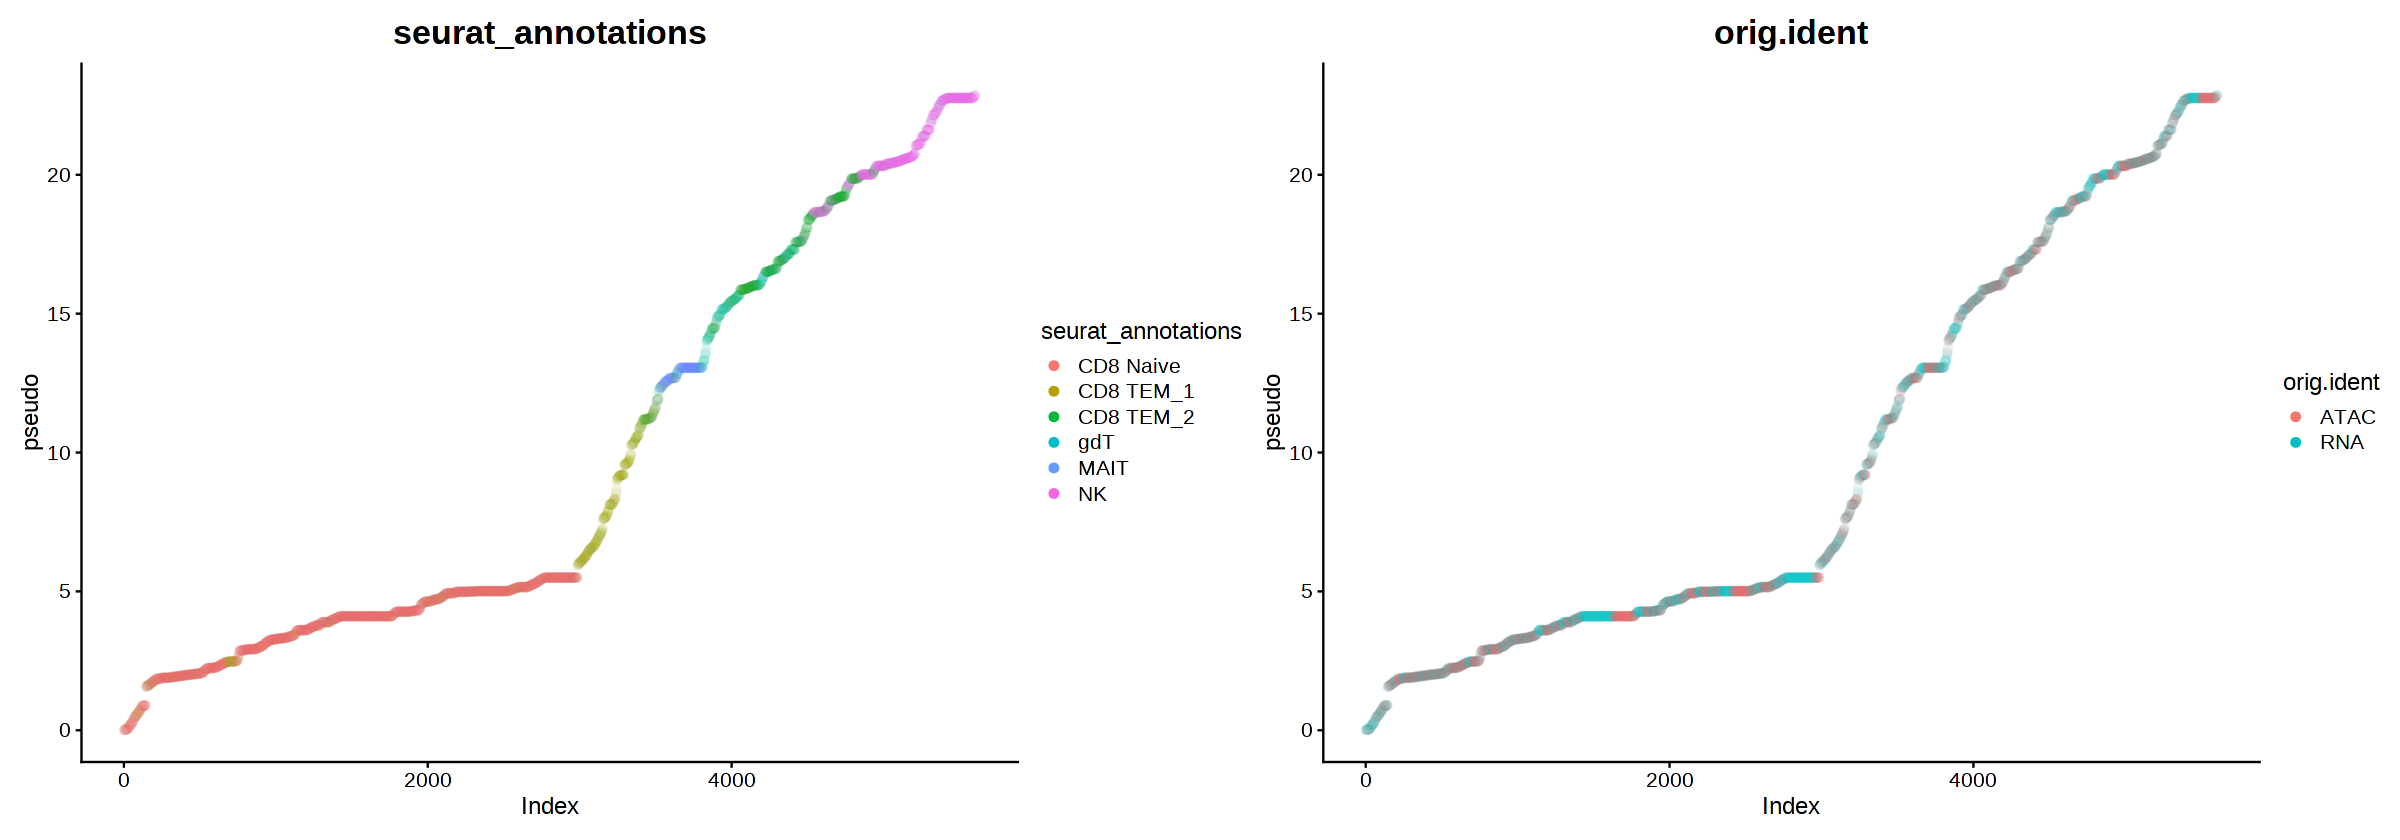

In [96]:
# Annotation of cell type and origin.ident of cells according to pseudo-time
p1 <- ggplot(data = pseudoDF_coembed, aes(x=Index,y=pseudo,colour=seurat_annotations)) +
  geom_point(size=2,alpha=0.03) + ggtitle("seurat_annotations")+
  guides(colour = guide_legend(override.aes = list(alpha = 1)))+
  theme_cowplot()+
  theme(plot.title = element_text(face="bold",size=20,hjust = 0.5))
p2 <- ggplot(data = pseudoDF_coembed, aes(x=Index,y=pseudo,colour=orig.ident)) +
  geom_point(size=2,alpha=0.03) + ggtitle("orig.ident")+
  guides(colour = guide_legend(override.aes = list(alpha = 1)))+
  theme_cowplot()+
  theme(plot.title = element_text(face="bold",size=20,hjust = 0.5))
p1+p2

In [97]:
end_time = Sys.time()
print(end_time-start_time)

Time difference of 46.99967 secs


# TENETPLUS workflow

<img src = "https://drive.google.com/uc?id=1rkYfy46svnVeJfq_5ZZkcicu1obMYviB" height = 650 width = 2500>



In [ ]:
source("/content/TENETPLUS/function_for_tenetplus/function_for_tenet.R")

[1] "functions_for_TENET_attached_ver.2024.02.21"



Attaching package: 'igraph'


The following objects are masked from 'package:rtracklayer':

    blocks, path


The following object is masked from 'package:BiocIO':

    path


The following object is masked from 'package:Biostrings':

    union


The following object is masked from 'package:XVector':

    path


The following object is masked from 'package:monocle3':

    clusters


The following objects are masked from 'package:lubridate':

    %--%, union


The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union


The following objects are masked from 'package:purrr':

    compose, simplify


The following object is masked from 'package:tidyr':

    crossing


The following object is masked from 'package:tibble':

    as_data_frame


The following object is masked from 'package:GenomicRanges':

    union


The following object is masked from 'package:IRanges':

    union


The following object is masked from 'package:S4Vectors':

    union


The fol

In [ ]:
source("/content/TENETPLUS/function_for_tenetplus/RPlot.R")

In [ ]:
library(igraph)
library(gridExtra)


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:Biobase':

    combine


The following object is masked from 'package:BiocGenerics':

    combine




# Make TENETPLUS INPUT

<img src = "https://drive.google.com/uc?id=1TgjeFAxvwEUpznzp8rBLOJCDf9zL74o6" height = 225 width = 600>

## 3.1 Make Merged Matrix

In [ ]:
pbmc.rna

An object of class Seurat 
36601 features across 2842 samples within 1 assay 
Active assay: RNA (36601 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

In [ ]:
pbmc.atac

An object of class Seurat 
111612 features across 2842 samples within 3 assays 
Active assay: ATAC (108377 features, 108377 variable features)
 2 layers present: counts, data
 2 other assays present: ACTIVITY, RNA
 2 dimensional reductions calculated: lsi, umap.atac

In [ ]:
deg_list <- unique(deg_sub$gene)
length(deg_list)
dar_list <- unique(dar_sub$gene)
length(dar_list)

[1] 1514

[1] 2636

In [ ]:
exprMat_RNA=t(pbmc.rna[["RNA"]]$counts[deg_list,])
dim(exprMat_RNA);exprMat_RNA[1:3,1:3]

[1] 2842 1514

3 x 3 sparse Matrix of class "dgCMatrix"
                   CCL5 NKG7 LEF1
AAACAGCCACCAACCG-1    .    .    4
AAACAGCCAGTAGGTG-1    4    .   14
AAACATGCAAGGTCCT-1    .    .    2

In [ ]:
exprMat_ATAC=t(pbmc.atac[["ATAC"]]$counts[dar_list,])
dim(exprMat_ATAC);exprMat_ATAC[1:3,1:3]

[1] 2842 2636

3 x 3 sparse Matrix of class "dgCMatrix"
                   chr2-144507361-144525092 chr3-4975862-4990757
AAACAGCCACCAACCG-1                        .                    .
AAACAGCCAGTAGGTG-1                        2                    4
AAACATGCAAGGTCCT-1                        .                    2
                   chr2-241762278-241764383
AAACAGCCACCAACCG-1                        .
AAACAGCCAGTAGGTG-1                        .
AAACATGCAAGGTCCT-1                        .

In [ ]:
exprMat_Merged=cbind(exprMat_RNA,exprMat_ATAC)
dim(exprMat_Merged);exprMat_Merged[1:3,1:3]

[1] 2842 4150

3 x 3 sparse Matrix of class "dgCMatrix"
                   CCL5 NKG7 LEF1
AAACAGCCACCAACCG-1    .    .    4
AAACAGCCAGTAGGTG-1    4    .   14
AAACATGCAAGGTCCT-1    .    .    2

In [ ]:
write.csv(as.data.frame(exprMat_RNA),paste0(output_dir,"ExprMatRNA_Counts_DEG.csv"),quote = F,row.names = T)
write.csv(as.data.frame(exprMat_ATAC),paste0(output_dir,"ExprMatATAC_Counts_DAR.csv"),quote = F,row.names = T)
write.csv(as.data.frame(exprMat_Merged),paste0(output_dir,"ExprMatMerged_Counts_DEGDAR.csv"),quote = F,row.names = T)

## 3.2 Make Pseudotime & cellselect

In [ ]:
pseudoDF_rna <- pseudoDF_coembed[pseudoDF_coembed$orig.ident == "RNA",]
dim(pseudoDF_rna);head(pseudoDF_rna)

[1] 2800    5

cell_id              pseudo     seurat_annotations orig.ident Index
1985 CGAATCTAGCACCACA-1_1 0.00000000 CD8 Naive          RNA        1    
495  ACGAGTAAGTGGCGGA-1_1 0.01814402 CD8 Naive          RNA        3    
3261 GCGATTAGTGCAACTA-1_1 0.02007618 CD8 Naive          RNA        4    
447  ACCCGTAAGGCGTAAA-1_1 0.02406560 CD8 Naive          RNA        5    
1403 CAAGTATGTTTGGCGG-1_1 0.02406607 CD8 Naive          RNA        6    
1971 CGAAGCCTCATGTTTC-1_1 0.02406655 CD8 Naive          RNA        7

In [ ]:
cellselect <- data.frame(cell_id=colnames(coembed)[coembed$orig.ident=="RNA"])
cellselect <- merge(cellselect,pseudoDF_rna,by="cell_id",all.x=TRUE)
dim(cellselect);head(cellselect)

[1] 2842    5

cell_id              pseudo    seurat_annotations orig.ident Index
1 AAACAGCCACCAACCG-1_1  3.282164 CD8 Naive          RNA        1000 
2 AAACAGCCAGTAGGTG-1_1  1.910758 CD8 Naive          RNA         316 
3 AAACATGCAAGGTCCT-1_1  3.214890 CD8 Naive          RNA         955 
4 AAACATGCACCGGCTA-1_1 19.796222 NK                 RNA        4785 
5 AAACATGCAGGGAGCT-1_1 22.007610 NK                 RNA        5316 
6 AAACCGAAGTGAGCAA-1_1 19.725899 NK                 RNA        4781

In [ ]:
table(is.na(cellselect$pseudo))


FALSE  TRUE 
 2800    42 

In [ ]:
cellselect$cell_select<- ifelse(!is.na(cellselect$pseudo),1,0)

In [ ]:
table(cellselect$cell_select)
head(cellselect)


   0    1 
  42 2800 

cell_id              pseudo    seurat_annotations orig.ident Index
1 AAACAGCCACCAACCG-1_1  3.282164 CD8 Naive          RNA        1000 
2 AAACAGCCAGTAGGTG-1_1  1.910758 CD8 Naive          RNA         316 
3 AAACATGCAAGGTCCT-1_1  3.214890 CD8 Naive          RNA         955 
4 AAACATGCACCGGCTA-1_1 19.796222 NK                 RNA        4785 
5 AAACATGCAGGGAGCT-1_1 22.007610 NK                 RNA        5316 
6 AAACCGAAGTGAGCAA-1_1 19.725899 NK                 RNA        4781 
  cell_select
1 1          
2 1          
3 1          
4 1          
5 1          
6 1

In [ ]:
write.table(cellselect$pseudo,paste0(output_dir,"Tenet_pseudo.txt"),row.names = F,col.names = F,quote = F)
write.table(cellselect$cell_select,paste0(output_dir,"Tenet_cellselect.txt"),row.names = F,col.names = F,quote = F)

## 3.2.1 Random cell select

In [ ]:
set.seed(123) # 결과 재현을 위한 시드 설정
# 기준열이 NA가 아닌 행 인덱스 찾기
not_na_indices <- which(!is.na(cellselect$pseudo))

# NA가 아닌 행 중에서 100개의 인덱스를 무작위로 선택하여 1로 설정
selected_indices <- sample(not_na_indices, 100, replace = FALSE)

# 모든 행을 0으로 초기화
cellselect$randmom <- 0

# 선택된 인덱스의 값열을 1로 설정
cellselect$randmom[selected_indices] <- 1

# 결과 확인
table(cellselect$randmom)


   0    1 
2742  100 

In [ ]:
write.table(cellselect$randmom,paste0(output_dir,"Tenet_cellselect_random.txt"),row.names = F,col.names = F,quote = F)

#TENET INPUT 살펴보기

<img src = "https://drive.google.com/uc?id=1TgjeFAxvwEUpznzp8rBLOJCDf9zL74o6" height = 225 width = 600>

## 4.1 Cell * Gene matrix

In [ ]:
cat(system(paste0("cat ",output_dir,"/ExprMatRNA_Counts_DEG.csv | head | cut -d',' -f1-10"),intern = TRUE),sep="\n")
system(paste0("wc -l ",output_dir,"/ExprMatRNA_Counts_DEG.csv"), intern = T)
system(paste0("awk -F, '{print NF; exit}' ",output_dir,"/ExprMatRNA_Counts_DEG.csv"), intern = T)

,CCL5,NKG7,LEF1,GZMA,MYO1F,CCR7,PDE3B,BACH2,GNLY
AAACAGCCACCAACCG-1,0,0,4,0,0,5,7,7,2
AAACAGCCAGTAGGTG-1,4,0,14,0,0,3,8,20,0
AAACATGCAAGGTCCT-1,0,0,2,0,1,1,2,7,0
AAACATGCACCGGCTA-1,1,2,0,0,1,0,0,0,8
AAACATGCAGGGAGCT-1,18,13,0,3,5,0,0,0,25
AAACCGAAGTGAGCAA-1,0,0,0,2,3,0,0,0,2
AAACCGAAGTTGCGTG-1,0,0,4,0,0,1,0,7,1
AAACCGGCACATTAAC-1,1,11,8,7,4,0,2,2,67
AAACGGATCATGGCTG-1,5,0,2,0,1,2,1,4,0


[1] "2843 /content/drive/MyDrive/Output_CD8//ExprMatRNA_Counts_DEG.csv"

[1] "1515"

## 4.2 Cell * peak matrix

In [ ]:
cat(system(paste0("cat ",output_dir,"/ExprMatATAC_Counts_DAR.csv | head | cut -d',' -f1-10"),intern = TRUE),sep="\n")
system(paste0("wc -l ",output_dir,"/ExprMatATAC_Counts_DAR.csv"), intern = T)
system(paste0("awk -F, '{print NF; exit}' ",output_dir,"/ExprMatATAC_Counts_DAR.csv"), intern = T)

,chr2-144507361-144525092,chr3-4975862-4990757,chr2-241762278-241764383,chr15-39623205-39625650,chr17-83076201-83103570,chr4-7646207-7655858,chr1-184386243-184389335,chr2-231425358-231427497,chr12-128793786-128797923
AAACAGCCACCAACCG-1,0,0,0,0,0,0,2,0,0
AAACAGCCAGTAGGTG-1,2,4,0,0,2,0,0,0,0
AAACATGCAAGGTCCT-1,0,2,0,0,0,0,0,0,0
AAACATGCACCGGCTA-1,10,14,6,0,10,2,2,0,6
AAACATGCAGGGAGCT-1,6,12,0,2,10,2,8,4,2
AAACCGAAGTGAGCAA-1,6,8,4,2,18,2,4,0,0
AAACCGAAGTTGCGTG-1,0,0,0,0,2,0,0,0,0
AAACCGGCACATTAAC-1,16,12,0,4,24,6,4,0,12
AAACGGATCATGGCTG-1,0,2,2,2,18,2,0,0,0


[1] "2843 /content/drive/MyDrive/Output_CD8//ExprMatATAC_Counts_DAR.csv"

[1] "2637"

## 4.3 Cell * Gene + Peak matrix

In [ ]:
cat(system(paste0("cat ",output_dir,"/ExprMatMerged_Counts_DEGDAR.csv| head | csvcut -c 1,1510-1520"),intern = TRUE),sep="\n")

,C4orf3,BANF1,SBK1,COMMD7,RTN4,ANAPC11,chr2-144507361-144525092,chr3-4975862-4990757,chr2-241762278-241764383,chr15-39623205-39625650,chr17-83076201-83103570
AAACAGCCACCAACCG-1,2,0,0,0,2,0,0,0,0,0,0
AAACAGCCAGTAGGTG-1,0,0,0,0,2,0,2,4,0,0,2
AAACATGCAAGGTCCT-1,1,1,0,1,2,0,0,2,0,0,0
AAACATGCACCGGCTA-1,0,0,0,0,1,0,10,14,6,0,10
AAACATGCAGGGAGCT-1,0,0,3,0,0,0,6,12,0,2,10
AAACCGAAGTGAGCAA-1,0,0,0,0,0,0,6,8,4,2,18
AAACCGAAGTTGCGTG-1,0,0,0,0,0,0,0,0,0,0,2
AAACCGGCACATTAAC-1,1,1,1,0,2,0,16,12,0,4,24
AAACGGATCATGGCTG-1,0,0,1,0,1,0,0,2,2,2,18


## 4.4 PseudoTime data file

In [ ]:
cat(system(paste0("cat ",output_dir,"/Tenet_pseudo.txt | head "),intern = TRUE),sep="\n")

3.2821644736165
1.91075803683668
3.21489013512227
19.796221974612
22.0076099755928
19.7258988634925
4.98727143264069
18.6884555683188
4.69613587346554
5.49733780326434


## 4.5 Cell select file

In [ ]:
cat(system(paste0("cat ",output_dir,"/Tenet_cellselect.txt | head "),intern = TRUE),sep="\n")
cat(system(paste0("grep 1 ",output_dir,"/Tenet_cellselect.txt | wc -l "),intern = TRUE),sep="\n")
cat(system(paste0("grep 1 ",output_dir,"/Tenet_cellselect_random.txt | wc -l "),intern = TRUE),sep="\n")

1
1
1
1
1
1
1
1
1
1
2800
100


# Running a TENETPLUS

TENETPLUS는 리눅스 시스템에서 python & bash 파일로 이루어져 있습니다. 예제에서 제작한 INPUT 데이터의 크기 문제로 해당 데이터를 사용한 TENETPLUS OUTPUT 파일을 제공하여 실습을 진행하겠습니다.

In [ ]:
# !git clone https://github.com/hg0426/TENETPLUS.git

In [ ]:
setwd("/content/TENETPLUS/")

In [ ]:
system(paste0("cp ",output_dir,"*.csv ./"),intern = T)
system(paste0("cp ",output_dir,"*.txt ./"),intern = T)

character(0)

character(0)

In [ ]:
system("rm TE_peak_list.txt",intern=T)

character(0)

In [ ]:
cat(system("./TENET_Plus_single ExprMatMerged_Counts_DEGDAR.csv 1 Tenet_pseudo.txt Tenet_cellselect_random.txt 1 human 1",intern = T),sep="\n")

Starting TENET_Plus_single
--- Make TE_peak_list.txt from input Matrix--- 
--- Matrix processing, as cell_select_file does not contain only 1 ---
2842
2842
---matrix process time : 1.518155813217163 seconds ---
Preprocessing(TENET_Plus)
---Preprocess time : 1.1520414352416992 seconds ---
2024-11-21 03:09:09.655227
2024-11-21 03:11:03.462955
2024-11-21 03:12:57.673115
Split Matrix for TENET_Plus(rowPeak_colGN)
  4151 TE_Matrix.sort.tmp
  2635 TE_peak_list.comm.tmp
  2635 TE_peak_list.sort.tmp
  9421 total
1516
1516 2500 0
0
1516
Split Matrix rowTF
 4151 TE_Matrix.sort.tmp
   95 TFs.comm.tmp
  975 TFs.sort.tmp
 5221 total
Split Matrix colGN
1516
1516 2500 0
0
1516
Split Matrix colPK
2635
2635 2500 1
0
1
2636


In [ ]:
cat(system("cat /content/TENETPLUS/TE_result_matrix.txt| head",intern = TRUE),sep="\n")

TE	CCL5	NKG7	LEF1	GZMA	MYO1F	CCR7	PDE3B	BACH2	GNLY	FOXP1	SERINC5	PYHIN1	ZEB2	PRF1	CST7	KLRD1	MAML2	TGFBR3	NELL2	PRKCA	RAP1GAP2	OXNAD1	A2M	S100A4	CAMK4	ACTN1	PPP2R2B	MYBL1	PLEK	MCTP2	GZMH	VAV3	NDFIP1	SYNE1	CLIC1	PLCB1	EFHD2	SYNE2	CD99	TRABD2A	KLF6	PZP	TCF7	SELL	PFN1	JAZF1	ABLIM1	AHNAK	CCL4	SAMD3	ATXN1	FGFBP2	KLRG1	ADGRG1	ACTN4	PIK3IP1	TOX	UTRN	PTGDR	SPON2	GZMB	HOPX	FCRL6	ARL4C	NRCAM	PDGFD	FLNA	SNED1	ACTB	ARAP2	IQGAP2	LDHB	IL7R	DNAJC1	RPL11	ITGAL	TGFBR2	RASGRF2	C1orf21	NR3C2	EEF1G	ATP2B4	TRGC2	SARAF	IL2RB	RCAN3	MBP	LINC00299	PTPRK	SRGN	IFITM2	KLRF1	LPCAT1	ITGB2	FCGR3A	THEMIS	CD8B	LPP	TBX21	RABGAP1L	BCL11B	EEF1A1	CTSW	AOAH	RETREG1	KLRB1	PSMA1	CX3CR1	CTSC	PDE7A	FKBP5	RPS27A	AUTS2	CYBA	ARHGAP26	MATK	FHIT	PCSK5	IL6ST	APOBEC3G	NOSIP	CYTOR	TTC38	SH3BGRL3	CD55	MAL	LEPROTL1	FAM102A	NIBAN1	IGF1R	FAM117B	CTBP2	ITGB1	ANXA1	PAM	NCALD	FOXO1	TXK	ZBTB16	ITGAM	ITK	LTB	STK39	ANXA2	ADGRG5	LDLRAP1	ITGA6	LRRN3	PRKN	LYN	MLLT3	SLCO3A1	LAIR2	AGAP1	DOK2	APBA2	CD300A	PRR5L	TRDC	CHST11	SLAMF7	CA6	RPS6	FYN	RPS5	HL

In [ ]:
cat(system("cat /content/TENETPLUS/TE_result_matrix_rowPeak_colGN.txt| head",intern = TRUE),sep="\n")

TE	CCL5	NKG7	LEF1	GZMA	MYO1F	CCR7	PDE3B	BACH2	GNLY	FOXP1	SERINC5	PYHIN1	ZEB2	PRF1	CST7	KLRD1	MAML2	TGFBR3	NELL2	PRKCA	RAP1GAP2	OXNAD1	A2M	S100A4	CAMK4	ACTN1	PPP2R2B	MYBL1	PLEK	MCTP2	GZMH	VAV3	NDFIP1	SYNE1	CLIC1	PLCB1	EFHD2	SYNE2	CD99	TRABD2A	KLF6	PZP	TCF7	SELL	PFN1	JAZF1	ABLIM1	AHNAK	CCL4	SAMD3	ATXN1	FGFBP2	KLRG1	ADGRG1	ACTN4	PIK3IP1	TOX	UTRN	PTGDR	SPON2	GZMB	HOPX	FCRL6	ARL4C	NRCAM	PDGFD	FLNA	SNED1	ACTB	ARAP2	IQGAP2	LDHB	IL7R	DNAJC1	RPL11	ITGAL	TGFBR2	RASGRF2	C1orf21	NR3C2	EEF1G	ATP2B4	TRGC2	SARAF	IL2RB	RCAN3	MBP	LINC00299	PTPRK	SRGN	IFITM2	KLRF1	LPCAT1	ITGB2	FCGR3A	THEMIS	CD8B	LPP	TBX21	RABGAP1L	BCL11B	EEF1A1	CTSW	AOAH	RETREG1	KLRB1	PSMA1	CX3CR1	CTSC	PDE7A	FKBP5	RPS27A	AUTS2	CYBA	ARHGAP26	MATK	FHIT	PCSK5	IL6ST	APOBEC3G	NOSIP	CYTOR	TTC38	SH3BGRL3	CD55	MAL	LEPROTL1	FAM102A	NIBAN1	IGF1R	FAM117B	CTBP2	ITGB1	ANXA1	PAM	NCALD	FOXO1	TXK	ZBTB16	ITGAM	ITK	LTB	STK39	ANXA2	ADGRG5	LDLRAP1	ITGA6	LRRN3	PRKN	LYN	MLLT3	SLCO3A1	LAIR2	AGAP1	DOK2	APBA2	CD300A	PRR5L	TRDC	CHST11	SLAMF7	CA6	RPS6	FYN	RPS5	HL

In [ ]:
# TENETPLUS 는 리눅스 환경에서 다음과 같은 명령어로 실행할 수 있음
# ./TENET_Plus [input matrix] [number of thread] [pseudotime data file] [cell select binary file] [history length] [species] [options]
# options 0: TENET_TF(Only RNA), 1: TENET_Plus(RNA + ATAC) all matrix, 2: TENET_Plus only rowTF colGN, 3: TENET_Plus only rowTF colPK, 4: TENET_Plus only rowPeak(cis-peaksource)
# ex) /TENET_Plus ExprMatMerged_Counts_DEGDAR.csv 16 Tenet_pseudo.txt Tenet_cellselect.txt 1 human 1

# TENET OUTPUT 살펴보기

<img src = "https://drive.google.com/uc?id=1C5buFIZiXbFsqsU9n9P0DAMVuB9F1MuF" height = 450 width = 1200>

## 5.1 TENET result matrix

In [ ]:
cat(system("cat /content/TENET_workshop/TENETPLUS_output/TE_result_matrix.txt| head | cut -d',' -f1-10",intern = TRUE),sep="\n")

TE	CCL5	NKG7	LEF1	GZMA	MYO1F	CCR7	PDE3B	BACH2	GNLY	FOXP1	SERINC5	PYHIN1	ZEB2	PRF1	CST7	KLRD1	MAML2	TGFBR3	NELL2	PRKCA	RAP1GAP2	OXNAD1	A2M	S100A4	CAMK4	ACTN1	PPP2R2B	MYBL1	PLEK	MCTP2	GZMH	VAV3	NDFIP1	SYNE1	CLIC1	PLCB1	EFHD2	SYNE2	CD99	TRABD2A	KLF6	PZP	TCF7	SELL	PFN1	JAZF1	ABLIM1	AHNAK	CCL4	SAMD3	ATXN1	FGFBP2	KLRG1	ADGRG1	ACTN4	PIK3IP1	TOX	UTRN	PTGDR	SPON2	GZMB	HOPX	FCRL6	ARL4C	NRCAM	PDGFD	FLNA	SNED1	ACTB	ARAP2	IQGAP2	LDHB	IL7R	DNAJC1	RPL11	ITGAL	TGFBR2	RASGRF2	C1orf21	NR3C2	EEF1G	ATP2B4	TRGC2	SARAF	IL2RB	RCAN3	MBP	LINC00299	PTPRK	SRGN	IFITM2	KLRF1	LPCAT1	ITGB2	FCGR3A	THEMIS	CD8B	LPP	TBX21	RABGAP1L	BCL11B	EEF1A1	CTSW	AOAH	RETREG1	KLRB1	PSMA1	CX3CR1	CTSC	PDE7A	FKBP5	RPS27A	AUTS2	CYBA	ARHGAP26	MATK	FHIT	PCSK5	IL6ST	APOBEC3G	NOSIP	CYTOR	TTC38	SH3BGRL3	CD55	MAL	LEPROTL1	FAM102A	NIBAN1	IGF1R	FAM117B	CTBP2	ITGB1	ANXA1	PAM	NCALD	FOXO1	TXK	ZBTB16	ITGAM	ITK	LTB	STK39	ANXA2	ADGRG5	LDLRAP1	ITGA6	LRRN3	PRKN	LYN	MLLT3	SLCO3A1	LAIR2	AGAP1	DOK2	APBA2	CD300A	PRR5L	TRDC	CHST11	SLAMF7	CA6	RPS6	FYN	RPS5	HL

## 5.2 TF_Gene matrix ( AB matrix)

In [ ]:
cat(system("cat /content/TENET_workshop/TENETPLUS_output/TE_result_matrix_rowTF_colGN.txt| head | cut -d',' -f1-10",intern = TRUE),sep="\n")

TE	CCL5	NKG7	LEF1	GZMA	MYO1F	CCR7	PDE3B	BACH2	GNLY	FOXP1	SERINC5	PYHIN1	ZEB2	PRF1	CST7	KLRD1	MAML2	TGFBR3	NELL2	PRKCA	RAP1GAP2	OXNAD1	A2M	S100A4	CAMK4	ACTN1	PPP2R2B	MYBL1	PLEK	MCTP2	GZMH	VAV3	NDFIP1	SYNE1	CLIC1	PLCB1	EFHD2	SYNE2	CD99	TRABD2A	KLF6	PZP	TCF7	SELL	PFN1	JAZF1	ABLIM1	AHNAK	CCL4	SAMD3	ATXN1	FGFBP2	KLRG1	ADGRG1	ACTN4	PIK3IP1	TOX	UTRN	PTGDR	SPON2	GZMB	HOPX	FCRL6	ARL4C	NRCAM	PDGFD	FLNA	SNED1	ACTB	ARAP2	IQGAP2	LDHB	IL7R	DNAJC1	RPL11	ITGAL	TGFBR2	RASGRF2	C1orf21	NR3C2	EEF1G	ATP2B4	TRGC2	SARAF	IL2RB	RCAN3	MBP	LINC00299	PTPRK	SRGN	IFITM2	KLRF1	LPCAT1	ITGB2	FCGR3A	THEMIS	CD8B	LPP	TBX21	RABGAP1L	BCL11B	EEF1A1	CTSW	AOAH	RETREG1	KLRB1	PSMA1	CX3CR1	CTSC	PDE7A	FKBP5	RPS27A	AUTS2	CYBA	ARHGAP26	MATK	FHIT	PCSK5	IL6ST	APOBEC3G	NOSIP	CYTOR	TTC38	SH3BGRL3	CD55	MAL	LEPROTL1	FAM102A	NIBAN1	IGF1R	FAM117B	CTBP2	ITGB1	ANXA1	PAM	NCALD	FOXO1	TXK	ZBTB16	ITGAM	ITK	LTB	STK39	ANXA2	ADGRG5	LDLRAP1	ITGA6	LRRN3	PRKN	LYN	MLLT3	SLCO3A1	LAIR2	AGAP1	DOK2	APBA2	CD300A	PRR5L	TRDC	CHST11	SLAMF7	CA6	RPS6	FYN	RPS5	HL

## 5.3 TF_Peak matrix ( C matrix)

In [ ]:
cat(system("cat /content/TENET_workshop/TENETPLUS_output/TE_result_matrix_rowTF_colPK.txt| head | cut -d',' -f1-10",intern = TRUE),sep="\n")

TE	chr2-144507361-144525092	chr3-4975862-4990757	chr2-241762278-241764383	chr15-39623205-39625650	chr17-83076201-83103570	chr4-7646207-7655858	chr1-184386243-184389335	chr2-231425358-231427497	chr12-128793786-128797923	chr17-36102944-36108874	chr2-9702594-9704361	chr1-25064443-25066720	chr16-81519063-81525049	chr4-8408924-8410251	chr12-52566432-52567532	chr16-79598130-79602898	chr17-10113073-10116563	chr20-24959541-24961774	chr20-49668291-49670516	chr17-49714498-49716631	chr14-101709778-101714256	chr1-24500773-24509089	chr5-143008297-143010581	chr18-48813329-48816001	chr6-111086765-111089040	chr8-143512019-143522206	chr4-6198055-6202103	chr9-131627294-131630987	chr20-24948563-24956577	chr20-3092185-3095713	chr17-56592385-56597854	chr2-223760720-223762203	chr10-3802576-3812391	chr17-82125073-82129615	chr11-66311352-66319301	chr19-10795858-10798508	chr22-21766280-21767816	chr17-36066202-36067240	chr2-241009318-241012631	chr1-8924588-8928112	chr5-132098937-132104894	chr19-10513768-1051959

## 5.4 Peak_Gene matrix ( GH matrix)

In [ ]:
cat(system("cat /content/TENET_workshop/TENETPLUS_output/TE_result_matrix_rowPeak_colGN.txt| head | cut -d',' -f1-10",intern = TRUE),sep="\n")

TE	CCL5	NKG7	LEF1	GZMA	MYO1F	CCR7	PDE3B	BACH2	GNLY	FOXP1	SERINC5	PYHIN1	ZEB2	PRF1	CST7	KLRD1	MAML2	TGFBR3	NELL2	PRKCA	RAP1GAP2	OXNAD1	A2M	S100A4	CAMK4	ACTN1	PPP2R2B	MYBL1	PLEK	MCTP2	GZMH	VAV3	NDFIP1	SYNE1	CLIC1	PLCB1	EFHD2	SYNE2	CD99	TRABD2A	KLF6	PZP	TCF7	SELL	PFN1	JAZF1	ABLIM1	AHNAK	CCL4	SAMD3	ATXN1	FGFBP2	KLRG1	ADGRG1	ACTN4	PIK3IP1	TOX	UTRN	PTGDR	SPON2	GZMB	HOPX	FCRL6	ARL4C	NRCAM	PDGFD	FLNA	SNED1	ACTB	ARAP2	IQGAP2	LDHB	IL7R	DNAJC1	RPL11	ITGAL	TGFBR2	RASGRF2	C1orf21	NR3C2	EEF1G	ATP2B4	TRGC2	SARAF	IL2RB	RCAN3	MBP	LINC00299	PTPRK	SRGN	IFITM2	KLRF1	LPCAT1	ITGB2	FCGR3A	THEMIS	CD8B	LPP	TBX21	RABGAP1L	BCL11B	EEF1A1	CTSW	AOAH	RETREG1	KLRB1	PSMA1	CX3CR1	CTSC	PDE7A	FKBP5	RPS27A	AUTS2	CYBA	ARHGAP26	MATK	FHIT	PCSK5	IL6ST	APOBEC3G	NOSIP	CYTOR	TTC38	SH3BGRL3	CD55	MAL	LEPROTL1	FAM102A	NIBAN1	IGF1R	FAM117B	CTBP2	ITGB1	ANXA1	PAM	NCALD	FOXO1	TXK	ZBTB16	ITGAM	ITK	LTB	STK39	ANXA2	ADGRG5	LDLRAP1	ITGA6	LRRN3	PRKN	LYN	MLLT3	SLCO3A1	LAIR2	AGAP1	DOK2	APBA2	CD300A	PRR5L	TRDC	CHST11	SLAMF7	CA6	RPS6	FYN	RPS5	HL

# Downstream Analysis


In [ ]:
# 리눅스 환경에서 아래에 있는
#      python make_GRN_new.py [matrix file] [cutoff]
# ex)  python make_GRN_new.py TE_result_matrix.txt 0.01
## 위의 코드를 실행하여 나온 아웃풋 파일을 제공하였음.
# output  [matrix file].fdr[cutoff].sif
# ex)     TE_result_matrix.fdr.0.01.sif

## 6.1 TF_Gene sif

In [ ]:
system(paste0("python /content/TENETPLUS/make_GRN_new.py /content/TENET_workshop/TENETPLUS_output/TE_result_matrix_rowTF_colGN.txt 0.01"),intern = T)

[1] "96"   "1516" "96"   "1515"

In [ ]:
cat(system("cat /content/TENET_workshop/TENETPLUS_output/TE_result_matrix_rowTF_colGN.fdr0.01.sif| head ",intern = TRUE),sep="\n")
system("wc -l /content/TENET_workshop/TENETPLUS_output/TE_result_matrix_rowTF_colGN.fdr0.01.sif ",intern = TRUE)

LEF1	0.11416699510803563	CCL5
LEF1	0.14880428195832893	GZMA
LEF1	0.14815631408963817	MYO1F
LEF1	0.2160987991495494	CCR7
LEF1	0.15060443025343817	PDE3B
LEF1	0.13658948058537218	BACH2
LEF1	0.1363024065738792	FOXP1
LEF1	0.12859751316796791	SERINC5
LEF1	0.16027424252578656	PYHIN1
LEF1	0.11904454722553862	ZEB2


[1] "1394 /content/TENET_workshop/TENETPLUS_output/TE_result_matrix_rowTF_colGN.fdr0.01.sif"

In [ ]:
# TF_Gene sif 는 Origianl TENET 과 같다고 볼 수 있음.

# 유요한 relationship 만 남기기 위해 indirect_trimming 을 진행해줌

#     python trim_indirect.py [matrix_file.fdr.x.sif] [cutoff]
# ex) python trim_indirect.py TE_result_matrix_rowTF_colGN.fdr0.01.sif -0.01
# output
# TE_result_matrix_rowTF_colGN.fdr0.01.trimIndirect-0.01.sif
# A cutoff value for trimming indirect edges. Recommended range is -0.1 to 0.1

In [ ]:
system(paste0("python /content/TENETPLUS/trim_indirect.py /content/TENET_workshop/TENETPLUS_output/TE_result_matrix_rowTF_colGN.fdr0.01.sif -0.01"),intern = T)

character(0)

In [ ]:
cat(system(paste0("cat /content/TENET_workshop/TENETPLUS_output/TE_result_matrix_rowTF_colGN.fdr0.01.trimIndirect-0.01.sif| head"),intern = TRUE),sep="\n")
system(paste0("wc -l /content/TENET_workshop/TENETPLUS_output/TE_result_matrix_rowTF_colGN.fdr0.01.trimIndirect-0.01.sif"),intern = TRUE)

LEF1	0.11416699510803563	CCL5
LEF1	0.14880428195832893	GZMA
LEF1	0.14815631408963817	MYO1F
LEF1	0.2160987991495494	CCR7
LEF1	0.15060443025343817	PDE3B
LEF1	0.13658948058537218	BACH2
LEF1	0.1363024065738792	FOXP1
LEF1	0.12859751316796791	SERINC5
LEF1	0.16027424252578656	PYHIN1
LEF1	0.11904454722553862	ZEB2


[1] "1032 /content/TENET_workshop/TENETPLUS_output/TE_result_matrix_rowTF_colGN.fdr0.01.trimIndirect-0.01.sif"

## 6.2 TF_Peak sif

In [ ]:
system(paste0("python /content/TENETPLUS/make_GRN_new.py /content/TENET_workshop/TENETPLUS_output/TE_result_matrix_rowTF_colPK.txt 0.01"),intern = T)

[1] "96"   "2636" "96"   "2635"

In [ ]:
cat(system("cat /content/TENET_workshop/TENETPLUS_output/TE_result_matrix_rowTF_colPK.fdr0.01.sif| head ",intern = TRUE),sep="\n")

LEF1	0.15696925548557972	chr2-144507361-144525092
LEF1	0.12193233588824237	chr3-4975862-4990757
LEF1	0.14446226191967038	chr2-241762278-241764383
LEF1	0.13719157245725963	chr15-39623205-39625650
LEF1	0.10294618528381219	chr17-83076201-83103570
LEF1	0.12340416003830039	chr4-7646207-7655858
LEF1	0.1270456909243369	chr1-184386243-184389335
LEF1	0.14319767941807304	chr2-231425358-231427497
LEF1	0.13826444693954287	chr12-128793786-128797923
LEF1	0.14239830764717323	chr17-36102944-36108874


## 6.3 Peak_Gene sif

In [ ]:
system("python /content/TENETPLUS/make_GRN_new.py /content/TENET_workshop/TENETPLUS_output/TE_result_matrix_rowPeak_colGN.txt 0.01",intern = T)

[1] "2636" "1516" "2636" "1515"

In [ ]:
cat(system("cat /content/TENET_workshop/TENETPLUS_output/TE_result_matrix_rowPeak_colGN.fdr0.01.sif| head ",intern = TRUE),sep="\n")
system(paste0("wc -l /content/TENET_workshop/TENETPLUS_output/TE_result_matrix_rowPeak_colGN.fdr0.01.sif "),intern = TRUE)

chr2-144507361-144525092	0.13009823670481702	ZEB2
chr2-144507361-144525092	0.15598657931816956	PLEK
chr2-144507361-144525092	0.11233711480924453	TRABD2A
chr2-144507361-144525092	0.17834157006123724	ARL4C
chr2-144507361-144525092	0.11254494495756737	LINC00299
chr2-144507361-144525092	0.1038053461894036	FAM117B
chr2-144507361-144525092	0.12552382575426044	STK39
chr2-144507361-144525092	0.1461897271714325	ARPC2
chr2-144507361-144525092	0.13524262945888102	INPP5D
chr2-144507361-144525092	0.15695897387485103	ID2


[1] "1197 /content/TENET_workshop/TENETPLUS_output/TE_result_matrix_rowPeak_colGN.fdr0.01.sif"

## 6.4 Regulatory Triplet

<img src = "https://drive.google.com/uc?id=1lkegpsaKWslnFHMoU79ox63pUYTTVQ4H" height = 450 width = 800>




<img src = "https://drive.google.com/uc?id=1q3jKVZvzrmysGjYrZB_xNU1HUbntFGBa" height = 550 width = 400>

In [ ]:
gene_anno <- read.csv("/content/TENETPLUS/gene_anno.bed",sep = " ")
head(gene_anno)

gene_chr gene_start gene_end gene       
1 chr1     11868      14409    DDX11L2    
2 chr1     12009      13670    DDX11L1    
3 chr1     14403      29570    WASH7P     
4 chr1     17368      17436    MIR6859-1  
5 chr1     29553      31109    MIR1302-2HG
6 chr1     30365      30503    MIR1302-2

In [ ]:
trim_list <- function_PeakSource_Distance(Tenet_result_dir = "/content/TENET_workshop/TENETPLUS_output/",
                             gene_anno = gene_anno,
                             trim_indirect = T,trim_distance = 1000000, save = T)

[1] "##### Input files"
[1] "- Tenet_result_dir: /content/TENET_workshop/TENETPLUS_output/"
[1] "- rowPeak_colGN_file: TE_result_matrix_rowPeak_colGN.fdr0.01.sif"
[1] "- rowTF_colPK_file: TE_result_matrix_rowTF_colPK.fdr0.01.sif"
[1] "- rowTF_colGN_file: TE_result_matrix_rowTF_colGN.fdr0.01.trimIndirect-0.01.sif"

[1] "##### Calculate PeakSource Distance"
[1] "- annotated gene/total gene: 160/160"

[1] "##### Trimming"
[1] "- distance: 1e+06"
[1] "- trim_result's nrow:  130"



In [ ]:
head(trim_list,20)

TF    gene     peak                      TF_GN_TE  TF_PK_TE   PK_GN_TE 
1  AKNA  HCST     chr19-35203625-35218108   0.1144269 0.10527484 0.1573639
2  BACH2 CCR7     chr17-40596032-40600718   0.2099768 0.10562112 0.1199878
3  BACH2 CCR7     chr17-40546957-40558207   0.2099768 0.12663911 0.1109164
4  BACH2 CCR7     chr17-40601555-40611036   0.2099768 0.11483506 0.1215137
5  BACH2 CST7     chr20-24959541-24961774   0.1422849 0.12102803 0.1515792
6  BACH2 CST7     chr20-24948563-24956577   0.1422849 0.10554753 0.1364612
7  BACH2 GZMH     chr14-24633379-24634725   0.1281291 0.09693951 0.1449656
8  BACH2 KLF6     chr10-3802576-3812391     0.1349674 0.11078788 0.1105061
9  BACH2 MYO1F    chr19-7690605-7693268     0.1547017 0.10125653 0.1104604
10 BACH2 NDFIP1   chr5-142094537-142099713  0.2028993 0.10152331 0.1353761
11 BACH2 NDFIP1   chr5-142103028-142105527  0.2028993 0.12523100 0.1288641
12 BACH2 RAP1GAP2 chr17-3794770-3797216     0.1464356 0.09643014 0.1153200
13 BACH2 TCF7     chr5-134085600-134088566  0.1885323 0.12953479 0.1241772
14 ETS1  CTSW     chr11-65636220-65647843   0.1294508 0.10353945 0.1259816
15 ETS1  EVL      chr14-99181080-99219442   0.1474279 0.16452234 0.1452744
16 ETS1  HCST     chr19-35203625-35218108   0.1574403 0.16394279 0.1573639
17 ETS1  IFITM2   chr11-283946-300825       0.1438317 0.11491725 0.1151253
18 ETS1  SEPTIN6  chrX-119680730-119695801  0.1319739 0.11304807 0.1034982
19 FOXO1 CCR7     chr17-40601555-40611036   0.1413089 0.10277039 0.1215137
20 FOXO1 ETS1     chr11-128462698-128485937 0.1512952 0.13324200 0.1561552
   distance
1  684420  
2   30560  
3       0  
4   36083  
5       0  
6       0  
7   23680  
8   17295  
9  827509  
10   9065  
11   3251  
12 757029  
13  26114  
14 231965  
15 752006  
16 684420  
17   2829  
18      0  
19  36083  
20      0

In [ ]:
trim_TF_Gene <- trim_list[,c(1,4,2)]
trim_TF_Peak <- trim_list[,c(1,5,3)]

### 6.4.1 TF Bar plot

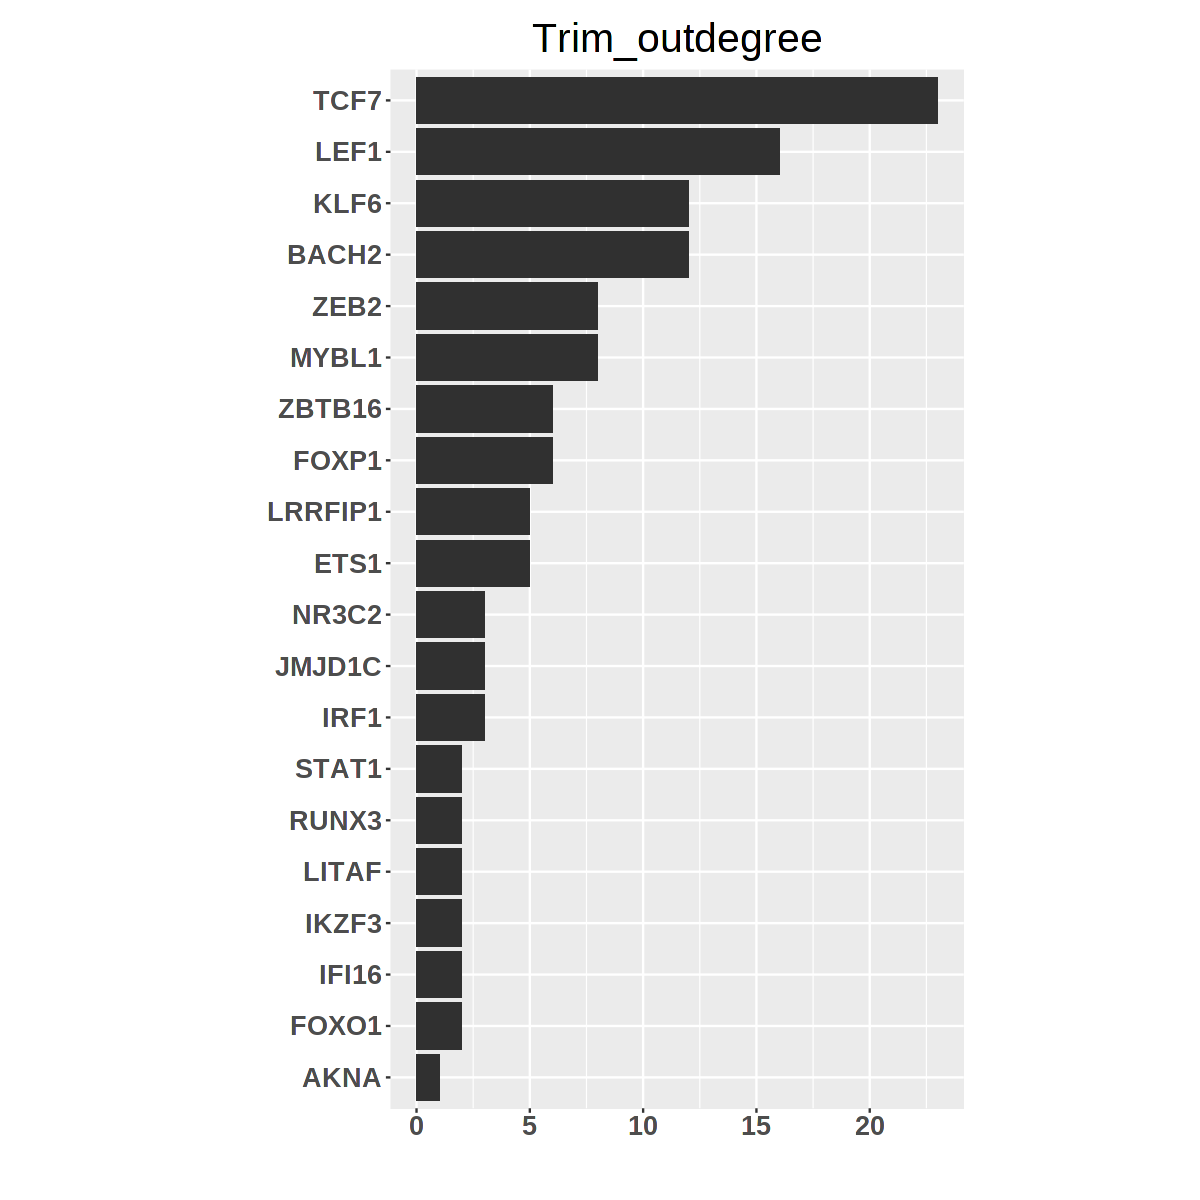

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
TE_barplot(trim_list, top_gene_num = 20,name_RNA = "Trim_outdegree",font_size=20)

In [ ]:
top_TF <- count_degree(trim_list)
top_TF

Var1    Freq
23 TCF7    23  
12 LEF1    16  
2  BACH2   12  
11 KLF6    12  
15 MYBL1    8  
27 ZEB2     8  
5  FOXP1    6  
25 ZBTB16   6  
3  ETS1     5  
14 LRRFIP1  5  
9  IRF1     3  
10 JMJD1C   3  
20 NR3C2    3  
4  FOXO1    2  
7  IFI16    2  
8  IKZF3    2  
13 LITAF    2  
21 RUNX3    2  
22 STAT1    2  
1  AKNA     1  
6  HIVEP3   1  
16 NFAT5    1  
17 NFKB1    1  
18 NLRC5    1  
19 NR3C1    1  
24 TFDP2    1  
26 ZEB1     1

In [ ]:
top_20_TF_list <- top_TF[1:11,1]
top_20_TF_list <- as.character(top_20_TF_list)
top_20_TF_list

[1] "TCF7"    "LEF1"    "BACH2"   "KLF6"    "MYBL1"   "ZEB2"    "FOXP1"  
 [8] "ZBTB16"  "ETS1"    "LRRFIP1" "IRF1"

### 6.4.2 Pseudotime Heatmap

In [ ]:
input_matrix <-  read.csv(paste0("",output_dir,"/ExprMatMerged_Counts_DEGDAR.csv"))
pseudotime <- read.table(paste0("",output_dir,"/Tenet_pseudo.txt"), quote="\"", comment.char="")

In [ ]:
options(repr.plot.width=0, repr.plot.height=0)
p1 <- pseudotime_heatmap2(matrix = input_matrix,selected_gene = top_20_TF_list,pseudotime = pseudotime,cell_aanotaion != NULL,
                   target_average = F,max_min = T,p_min = -0.4,p_max = 0.4,span = 0.5,out_result=T,filename = "TF pseudotime")
p2 <- pseudotime_heatmap2(matrix = input_matrix,selected_gene = top_20_TF_list,pseudotime = pseudotime,cell_aanotaion != NULL,
                   target_average = T,target= "gene",gene_list=trim_TF_Gene,max_min = T,out_result=T,p_min = -0.4,p_max = 0.4,span = 0.5,filename = "target gene pseudotime")
p3 <- pseudotime_heatmap2(matrix = input_matrix,selected_gene = top_20_TF_list,pseudotime = pseudotime,cell_aanotaion != NULL,
                   target_average = T,target= "peak",peak_list=trim_TF_Peak,max_min = T,out_result=T,p_min = -0.4,p_max = 0.4,span = 0.5,filename = "target peak pseudotime")

[1] 2800   12
[1] 2800   12


[1] 2800   12


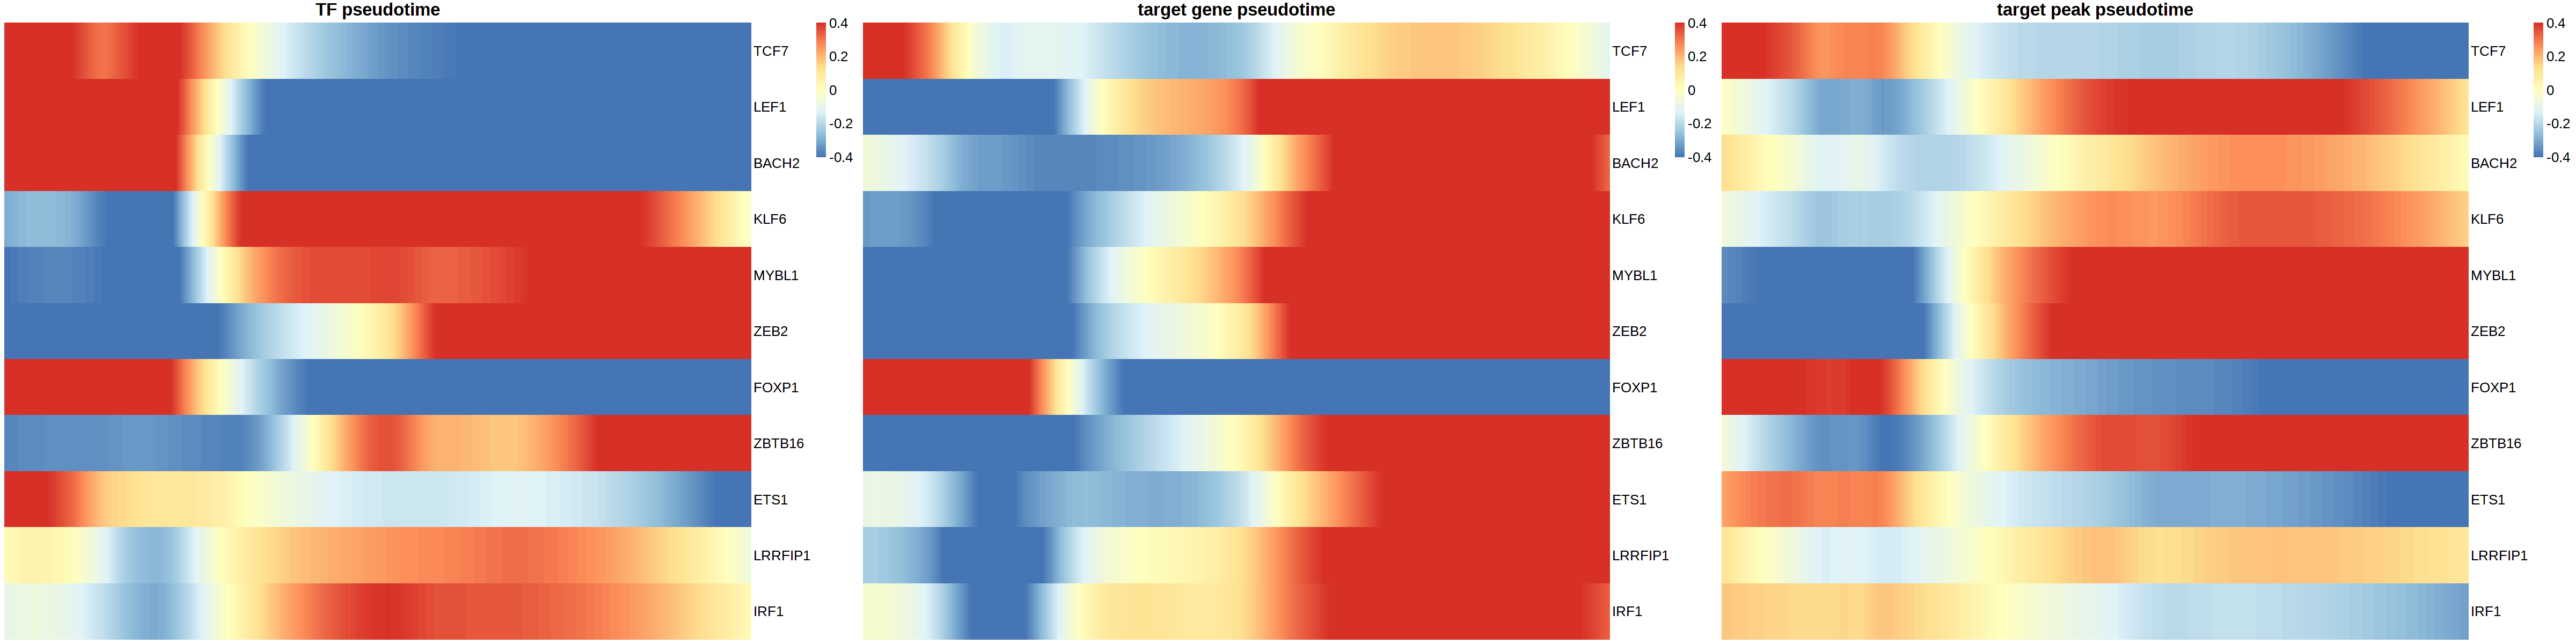

In [ ]:
options(repr.plot.width=40, repr.plot.height=10)

g1 <- p1$gtable
g2 <- p2$gtable
g3 <- p3$gtable

grid.arrange(g1, g2,g3, ncol = 3)

### 6.4.3 Gene regulatory netwok

In [ ]:
graph <-make_GRN_graph(trim_list, nodes="nodes",edges="edges",node_sizes="node_sizes",
                       node_label_sizes = "node_label_sizes",node_colors = "node_colors",
                       node_shapes = "node_shapes", min_node_size = 5, min_size_cutoff = 5,
                       min_size = 5,min_node_label_size = 1)
layout <- layout_with_fr(graph)

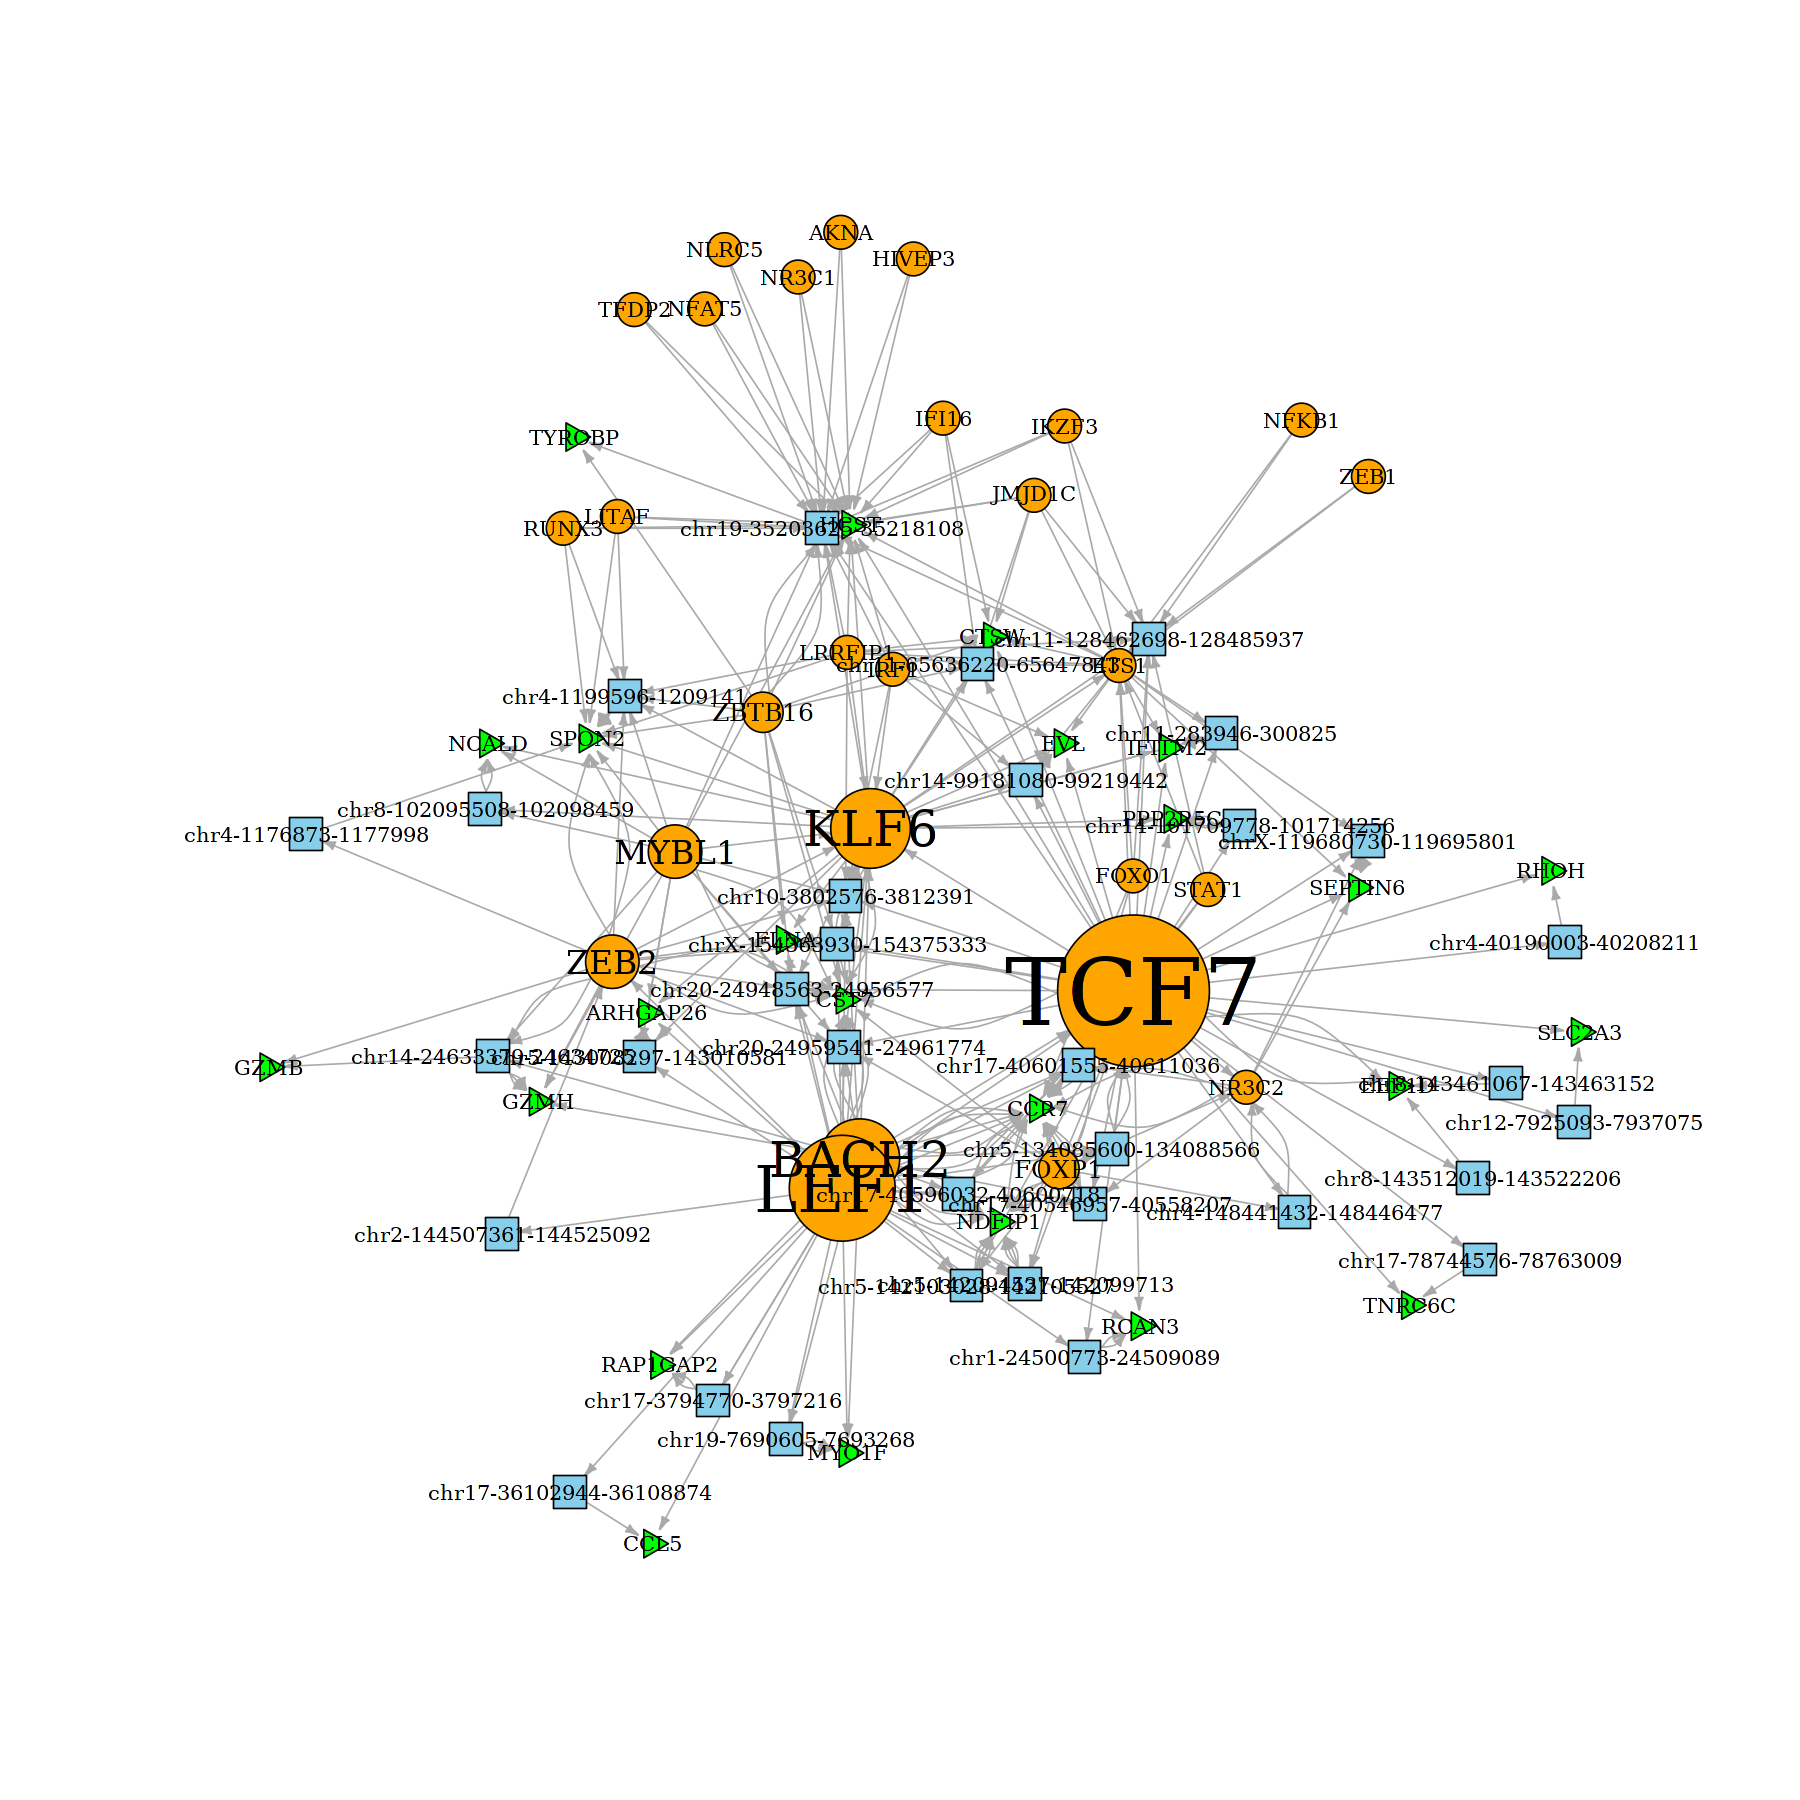

In [ ]:
set.seed(123)
options(repr.plot.width=15, repr.plot.height=15)
plot(graph, vertex.label=nodes, vertex.size=node_sizes, edge.arrow.size=0.2,
     layout=layout,width = 3000, height = 3000, node_label_sizes = node_sizes,vertex.color=node_colors,vertex.shape=node_shapes,
     vertex.label.cex=node_label_sizes,vertex.label.color="black")

In [ ]:
  node_colors <- rep("orange",length(nodes))
  for(i in 1:length(nodes)){
    if (nodes[i] %in% trim_list$gene){
      node_colors[i] <- "green"
      if(nodes[i] %in% trim_list$TF){
        node_colors[i] <- "orange"
      }
    }else if (nodes[i] %in% trim_list$TF){
      node_colors[i] <- "orange"
    }else if (nodes[i] %in% trim_list$peak){
      node_colors[i] <- "skyblue"
    }
  }

# 8. R Plots

In [ ]:
source("/content/TENETPLUS/function_for_tenetplus/RPlot.R")

In [ ]:
triplet_list <- read.csv('/content/drive/MyDrive/trimmed_by_PeaksourceDistance1M_Indirect-0.01_CD8_TE_result_matrix.sif', header = T,sep=' ')

In [ ]:
head(triplet_list)

TF    gene    peak                      TF_GN_TE   TF_PK_TE   PK_GN_TE  
1 AEBP2 ATP5F1E chr20-58890223-58892645   0.06482625 0.04424128 0.09920790
2 AEBP2 ATXN1   chr6-16759465-16762420    0.06165044 0.04320591 0.11228768
3 AEBP2 CHST11  chr12-103928671-103931199 0.06855043 0.04820967 0.11184836
4 AEBP2 EEF2    chr19-4065060-4067710     0.05848315 0.05410899 0.11759526
5 AEBP2 FTL     chr19-48636854-48638497   0.05997380 0.04611681 0.10441014
6 AEBP2 FTL     chr19-48169264-48170869   0.05997380 0.03837780 0.06962797
  distance
1 132829  
2      0  
3 524095  
4  79597  
5 326811  
6 794439

In [ ]:
# Main variables
#cell_types <- c("CD4", "CD8", "mono", "Bcell")
cell_types <- "CD8"
options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 150)

# Load Seurat objects and aggregate expression data

# Load RNA Seurat object and aggregate expression data
seurat_file_path_rna <- "/content/drive/MyDrive/Output_CD8/pbmc.rna.rds"
pbmc_rna <- load_seurat_object(seurat_file_path_rna)
pbmc_rna$annotation <- cell_types

# Aggregate RNA expression data
exp_rna <- aggregate_expression_data(pbmc_rna, group_by = "annotation", assay = "RNA")

# Load ATAC Seurat object and aggregate accessibility data
seurat_file_path_atac <- "/content/drive/MyDrive/Output_CD8/pbmc.atac.rds"
pbmc_atac <- load_seurat_object(seurat_file_path_atac)
pbmc_atac$annotation <- cell_types

# Aggregate ATAC accessibility data
exp_atac <- aggregate_expression_data(pbmc_atac, group_by = "annotation", assay = "ATAC")

# Get degree data
degree_data <- get_degree_list(cell_types, triplet_list)
Node_df <- degree_data$Node_df
degree_list <- degree_data$degree_list

# Merge degrees with expression data
merged_data <- merge_degree_with_expression(degree_list, exp_rna, exp_atac, cell_types)

Warning message:
"ggrepel: 157 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


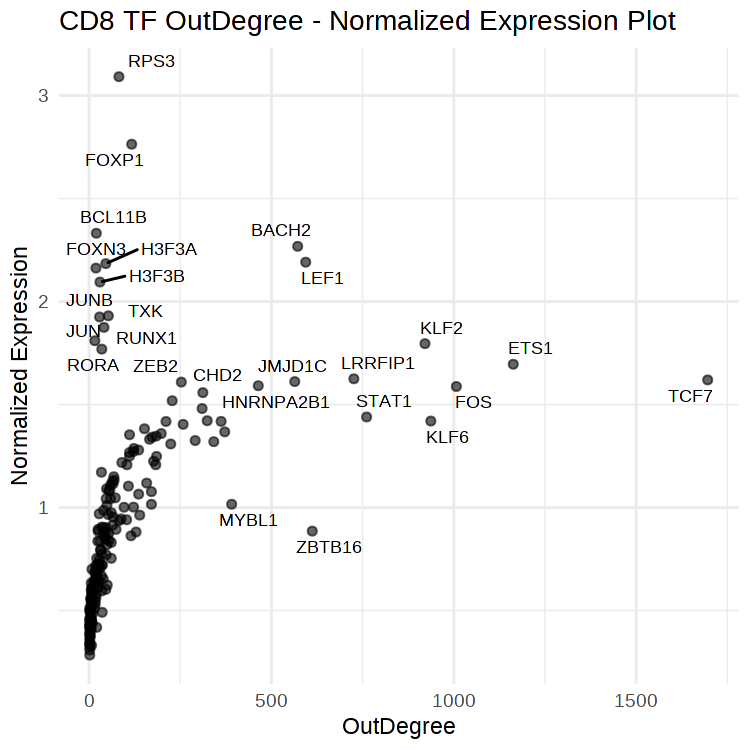

In [ ]:
# Plot TF OutDegree vs Expression in CD8 cells
p_TF_OutDegree <- plot_degree_expression(
  merged_data,
  cell_type = cell_types,
  node_type = "TF",
  degree_type = "OutDegree"
)
print(p_TF_OutDegree)

Warning message:
"ggrepel: 637 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


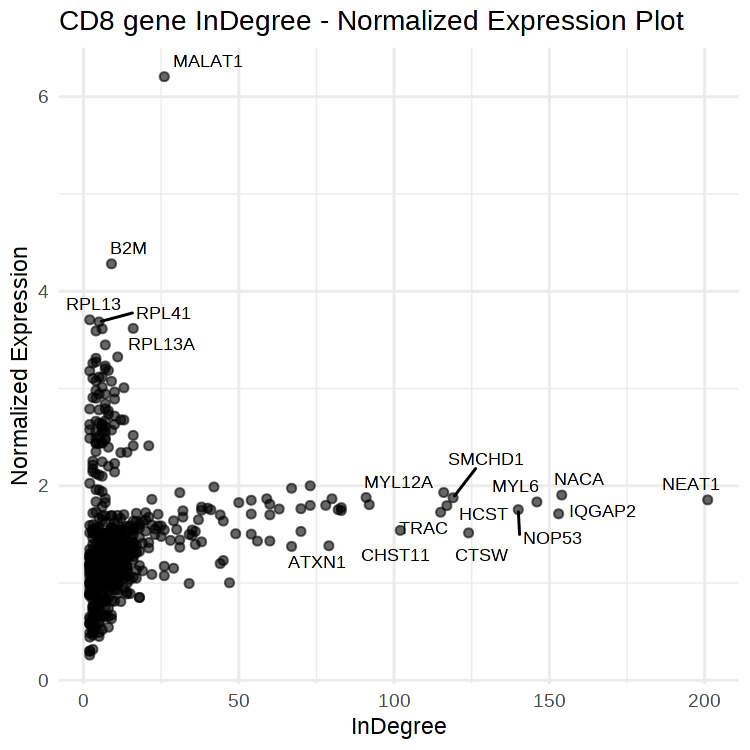

In [ ]:
# Plot gene InDegree vs Expression in CD8 cells
p_gene_InDegree <- plot_degree_expression(
  merged_data,
  cell_type = cell_types,
  node_type = "gene",
  degree_type = "InDegree"
)
print(p_gene_InDegree)

## Ontology Heatmap

In [ ]:
library(reticulate)
library(IRdisplay)
use_python('/usr/bin/python3',required=TRUE)
py_config()

python:         /usr/bin/python3
libpython:      /usr/lib/python3.10/config-3.10-x86_64-linux-gnu/libpython3.10.so
pythonhome:     //usr://usr
version:        3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
numpy:          /usr/local/lib/python3.10/dist-packages/numpy
numpy_version:  1.26.4

NOTE: Python version was forced by use_python() function

In [ ]:
source_python('/content/TENETPLUS/function_for_tenetplus/Ontology.py')

In [ ]:
indegree_data <- merged_data %>% filter(Gene_InDegree > 50)
outdegree_data <- merged_data %>% filter(TF_OutDegree > 500)
E_indegree_data <- merged_data %>% filter(Gene_InDegree < 50 & Expression>2)
E_outdegree_data <- merged_data %>% filter(TF_OutDegree < 200& TF_OutDegree >0 & Expression > 1.5)

In [ ]:
TF_list <- read.table('/content/TENETPLUS/GO_symbol_human_regulation_of_transcription+sequence-specific_DNA_binding_list.txt', header = F,sep='')

In [ ]:
GOMF_TF_bg <- write_background_enrichment_df(outdegree_data$Node, TF_list$V1,'GO_Molecular_Function_2023')

In [ ]:
GOMF_TF_bg_E <- write_background_enrichment_df(E_outdegree_data$Node, TF_list$V1,'GO_Molecular_Function_2023')

In [ ]:
CMK_TF_bg <- write_background_enrichment_df(outdegree_data$Node, TF_list$V1,'CellMarker_2024')

In [ ]:
CMK_TF_bg_E <- write_background_enrichment_df(E_outdegree_data$Node, TF_list$V1,'CellMarker_2024')

In [ ]:
head(GOMF_TF_bg)

Term                                                            P-value     
1 Transcription Corepressor Binding (GO:0001222)                  3.132574e-05
2 Transcription Coregulator Binding (GO:0001221)                  2.394204e-04
3 Cadherin Binding (GO:0045296)                                   1.137000e-03
4 Nuclear Receptor Binding (GO:0016922)                           1.098608e-02
5 Tumor Necrosis Factor Receptor Binding (GO:0005164)             1.128194e-02
6 Tumor Necrosis Factor Receptor Superfamily Binding (GO:0032813) 1.128194e-02
  Genes                      Adjusted P-value logP    
1 STAT1;ZBTB16;LEF1;ETS1     0.001221704      4.504099
2 STAT1;ZBTB16;LEF1;FOS;ETS1 0.004668697      3.620839
3 STAT1;LRRFIP1              0.014780997      2.944240
4 STAT1;LEF1;JMJD1C          0.073332630      1.959157
5 STAT1                      0.073332630      1.947616
6 STAT1                      0.073332630      1.947616

In [ ]:
head(GOMF_TF_bg_E)

Term                                          P-value    Genes
1 Oxidized DNA Binding (GO:0032356)             0.01128194 RPS3 
2 Oxidized Purine DNA Binding (GO:0032357)      0.01128194 RPS3 
3 Protein Tyrosine Kinase Activity (GO:0004713) 0.01128194 TXK  
4 Microtubule Binding (GO:0008017)              0.01128194 RPS3 
5 rRNA Binding (GO:0019843)                     0.01128194 RPS3 
6 DNA N-glycosylase Activity (GO:0019104)       0.01128194 RPS3 
  Adjusted P-value logP    
1 0.06393101       1.947616
2 0.06393101       1.947616
3 0.06393101       1.947616
4 0.06393101       1.947616
5 0.06393101       1.947616
6 0.06393101       1.947616

In [ ]:
source('/content/TENETPLUS/function_for_tenetplus/Ontology_heatmap.r')

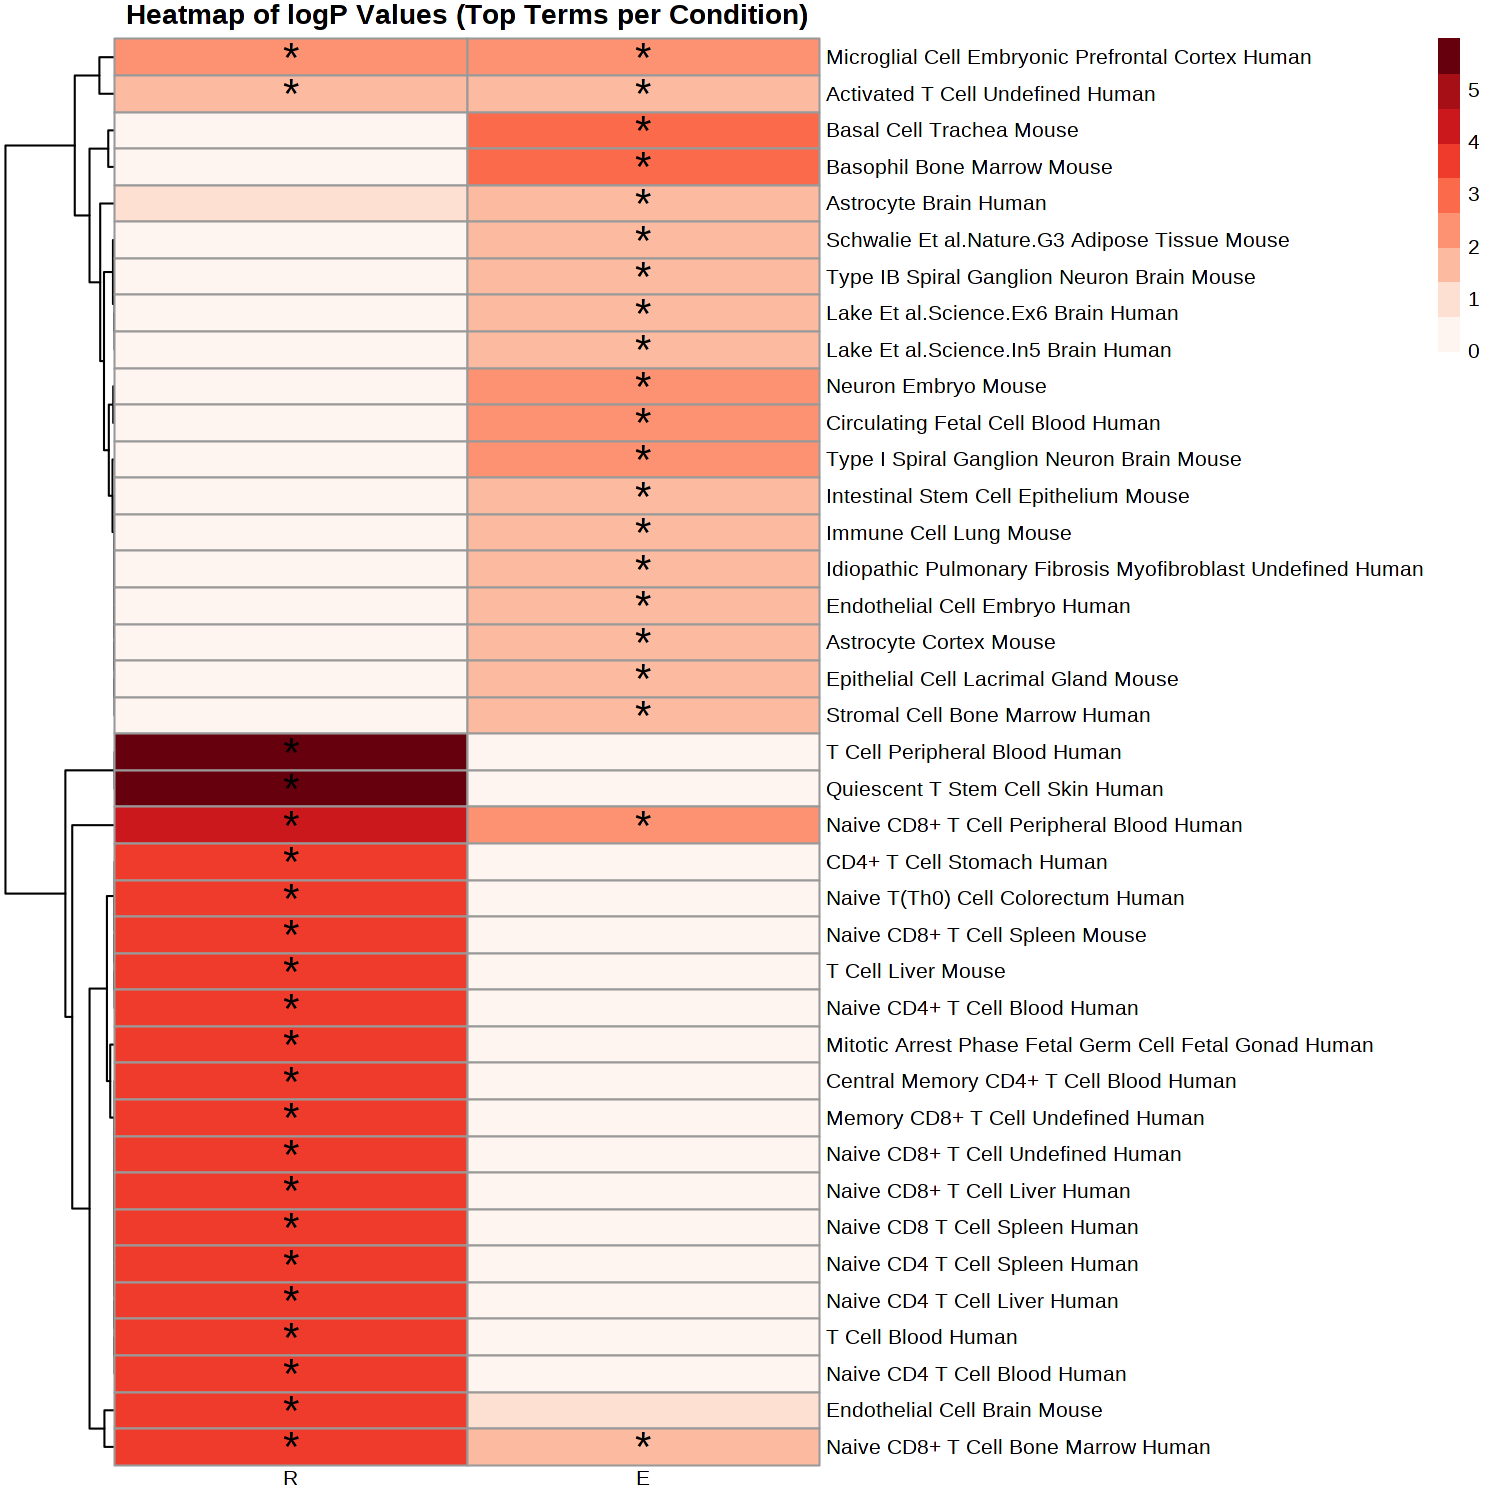

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 150)
create_heatmap(CMK_TF_bg, CMK_TF_bg_E, top_n = 20, significance_threshold = 0.05)

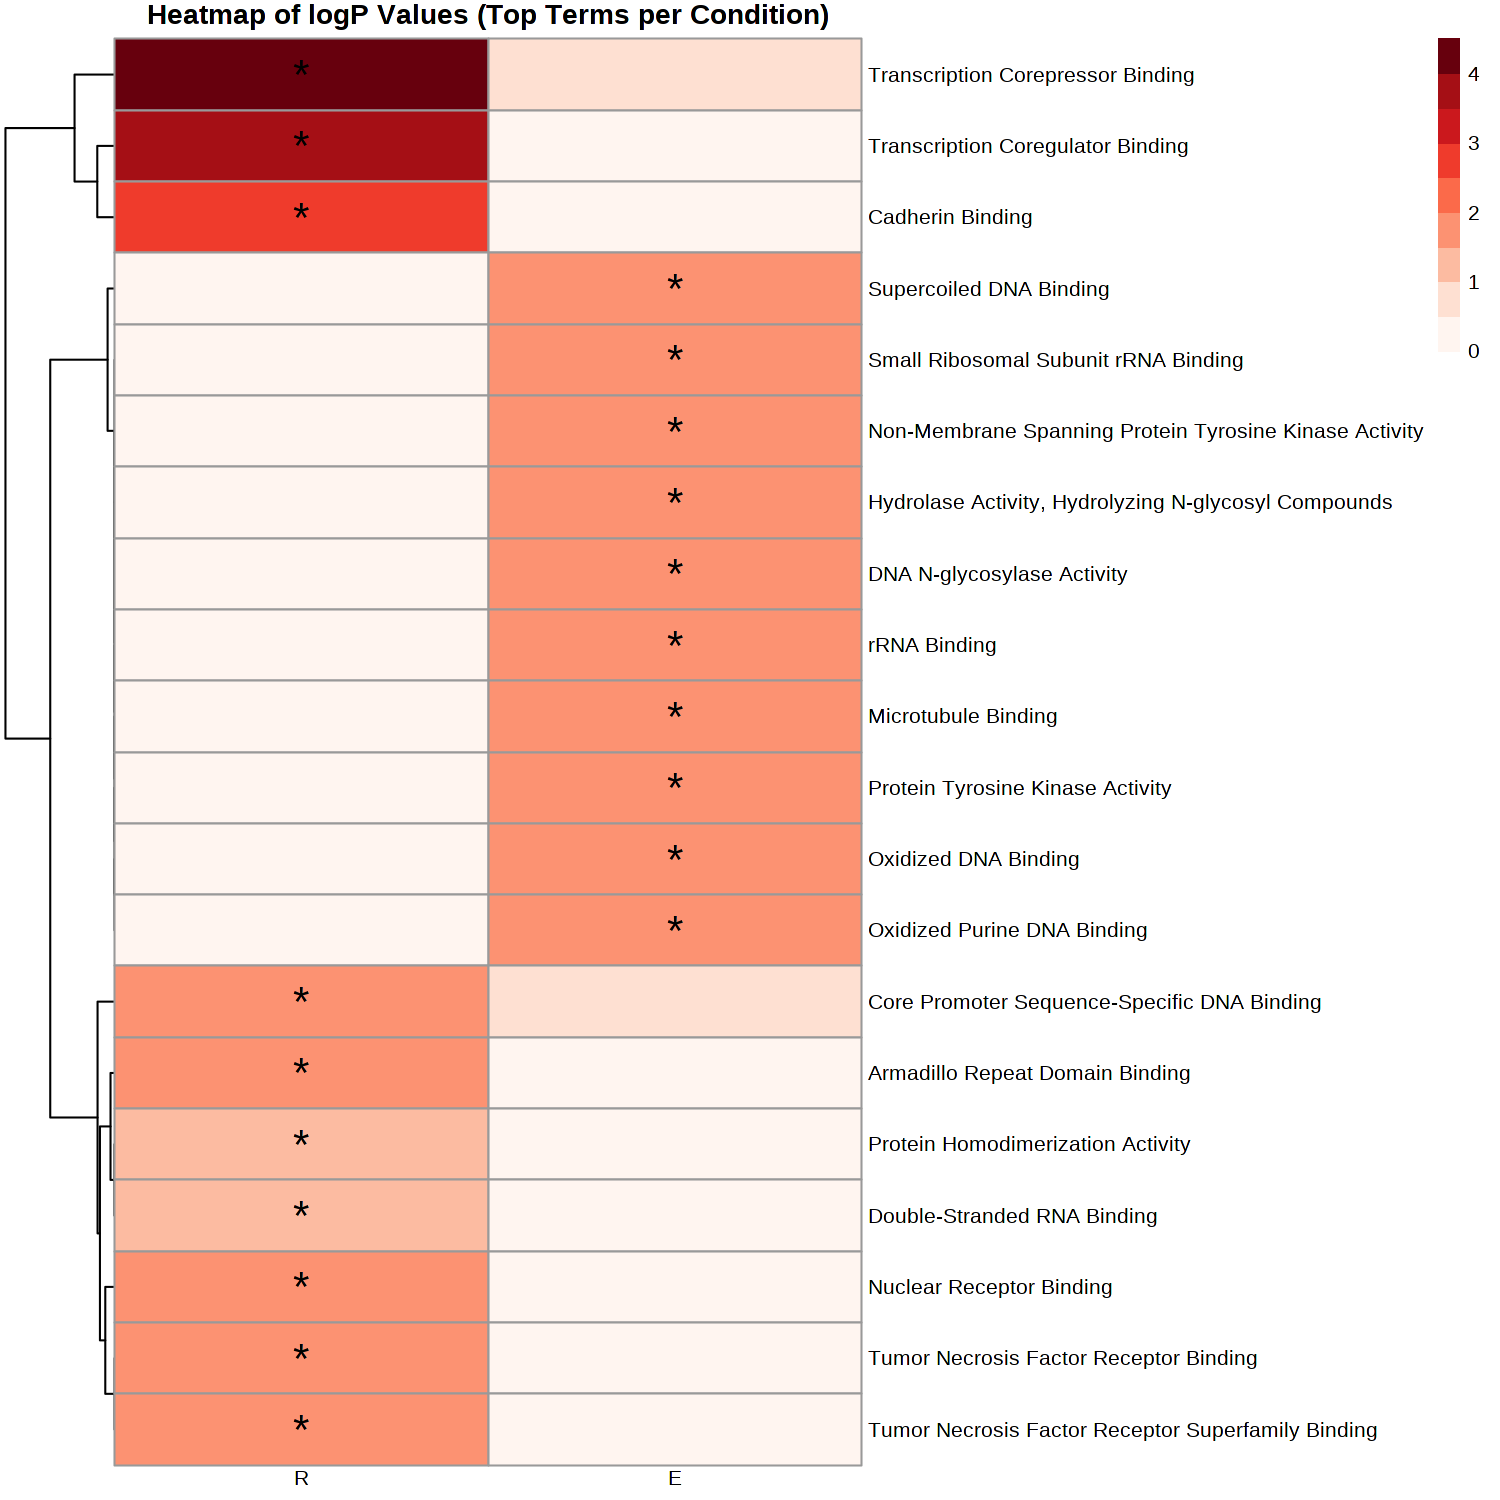

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 150)
create_heatmap(GOMF_TF_bg, GOMF_TF_bg_E, top_n = 10, significance_threshold = 0.05)